In [1]:
!which python

/c/Users/junec/AppData/Local/Programs/Python/Python38/python


In [2]:
import struct 
struct.calcsize("P")*8

32

In [3]:
# !pip list

In [4]:
# !pip install openpyxl

In [5]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple

In [6]:
from util import load_data_from_txt, calculate_derivative,convert_timestamp2hour
from baseline import detect_breakpoints, detect_breakpoints_2, detect_breakpoints_3
from plot import group_index, plot_breakpoints,plot_4_metrics,plot_4_metrics_details
from plot2 import group_index, plot_breakpoints,plot_4_metrics,plot_4_metrics_details,plot_detection_statistics,plot_histogram

In [7]:
#experiment setup
ground_truth=[]
colum_names ={"pressure":["Date","Pressure (psia)","first_order_derivative","second_order_derivative"],
                    "rate":["Time@end","Liquid rate (STB/D)"]}

In [8]:
pressure_file="../data_input/EAGE_Shchipanov_2017/Pressure.txt"
rate_file="../data_input/EAGE_Shchipanov_2017/Rate.txt"
pressure_df,rate_df,pressure_rate=load_data_from_txt(pressure_file, rate_file)
display(pressure_df)
display(rate_df)
# pressure_rate

Elapsed time     Data
0          0.000000  2988.99
1          0.495833  2991.28
2          0.516667  2994.32
3          0.545833  2996.70
4          0.566667  2999.12
...             ...      ...
29808   4063.495571  7938.65
29809   4065.499737  7939.53
29810   4067.503904  7940.92
29811   4069.508071  7941.22
29812   4070.949737  7941.08

[29813 rows x 2 columns]

Elapsed time   Liquid rate
0          0.433384  -3916.602731
1          2.516718  -3913.489043
2          4.600051  -3911.804387
3          6.641718  -3910.573563
4          7.683384  -3907.017652
...             ...           ...
10186   4074.862089 -18459.075655
10187   4075.028756 -18423.899451
10188   4075.237089 -18412.745895
10189   4075.362089 -18413.519153
10190   4075.570423 -18380.995522

[10191 rows x 2 columns]

In [9]:
#calculate first & second derivative

x_coordinate=pressure_df["Elapsed time"]
y_coordinate=pressure_df["Data"]
first_order_derivative=calculate_derivative(x_coordinate,y_coordinate)

x_coordinate=pressure_df["Elapsed time"]
y_coordinate=first_order_derivative
second_order_derivative=calculate_derivative(x_coordinate,y_coordinate)

#add first and second derivative to pressure_df dataframe
pressure_df["first_order_derivative"]=first_order_derivative
pressure_df["second_order_derivative"]=second_order_derivative
# pd.set_option('display.max_rows', pressure_df.shape[0]+1)
display(pressure_df)

Elapsed time     Data  first_order_derivative  second_order_derivative
0          0.000000  2988.99                4.618487               284.977831
1          0.495833  2991.28              145.919995             -3087.359588
2          0.516667  2994.32               81.600002              1184.914121
3          0.545833  2996.70              116.159996             -1817.279726
4          0.566667  2999.12               78.300001              -168.428622
...             ...      ...                     ...                      ...
29808   4063.495571  7938.65                0.439085                 0.126970
29809   4065.499737  7939.53                0.693555                -0.271368
29810   4067.503904  7940.92                0.149688                -0.123142
29811   4069.508071  7941.22               -0.097110                 0.000000
29812   4070.949737  7941.08               -0.097110                 0.000000

[29813 rows x 4 columns]

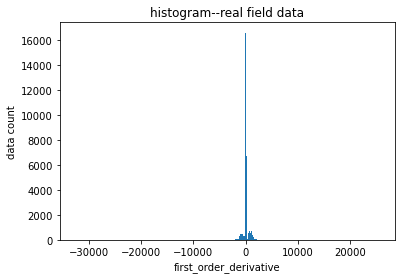

In [10]:
#plot histogram
data=pressure_df["first_order_derivative"]
xlabel="first_order_derivative"
ylabel="data count"
title='histogram--real field data'
plot_histogram(data, xlabel, ylabel,title)

In [11]:
breakpoints_detected=detect_breakpoints(first_order_derivative)
print(len(breakpoints_detected))
print(breakpoints_detected)

993.2336512455328
39
[66, 174, 241, 268, 292, 301, 2248, 2576, 2804, 2875, 3095, 3988, 4762, 5524, 6546, 7544, 8361, 10150, 11340, 11483, 13039, 13053, 14085, 16571, 16585, 16764, 17473, 17589, 18436, 18820, 18823, 18826, 18849, 21974, 24132, 24215, 24263, 27962, 28290]


In [12]:
breakpoints_detected=detect_breakpoints_2(first_order_derivative,second_order_derivative)
print(len(breakpoints_detected))
# print(breakpoints_detected)

993.2336512455328 192914.8008199997
53


In [13]:
plot_detection_statistics(breakpoints_detected,ground_truth)

findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


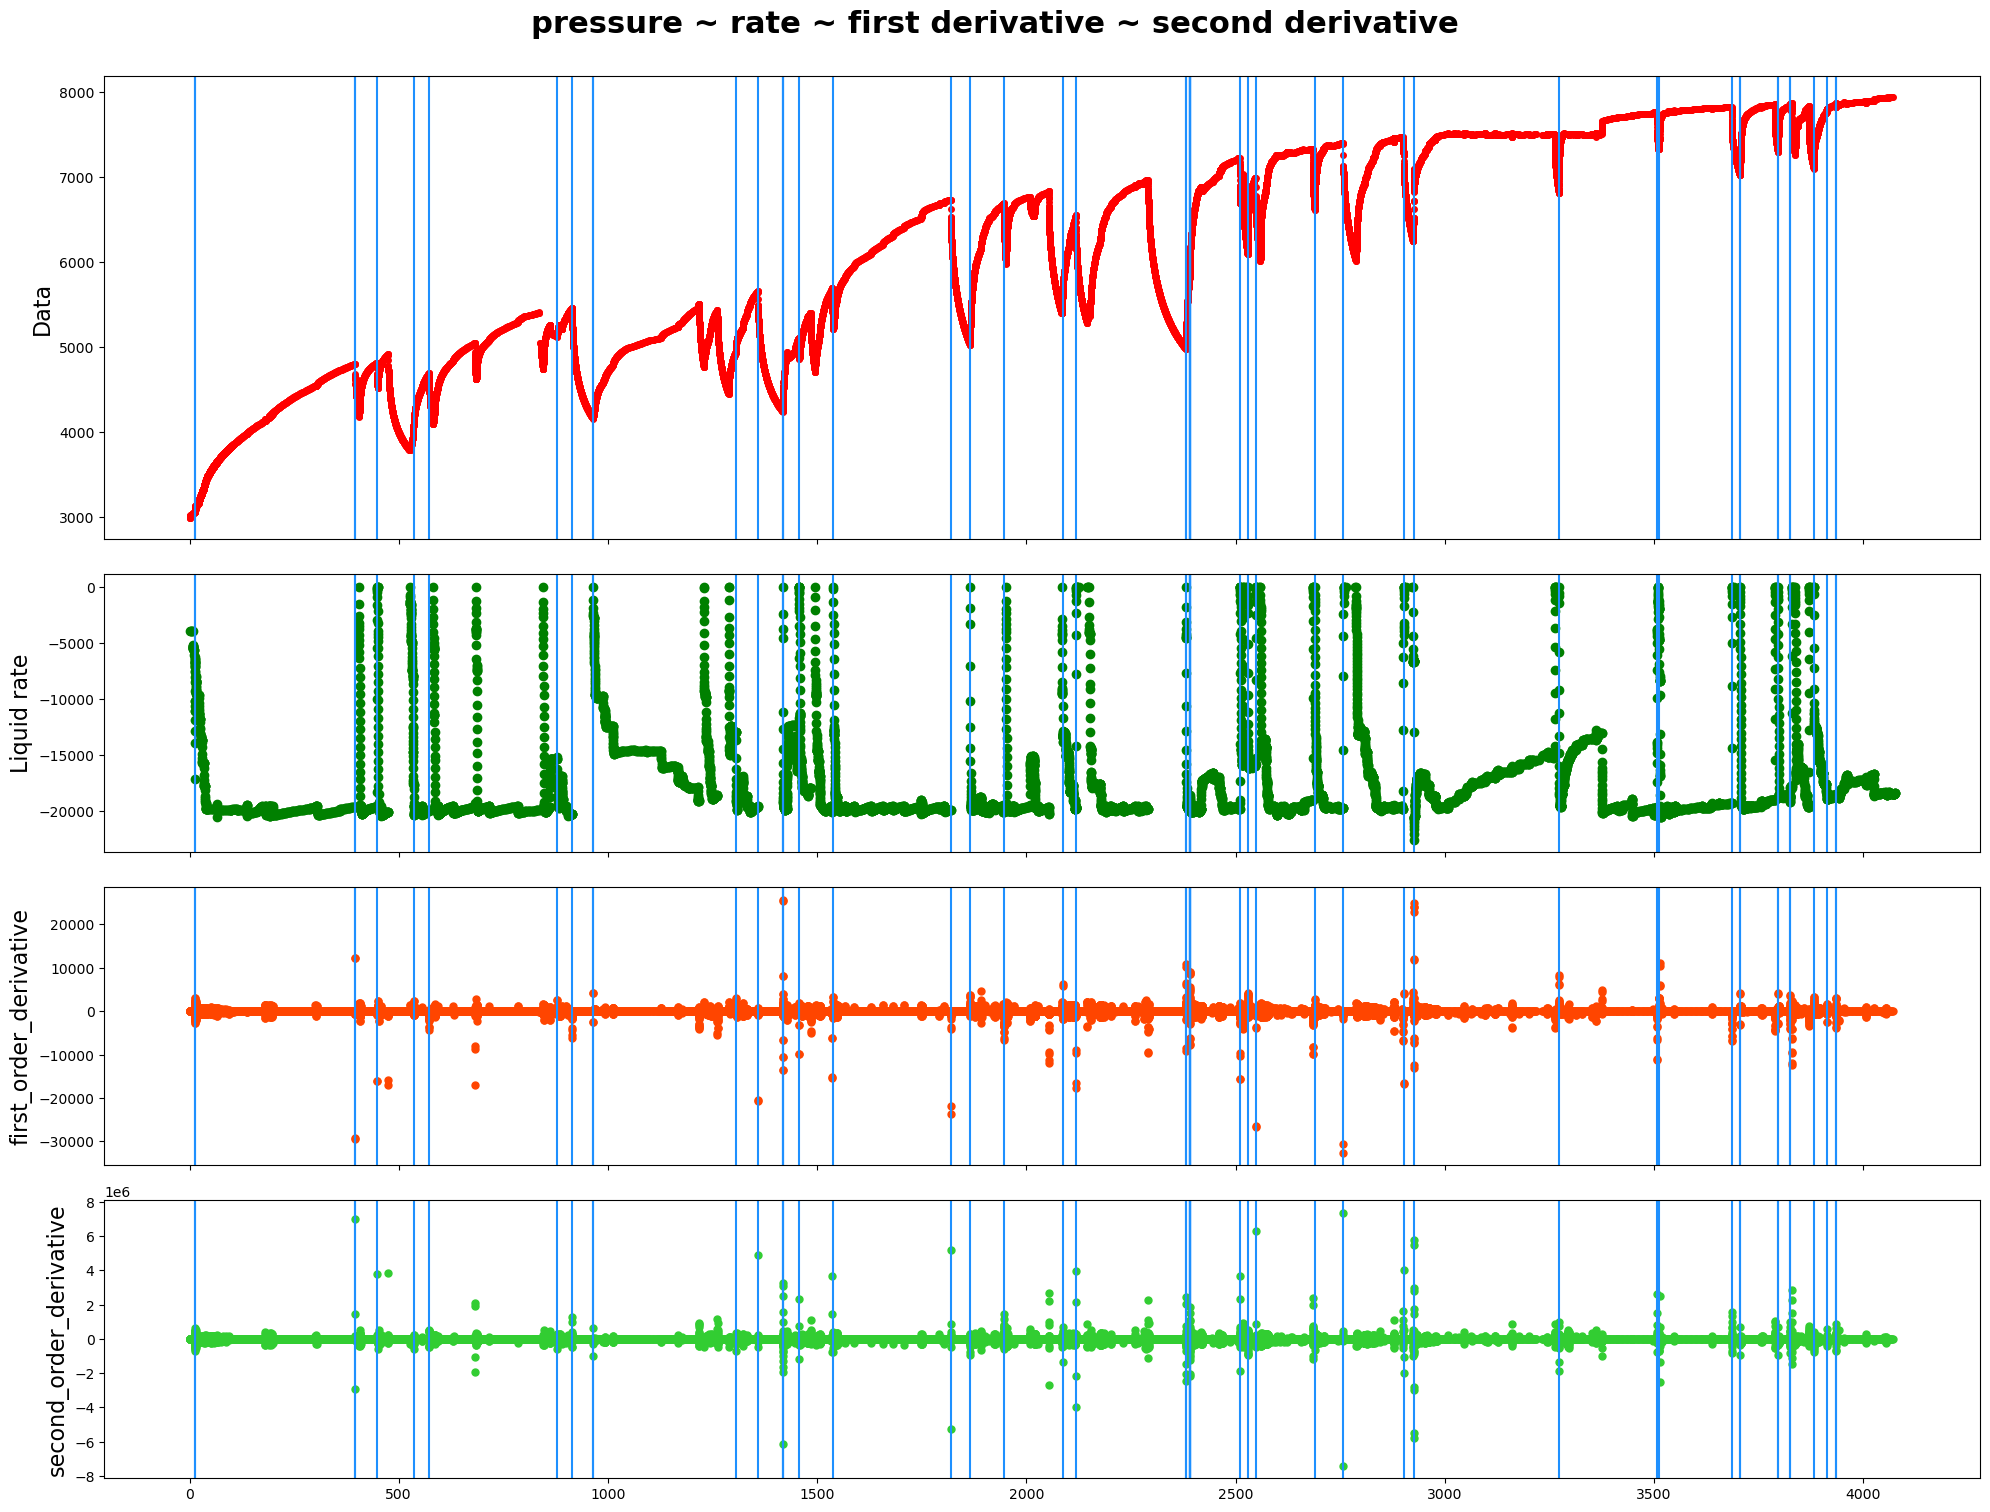

In [14]:
colum_names ={"pressure":["Elapsed time","Data","first_order_derivative","second_order_derivative"],
                    "rate":["Elapsed time","Liquid rate"]}
plot_4_metrics(pressure_df,
               rate_df,
               breakpoints_detected,
               ground_truth,
               colum_names)

In [15]:
breakpoints_detected=detect_breakpoints_3(first_order_derivative,second_order_derivative)
print(len(breakpoints_detected))
# print(breakpoints_detected)

993.2336512455328 192914.8008199997
72


In [16]:
ground_truth=[]
plot_detection_statistics(breakpoints_detected,ground_truth)

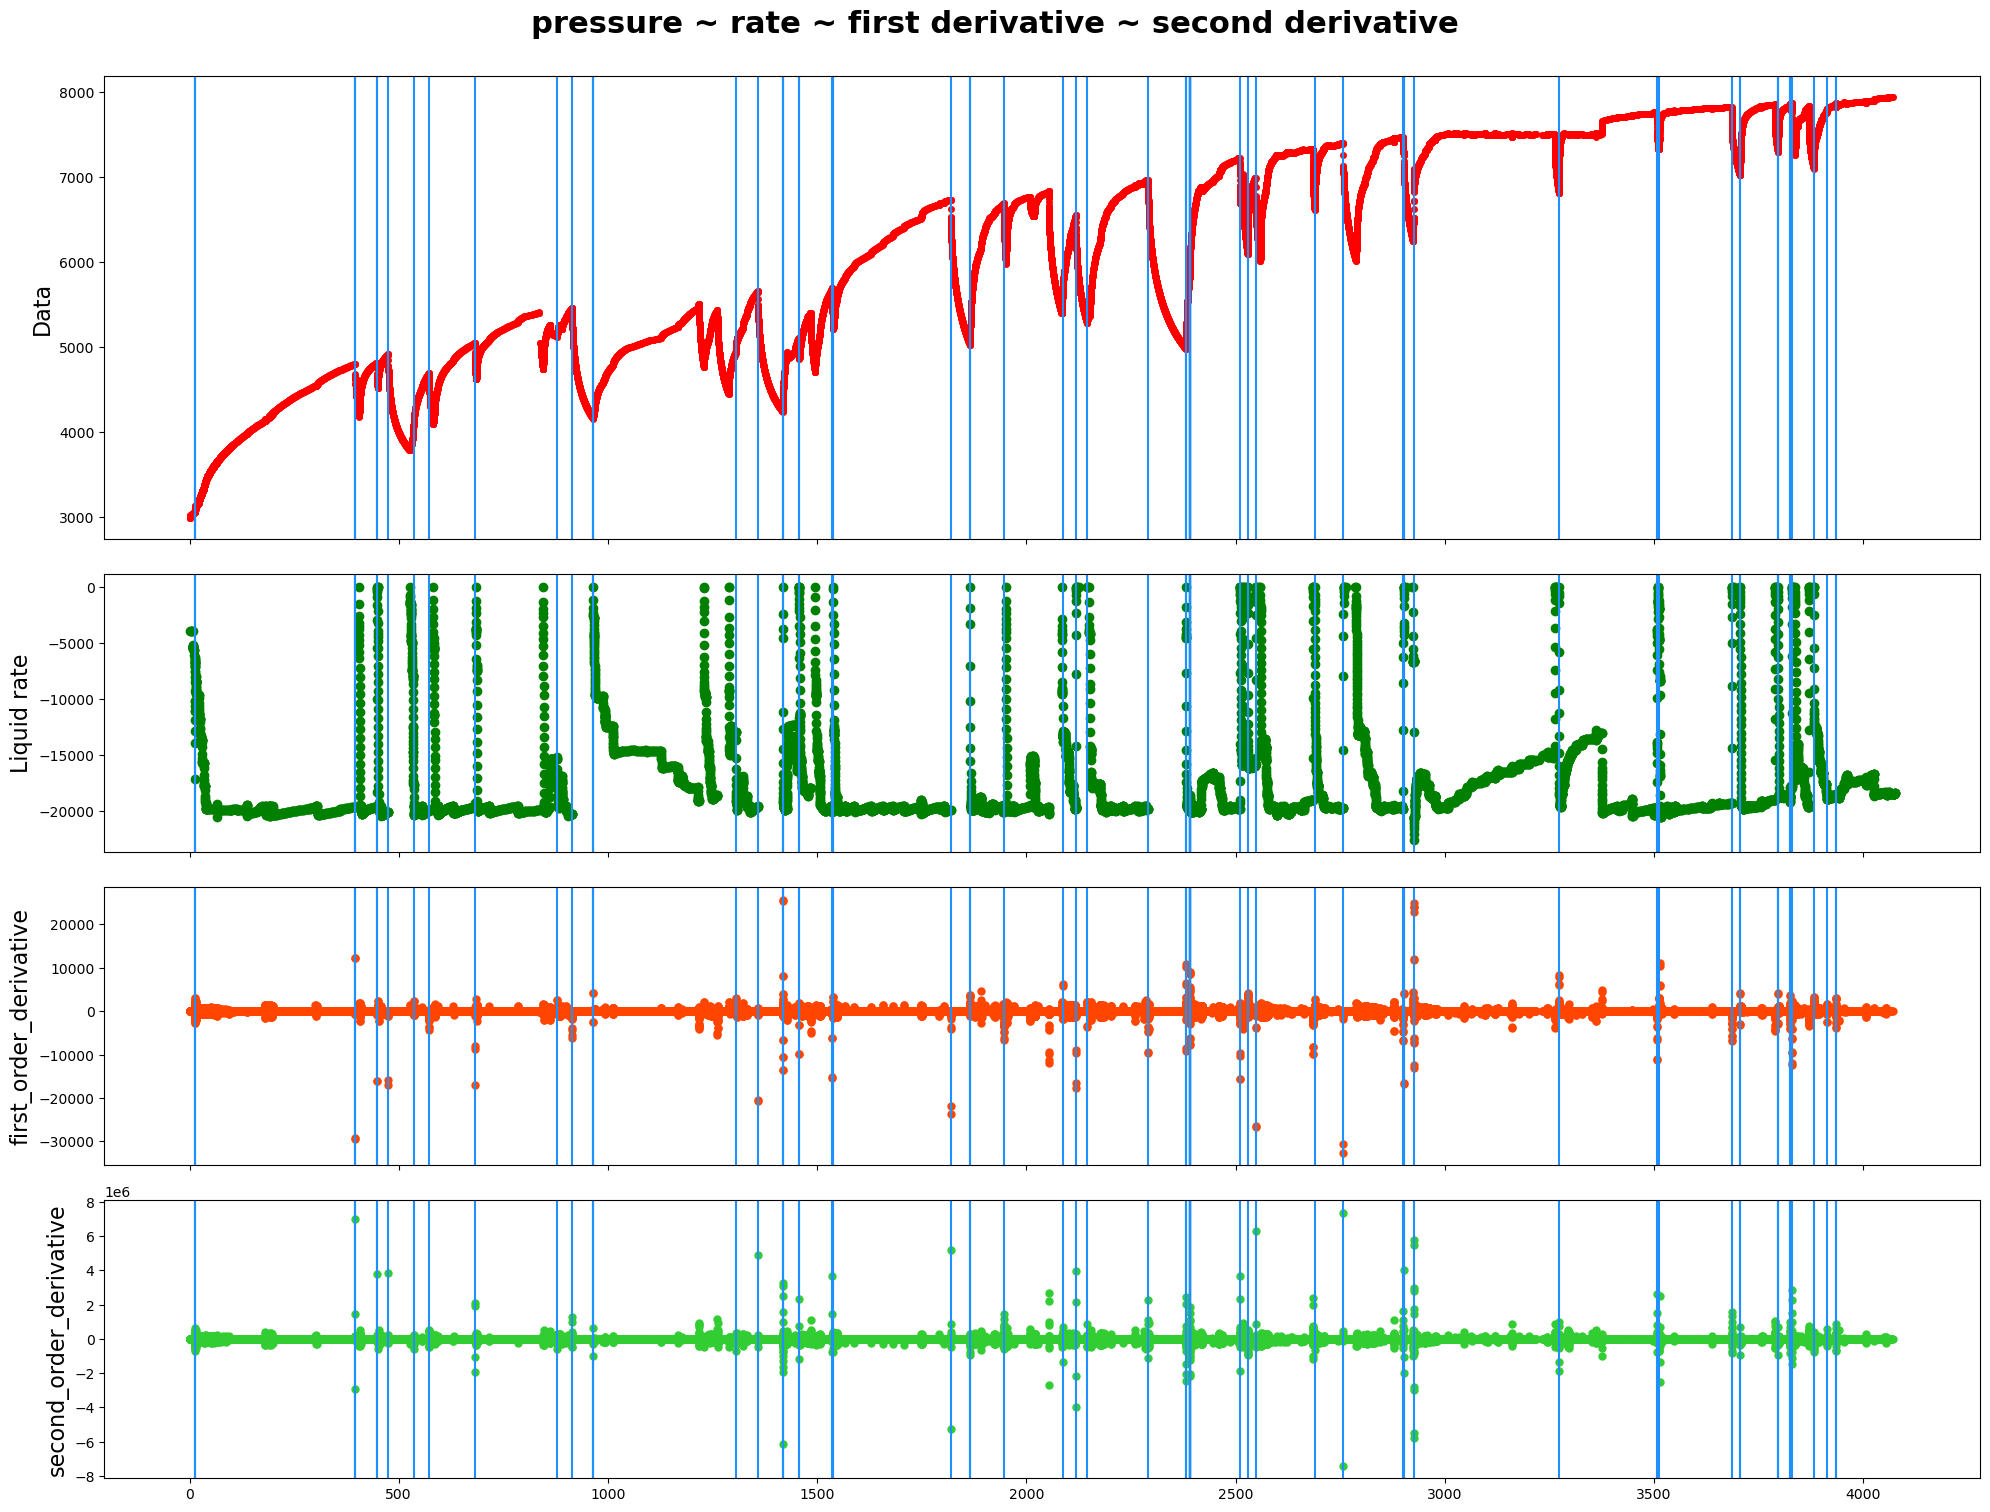

In [17]:
colum_names ={"pressure":["Elapsed time","Data","first_order_derivative","second_order_derivative"],
                    "rate":["Elapsed time","Liquid rate"]}
plot_4_metrics(pressure_df,
               rate_df,
               breakpoints_detected,
               ground_truth,
               colum_names)

detected 72 as breakpoints
The plot is devided into 43 rows
------row 1-----detected points:[66, 67, 175]


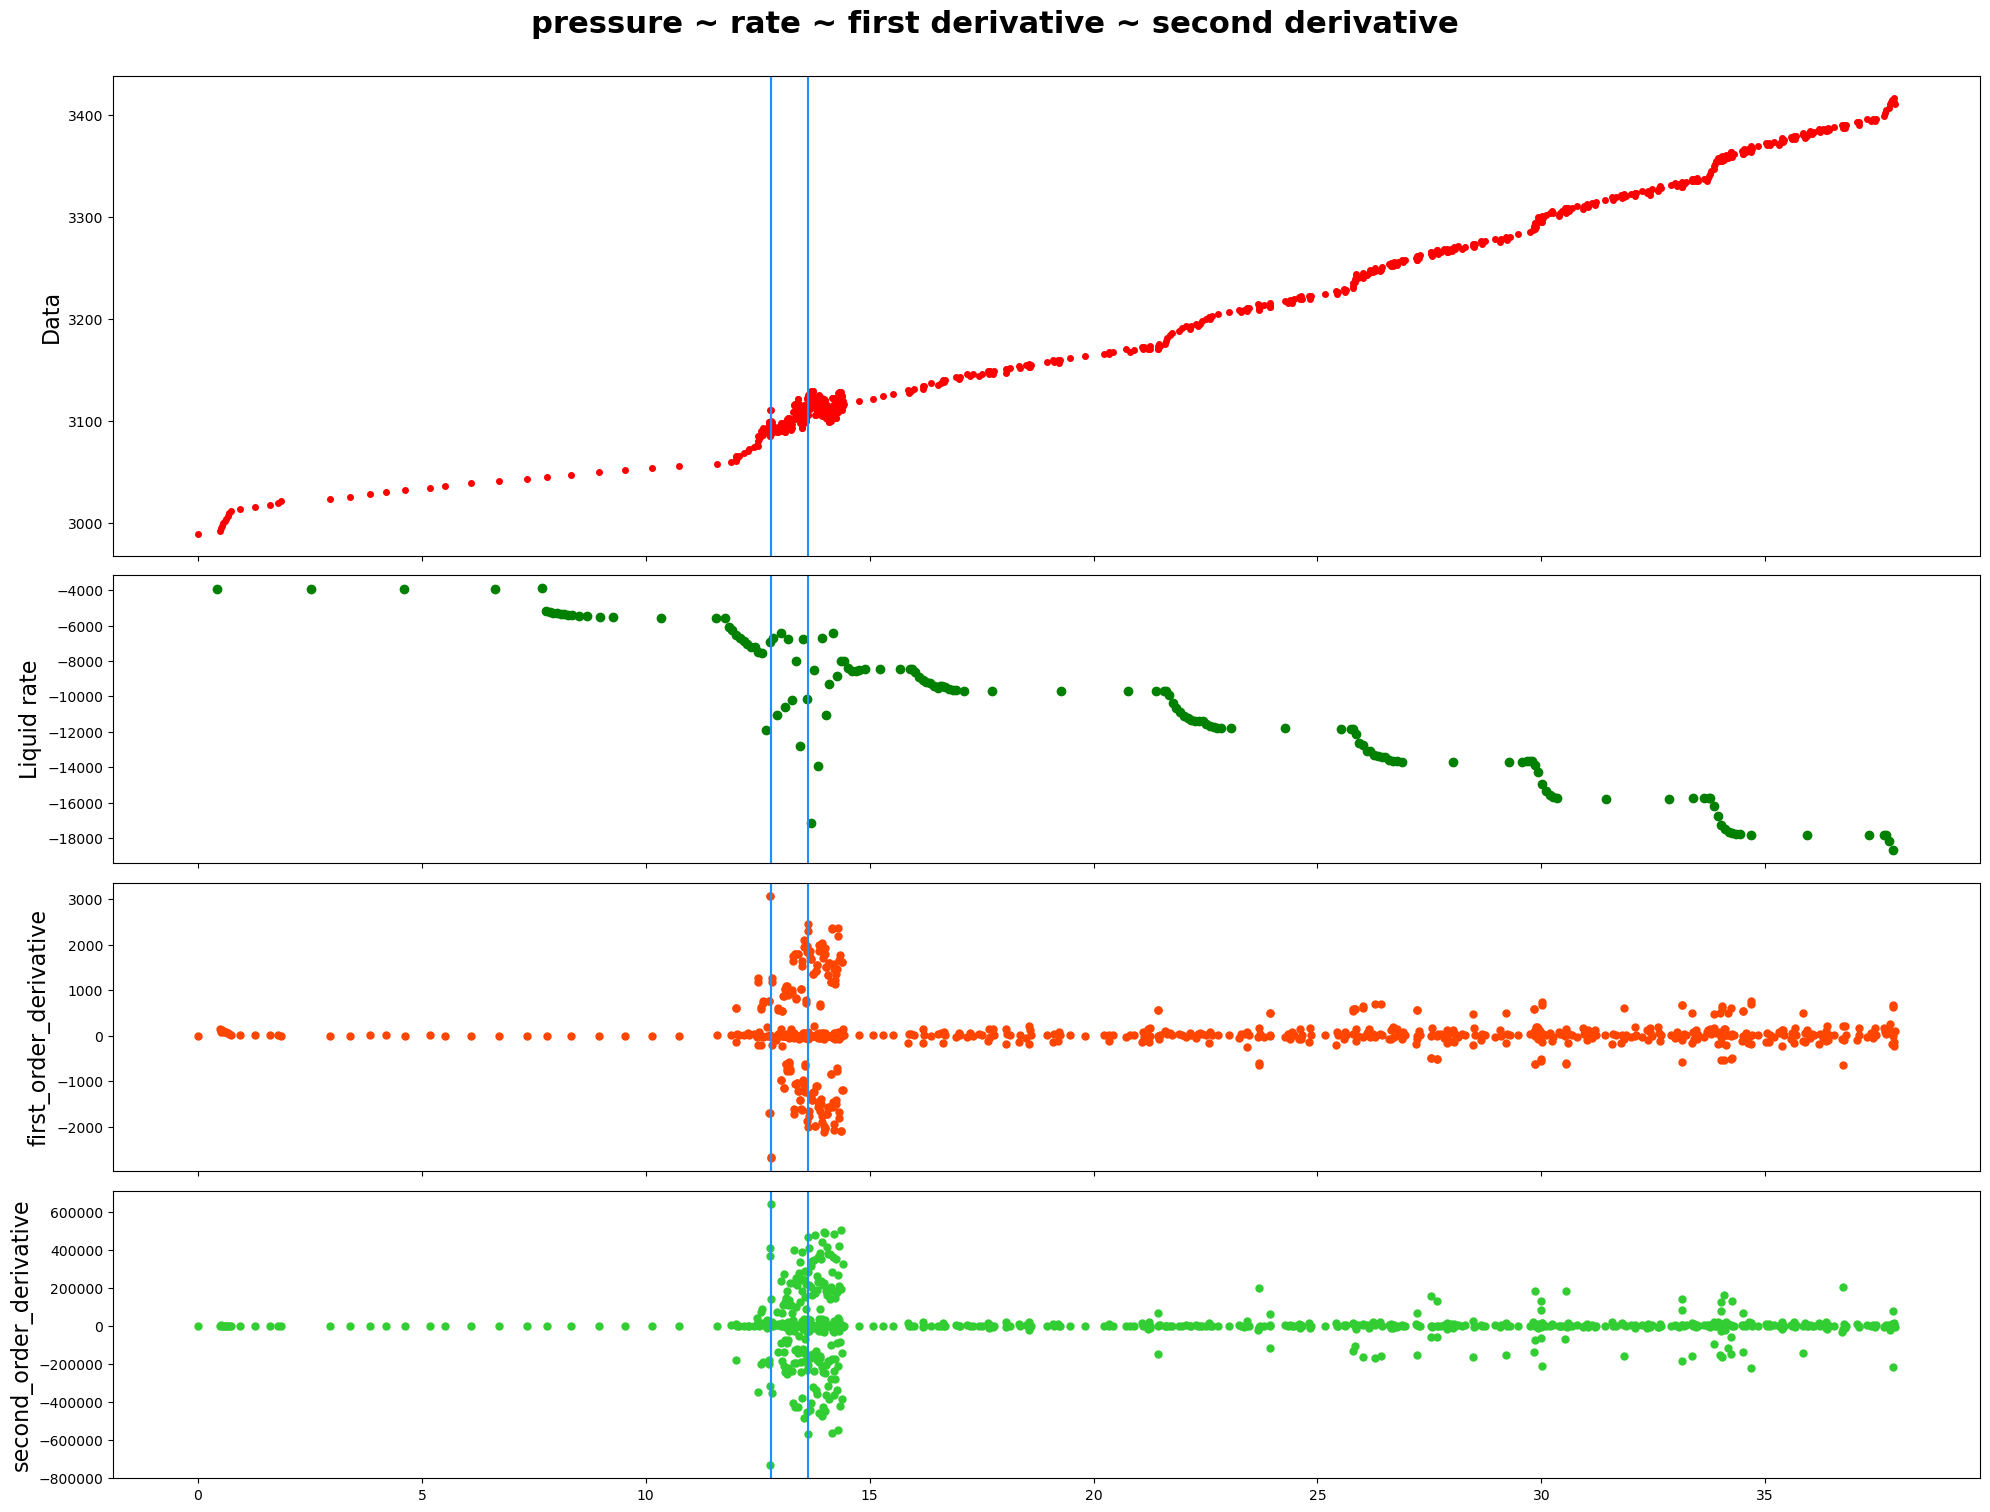

------row 2-----detected points:[]


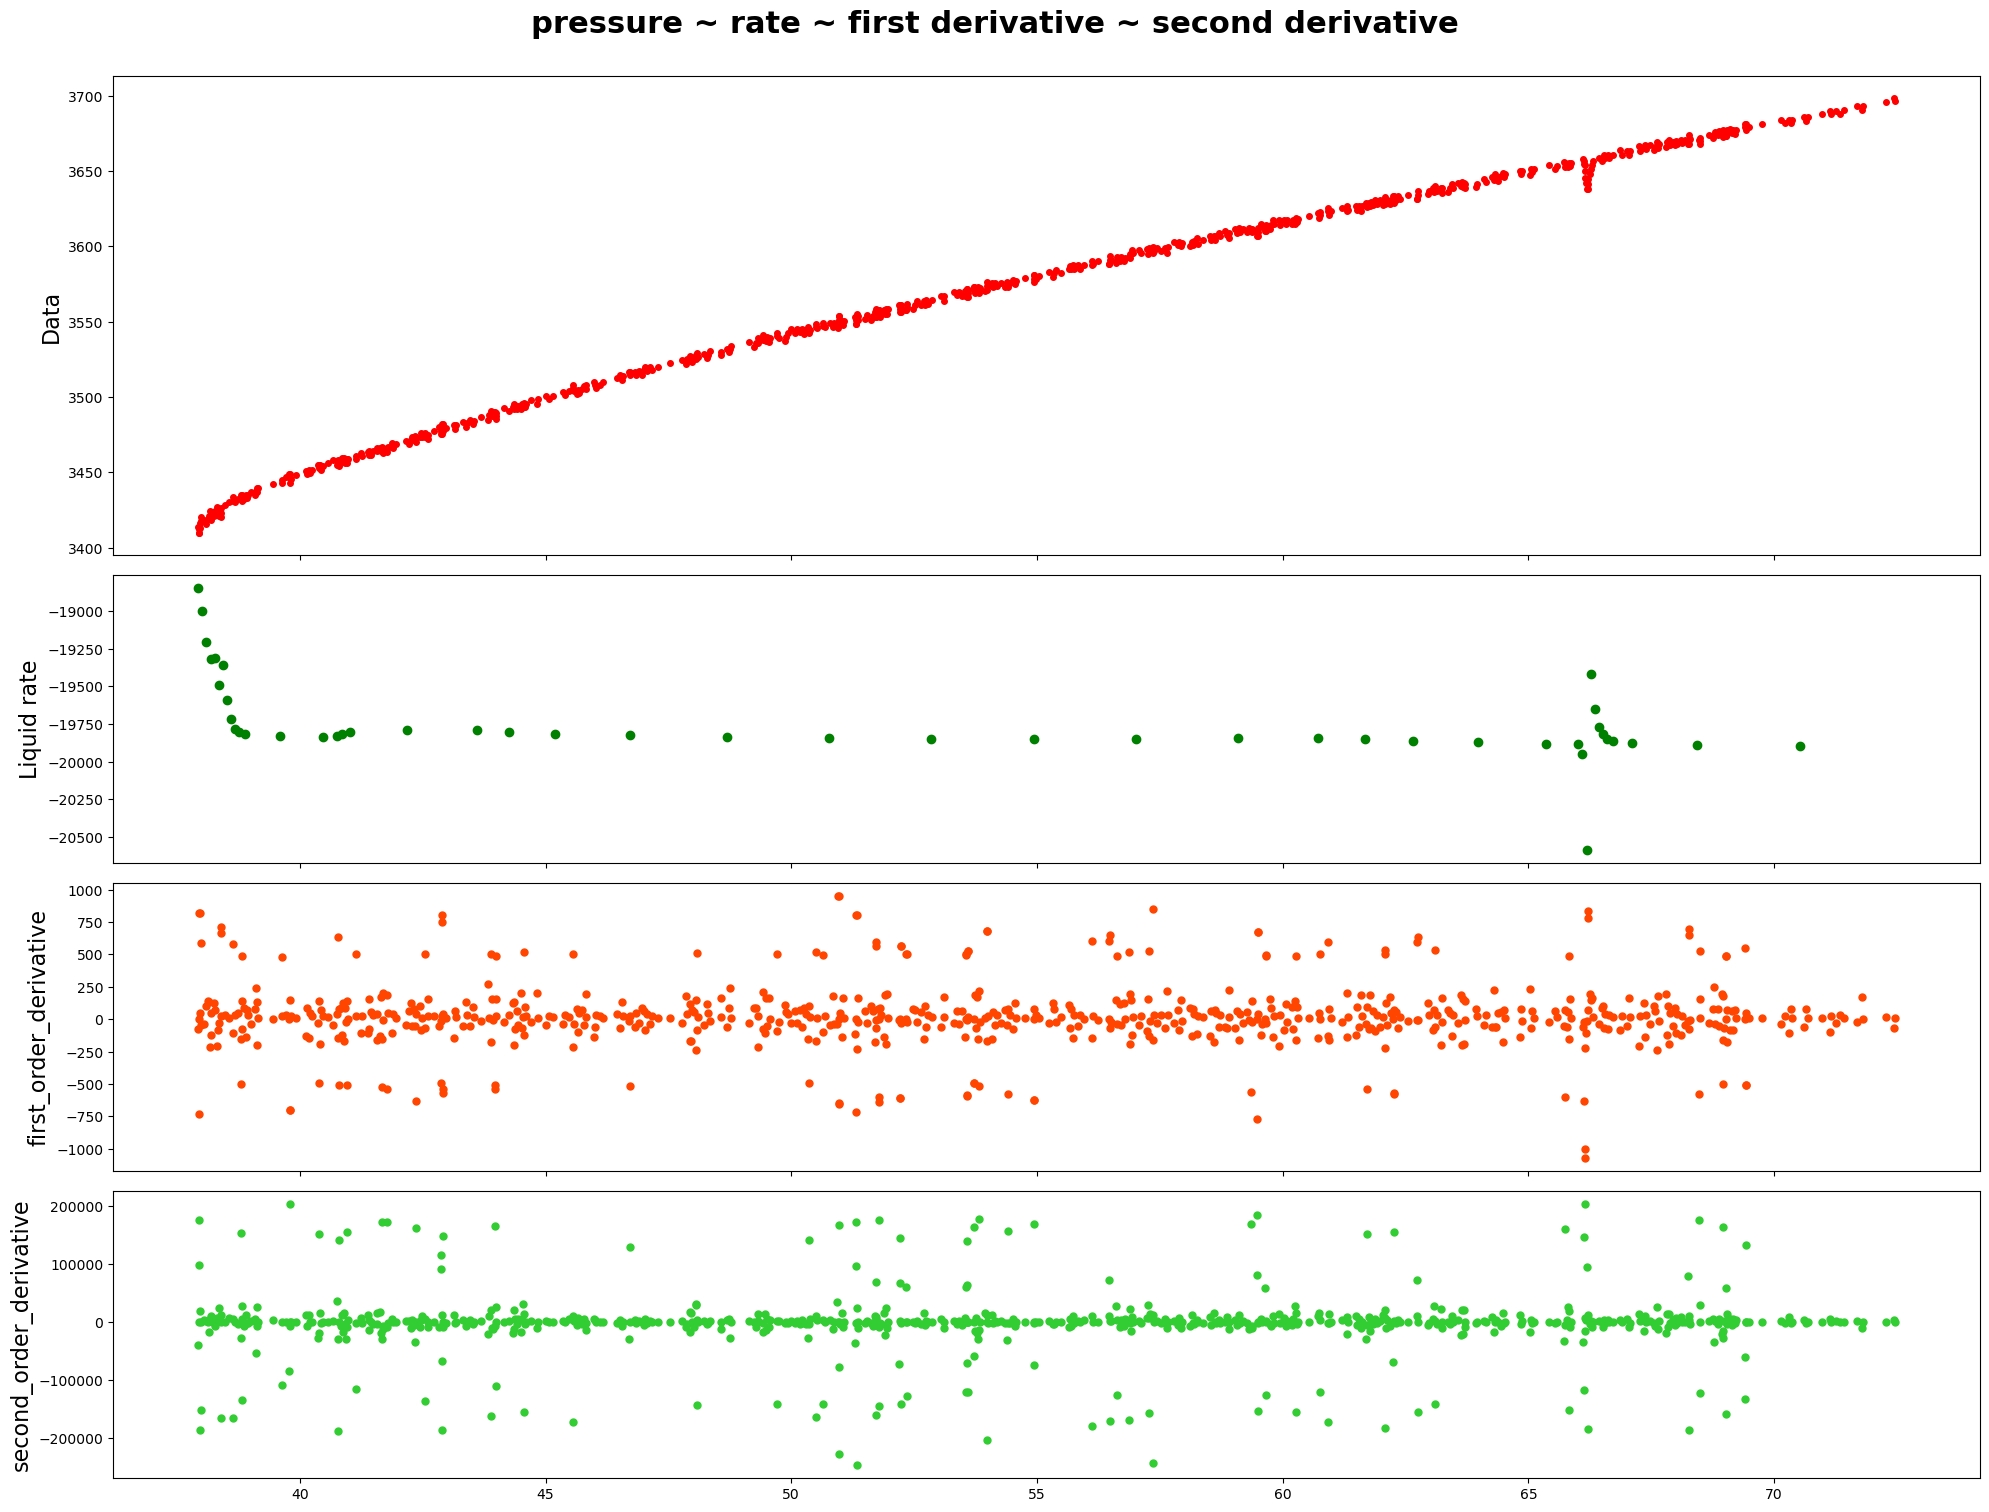

------row 3-----detected points:[]


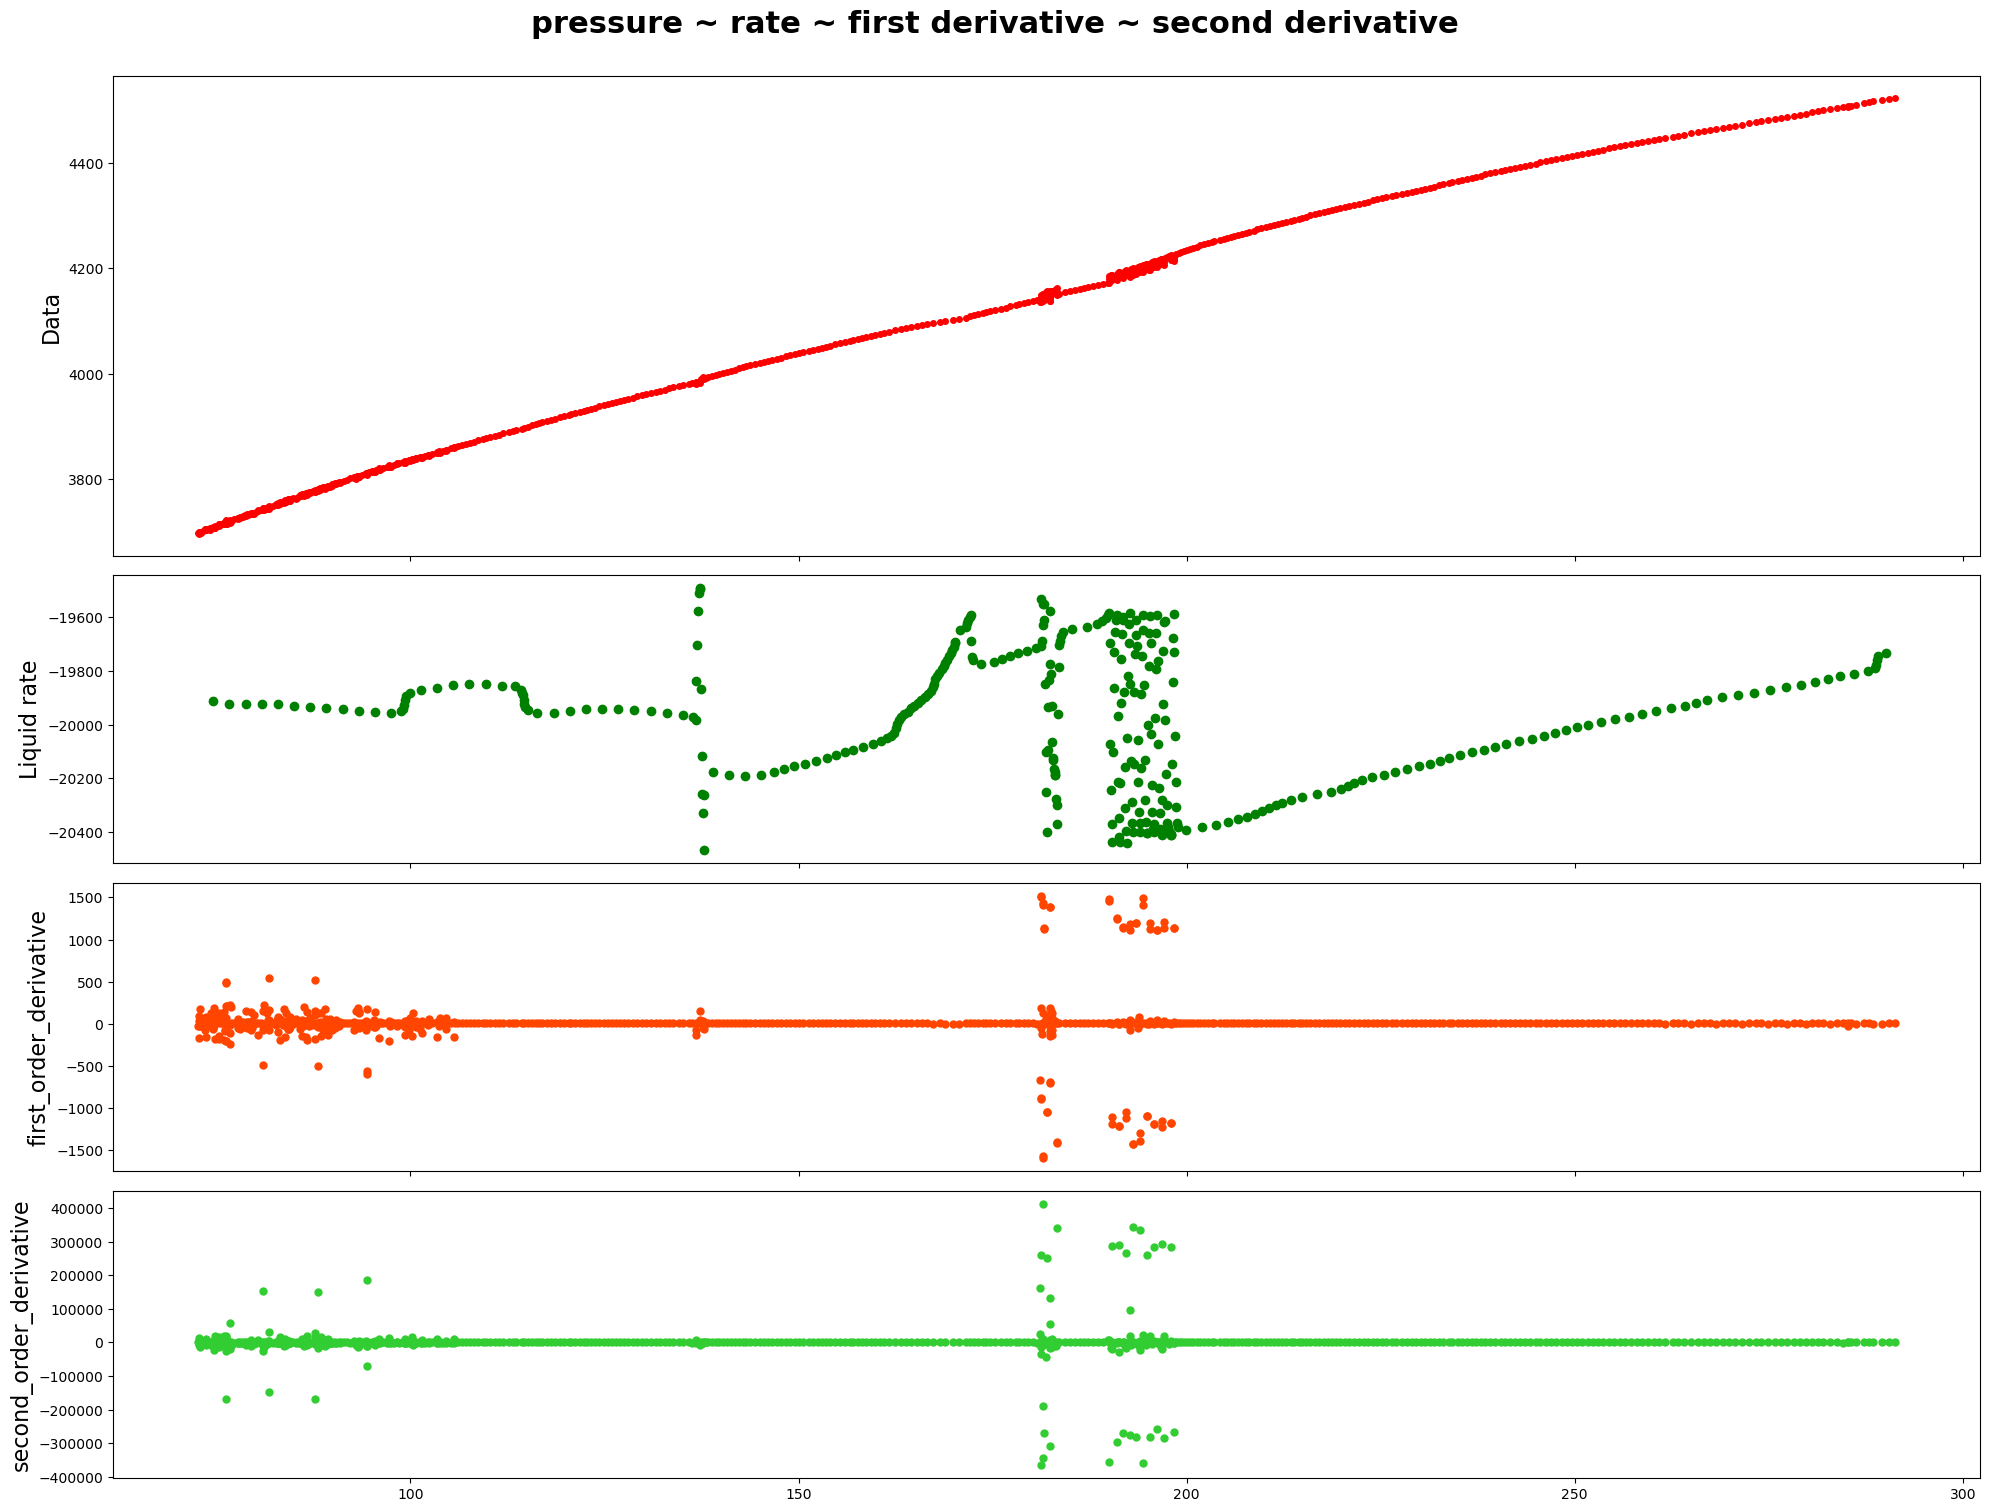

------row 4-----detected points:[2248, 2249, 2252]


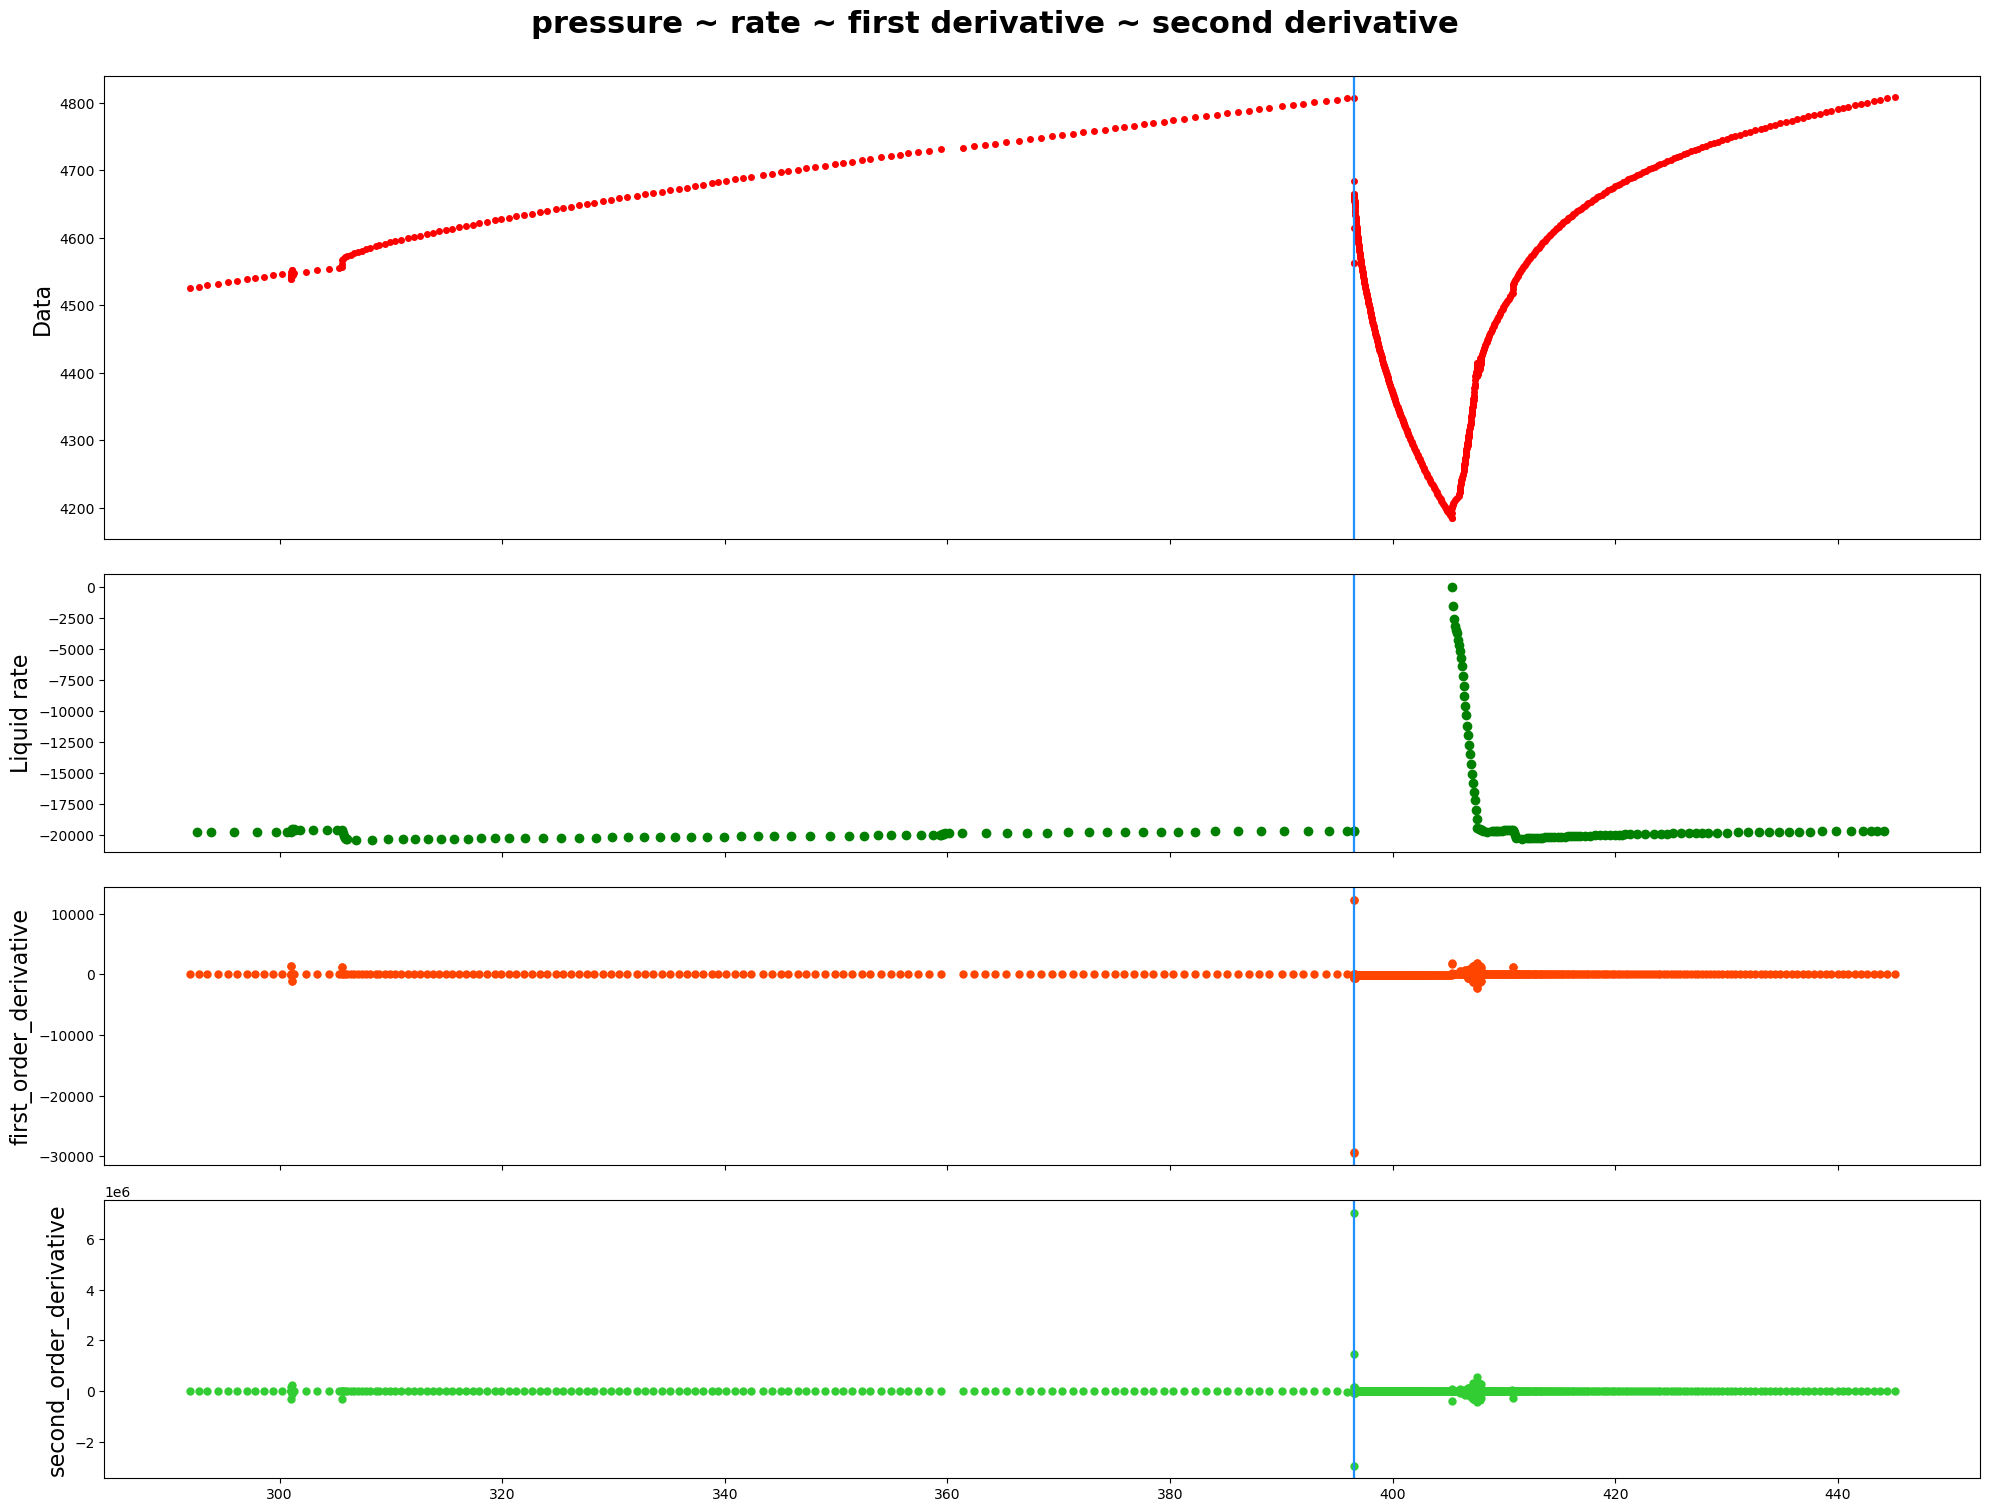

------row 5-----detected points:[2804, 2805, 3095]


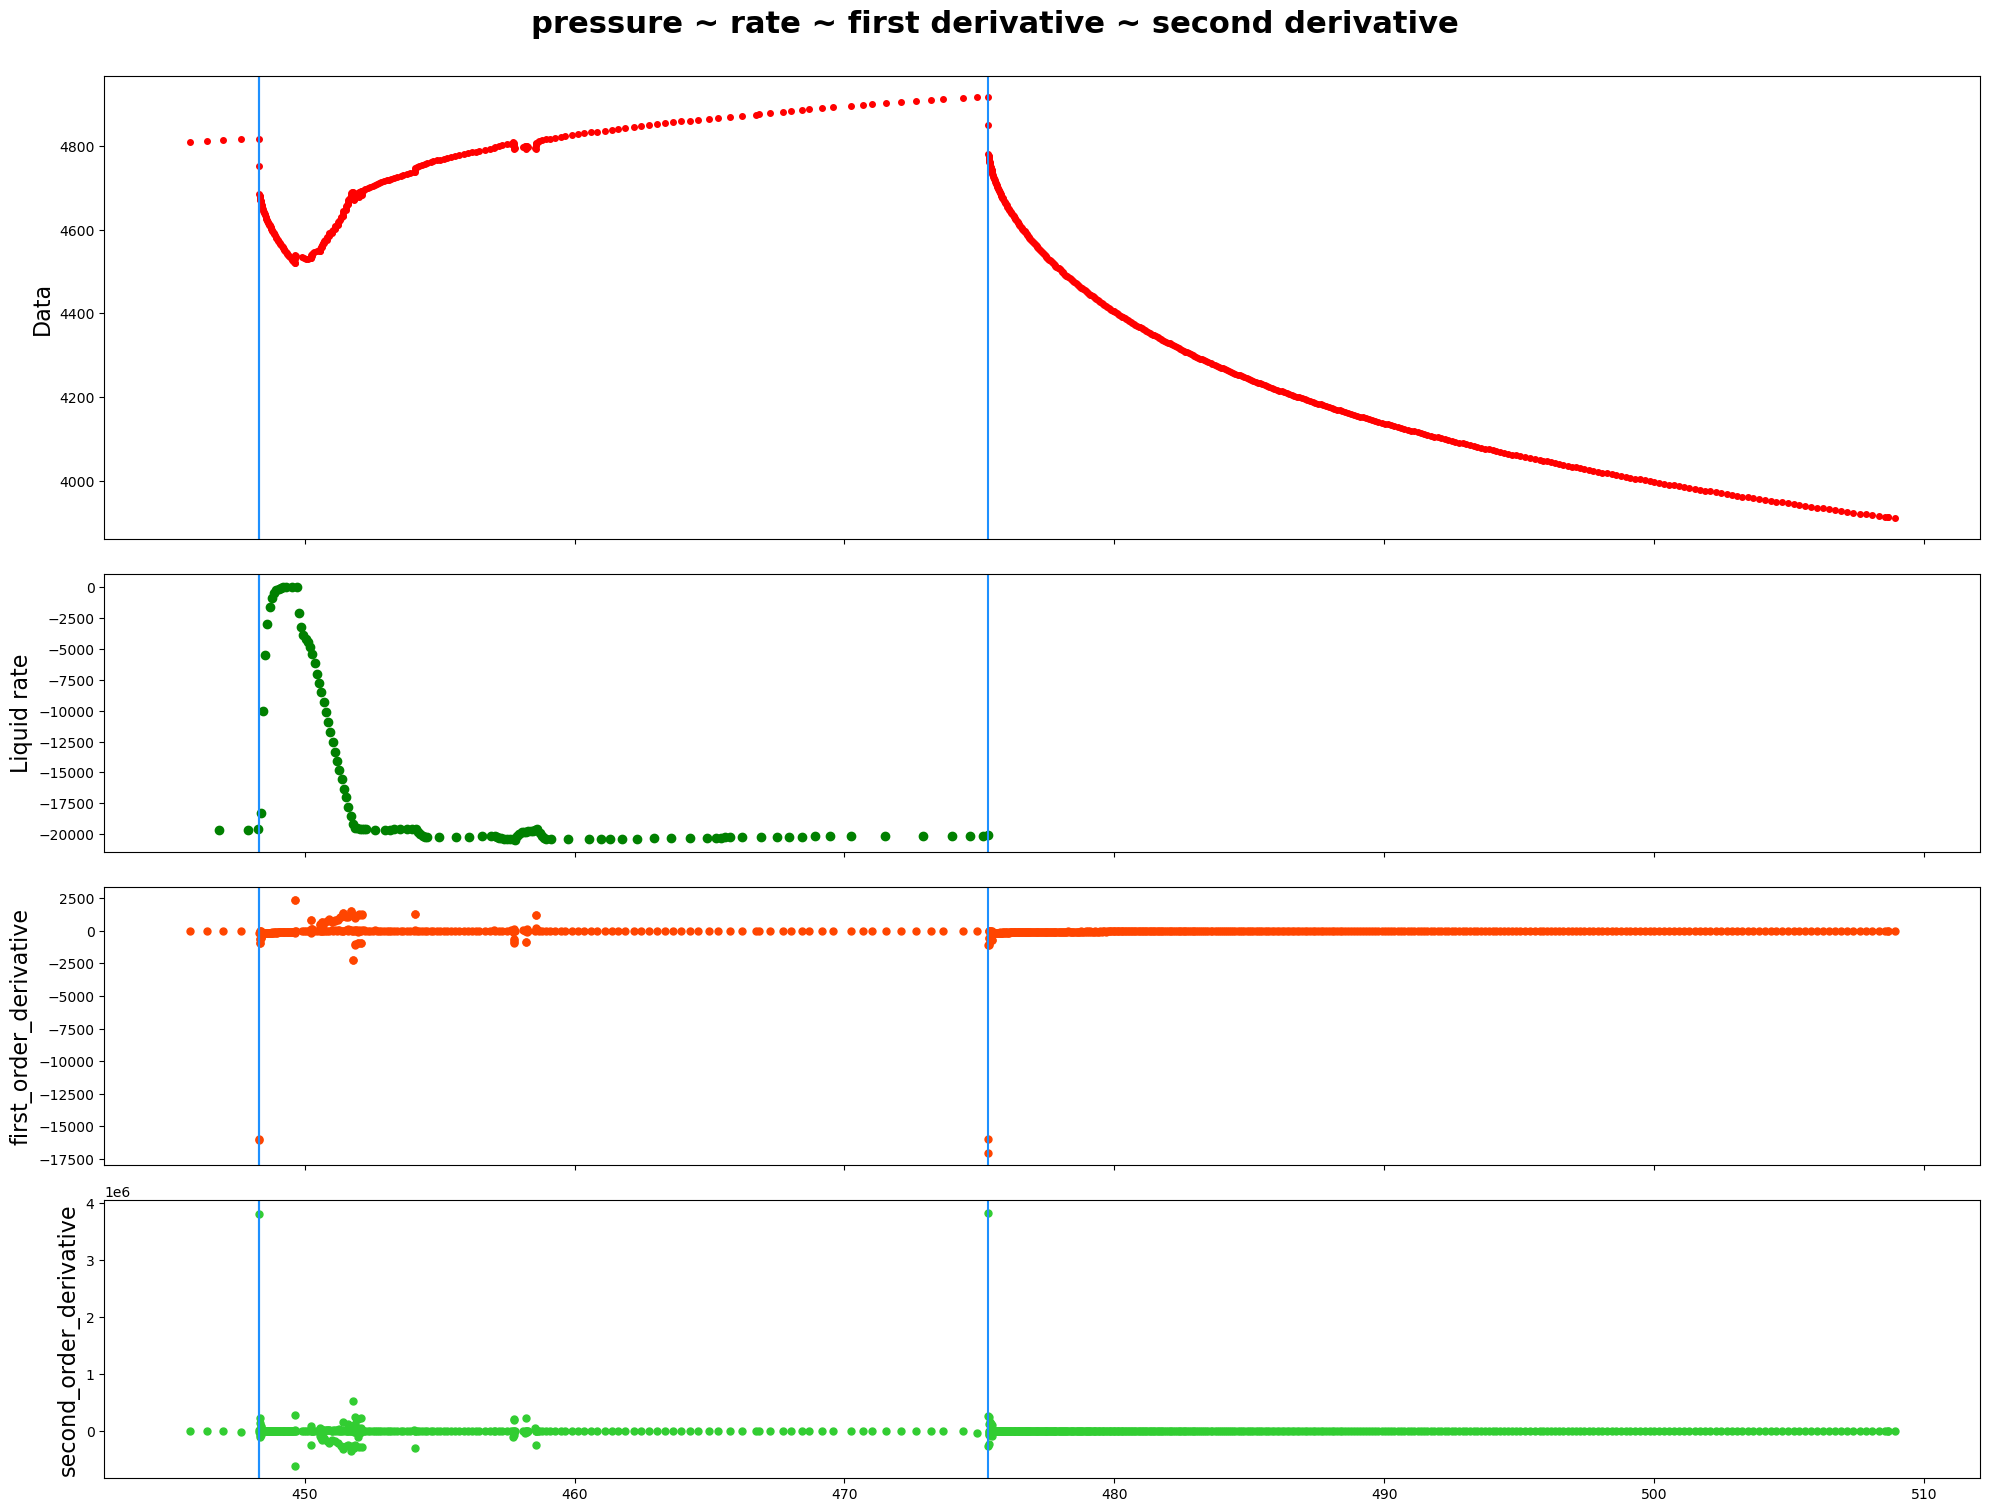

------row 6-----detected points:[3694, 3989]


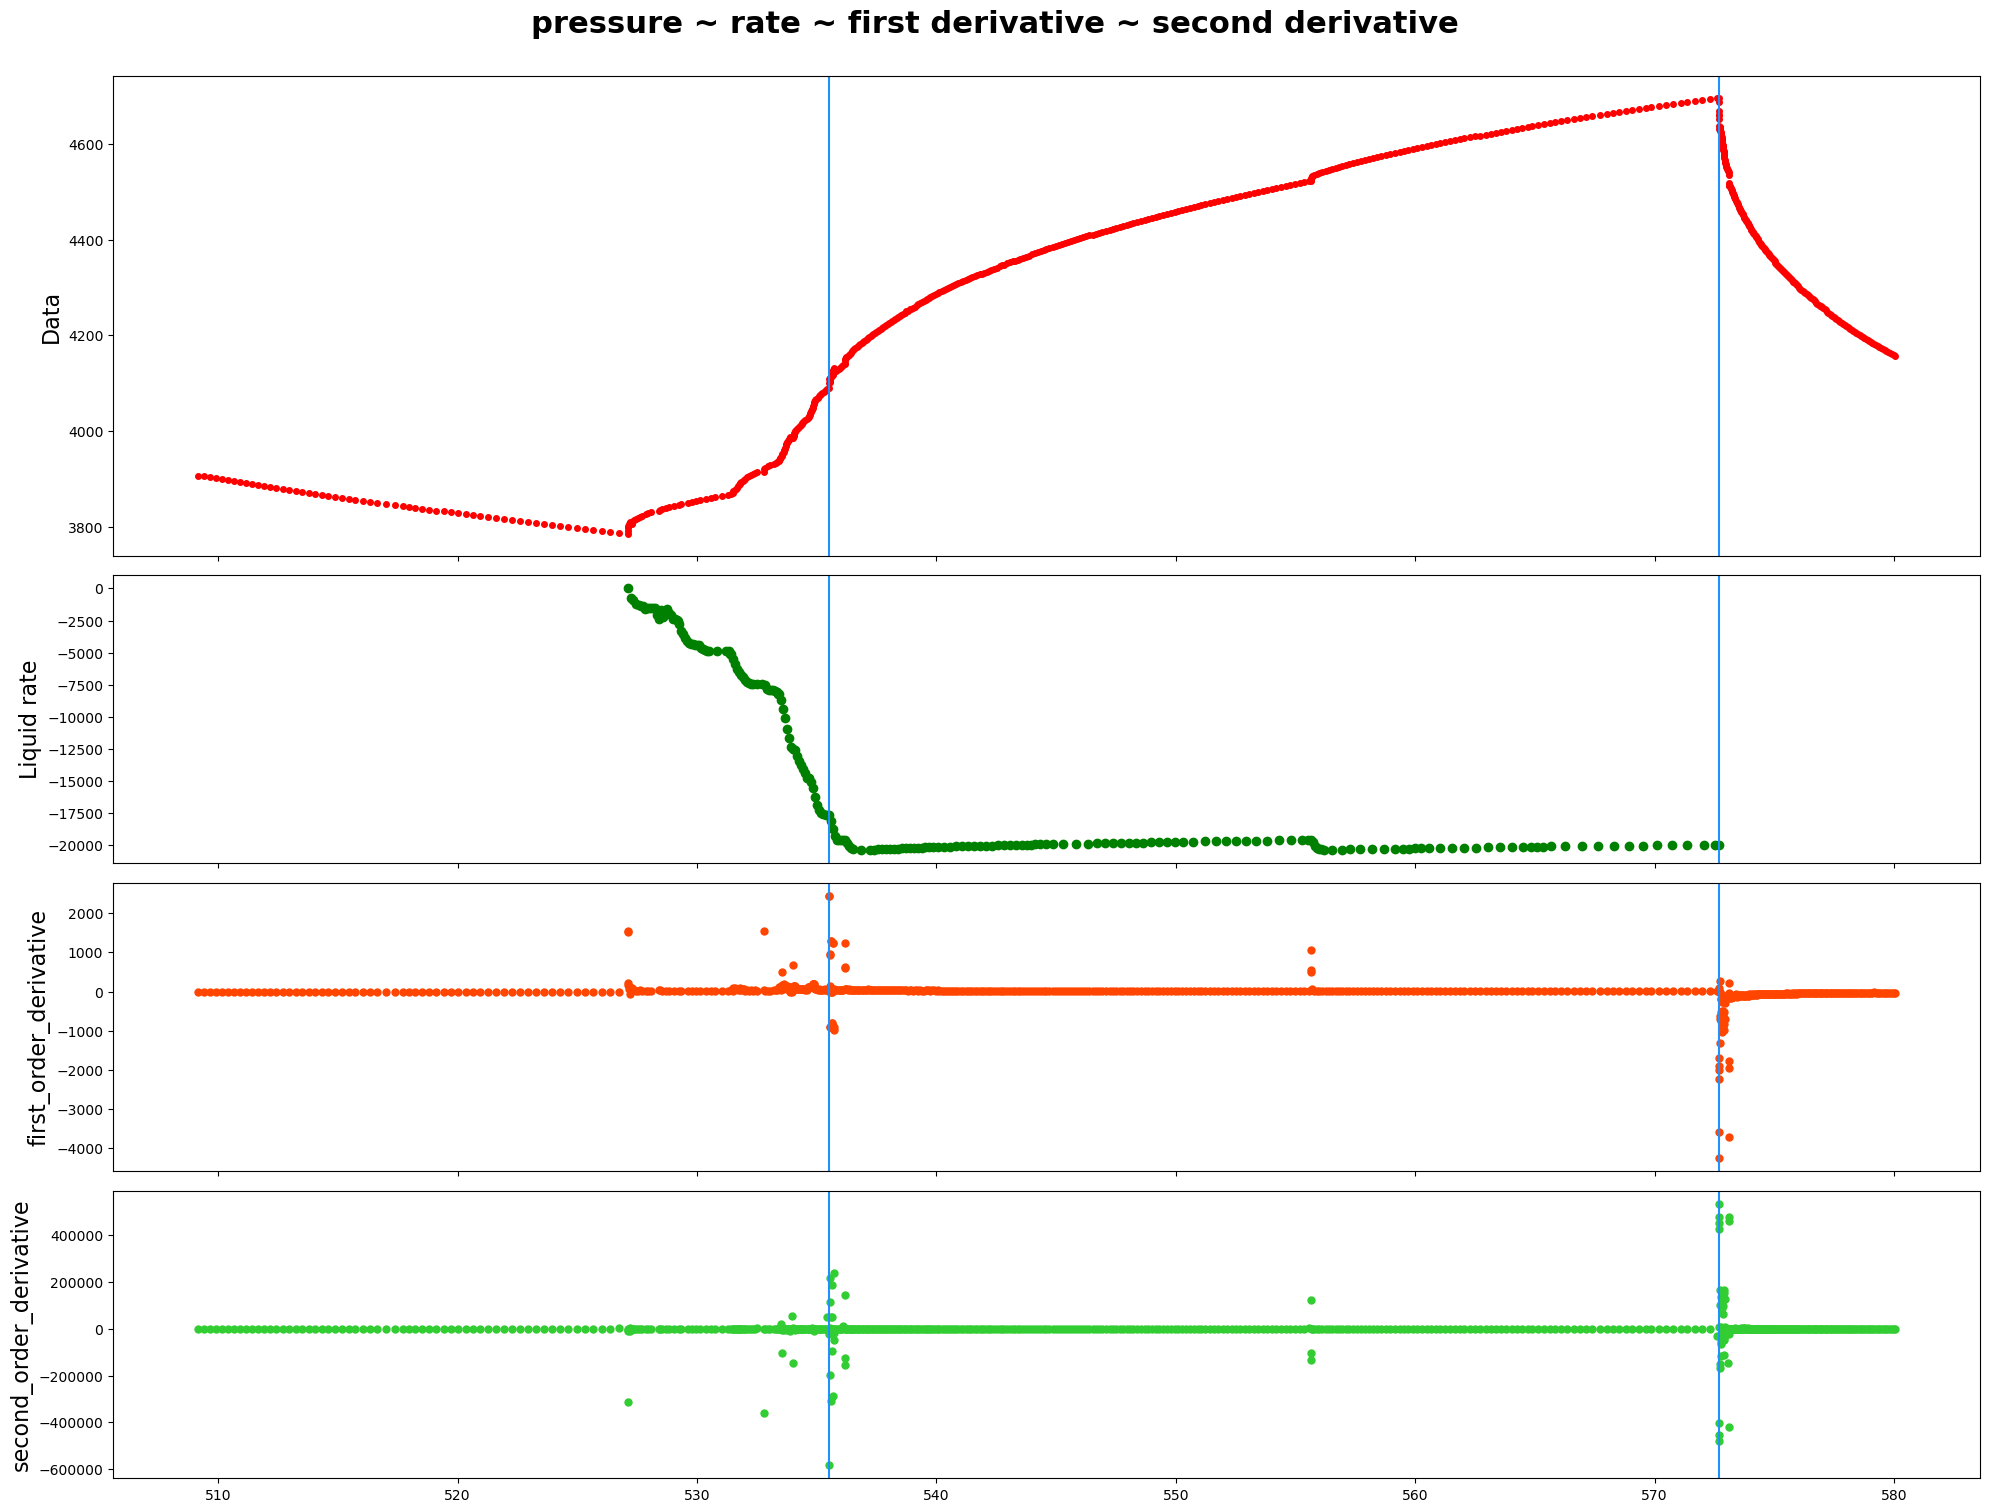

------row 7-----detected points:[4762]


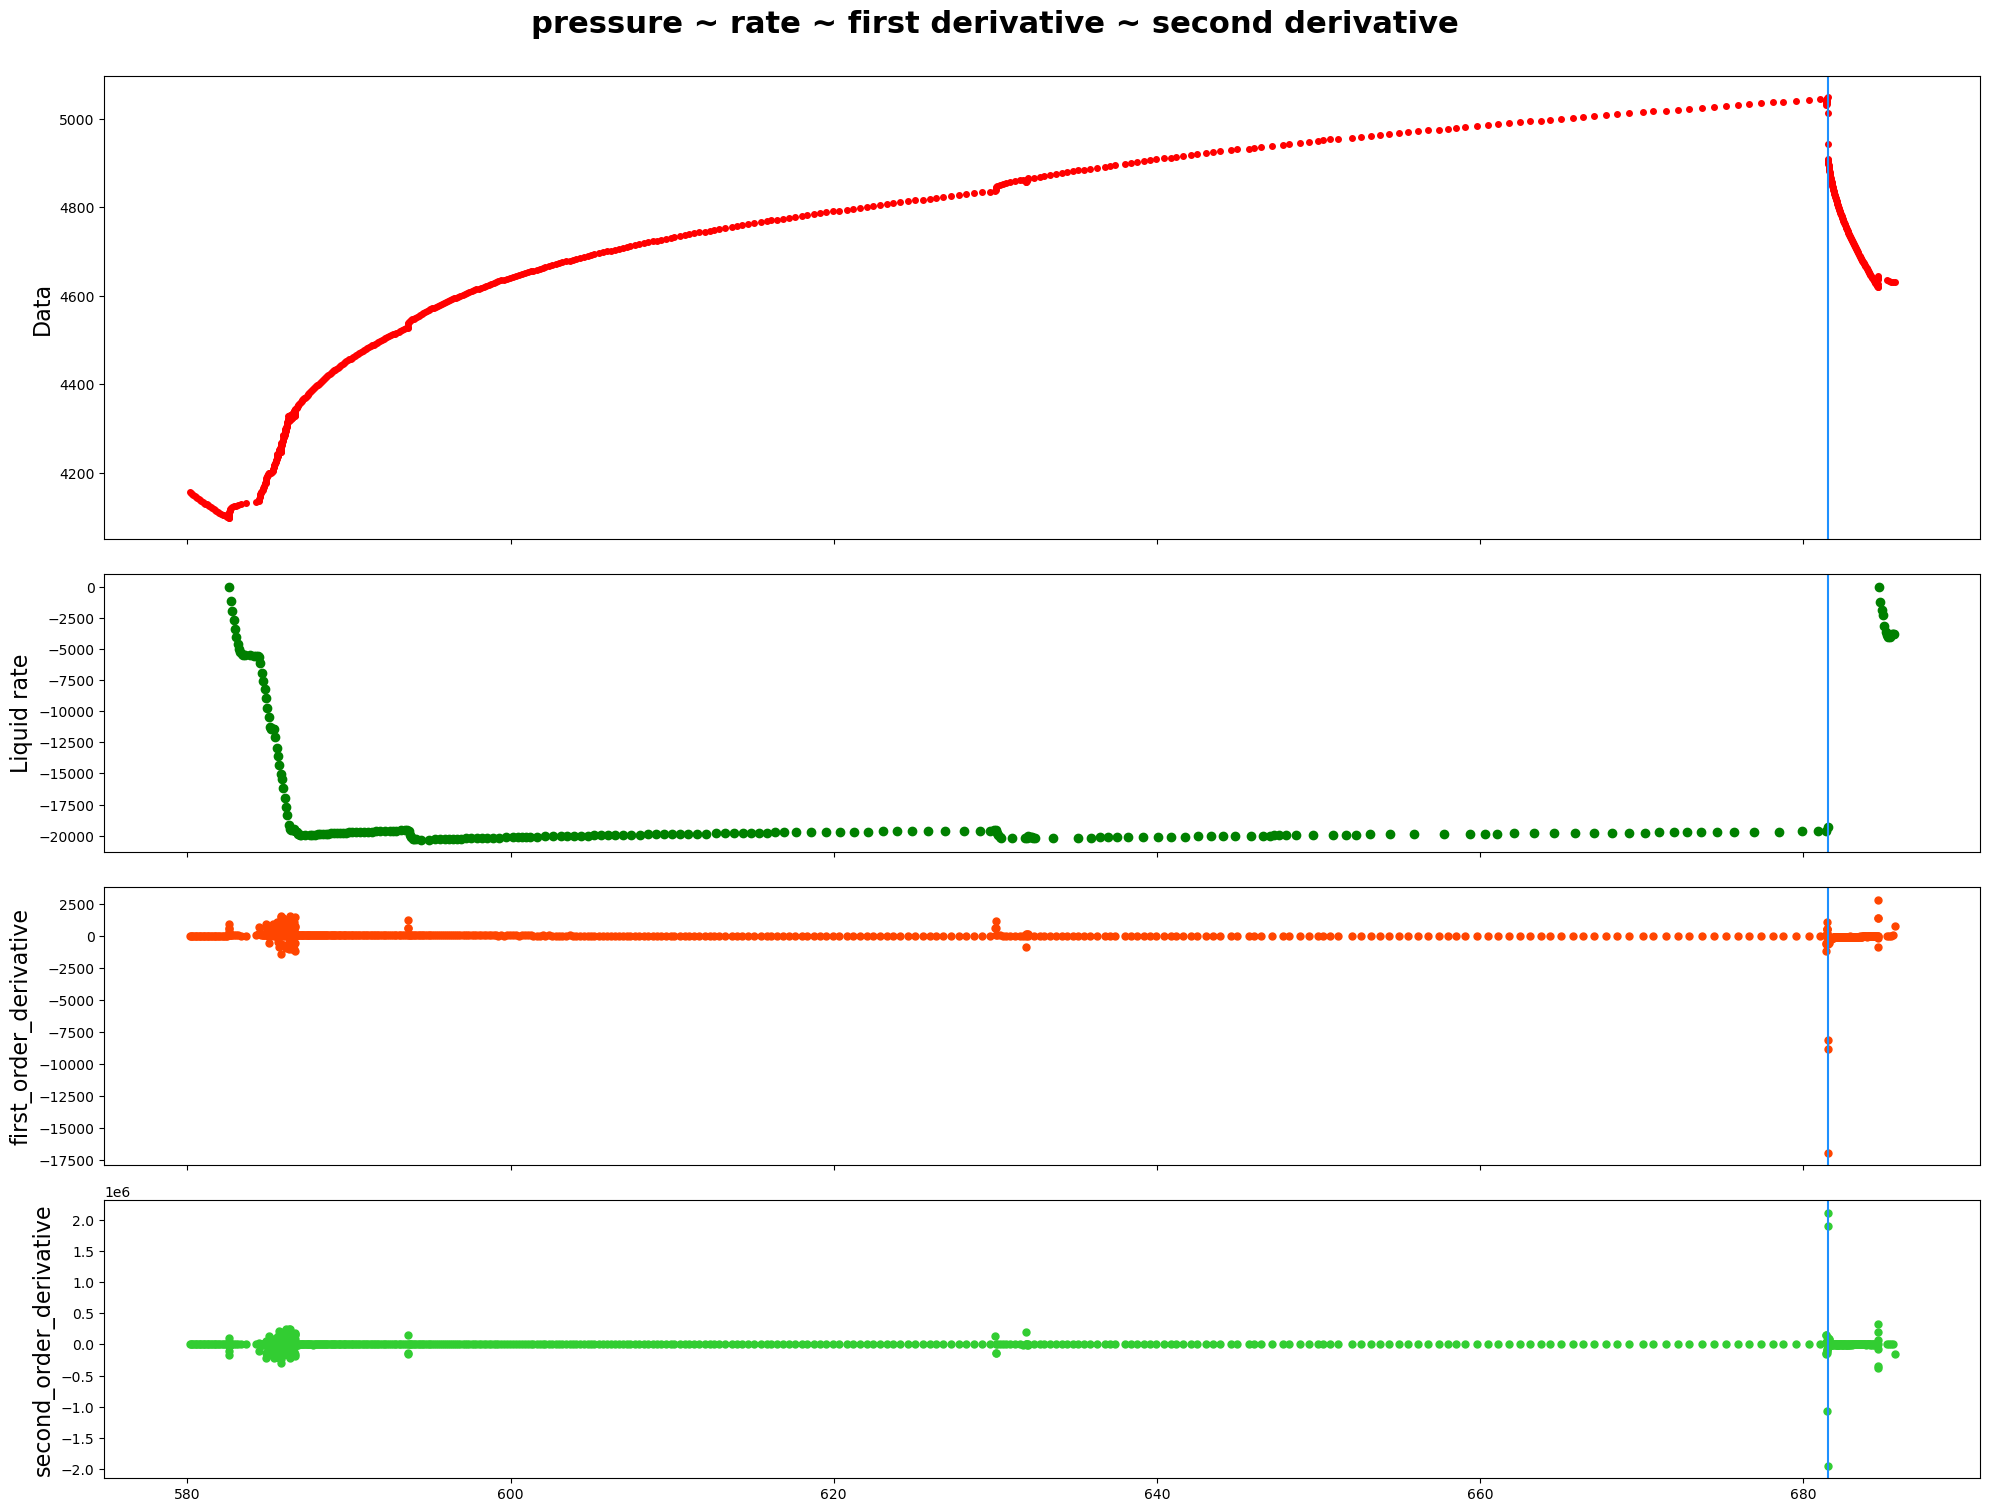

------row 8-----detected points:[]


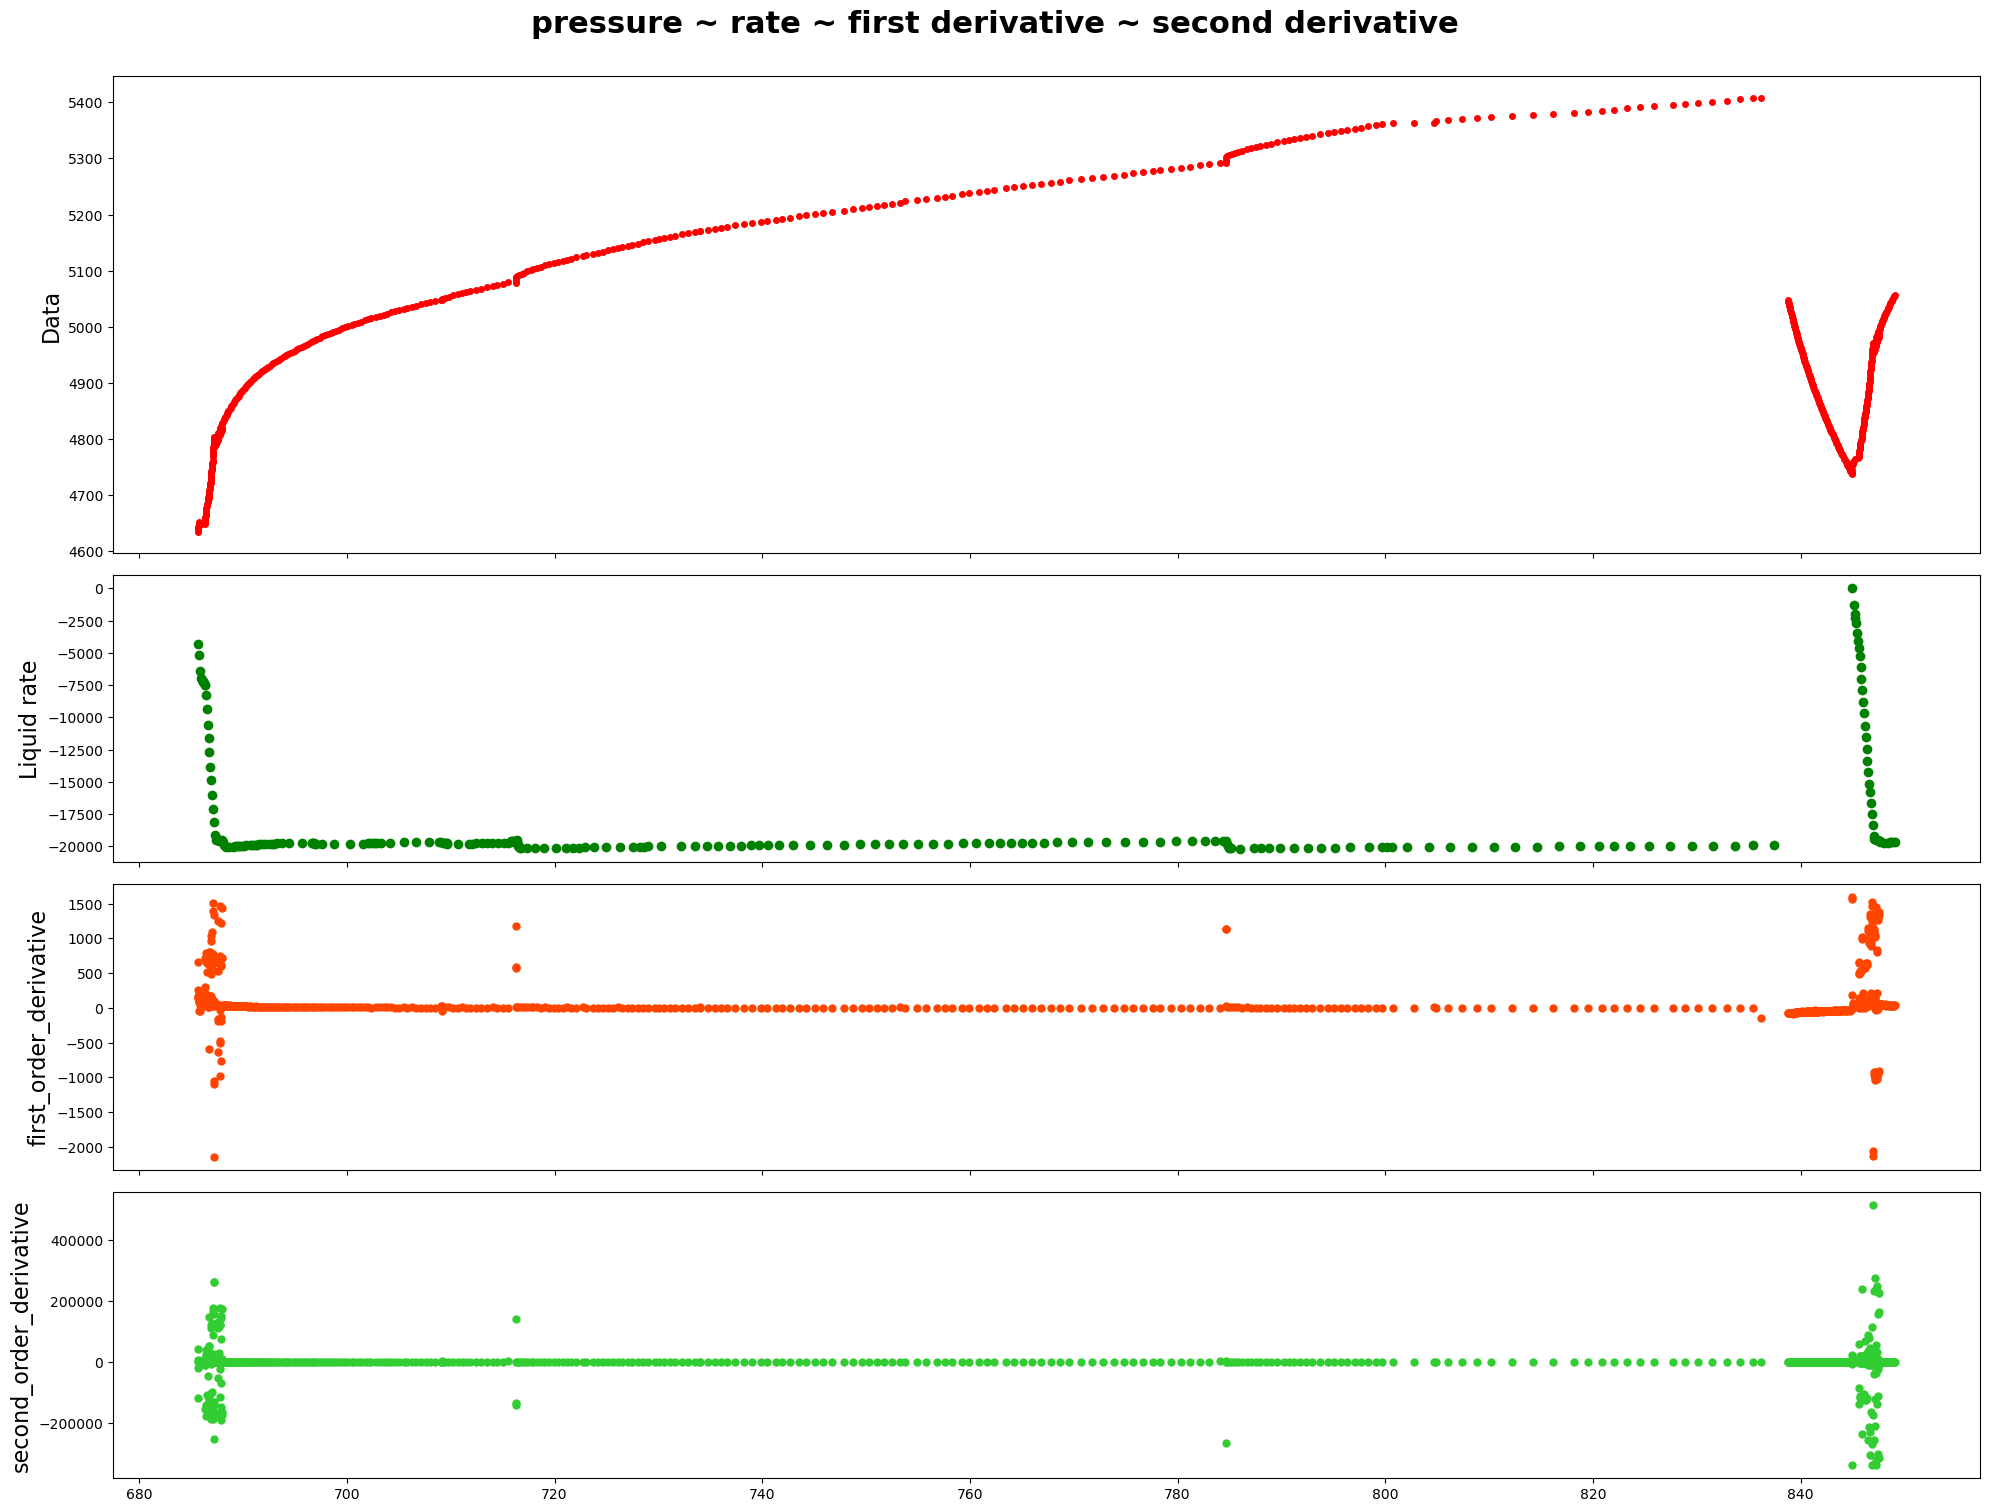

------row 9-----detected points:[5771, 5986]


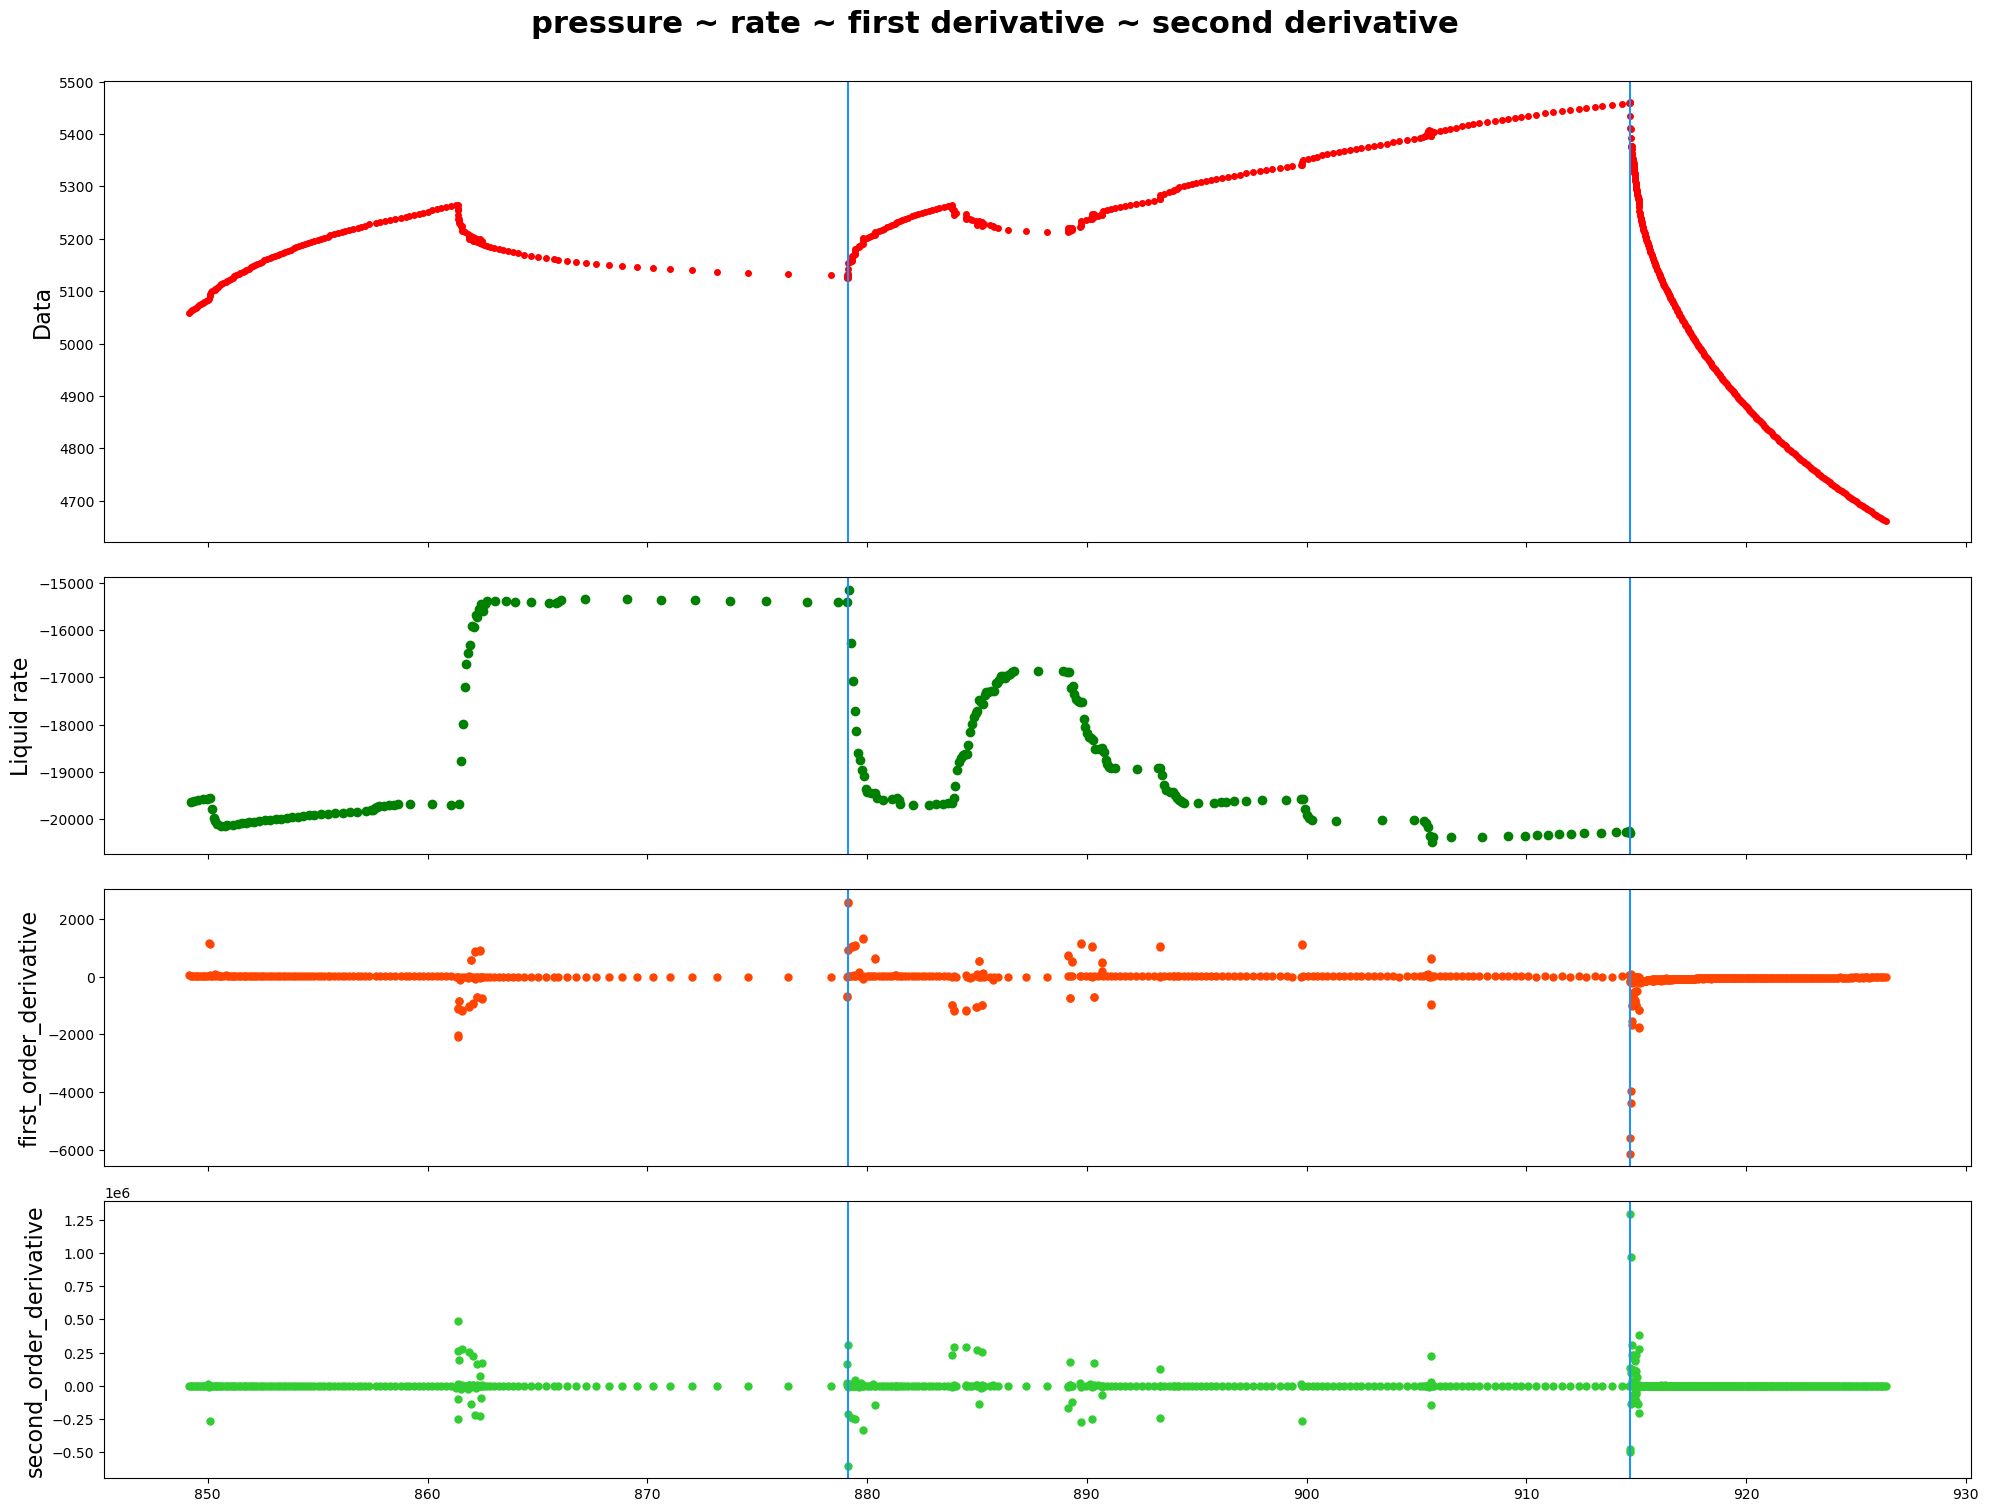

------row 10-----detected points:[6544, 6546, 6547]


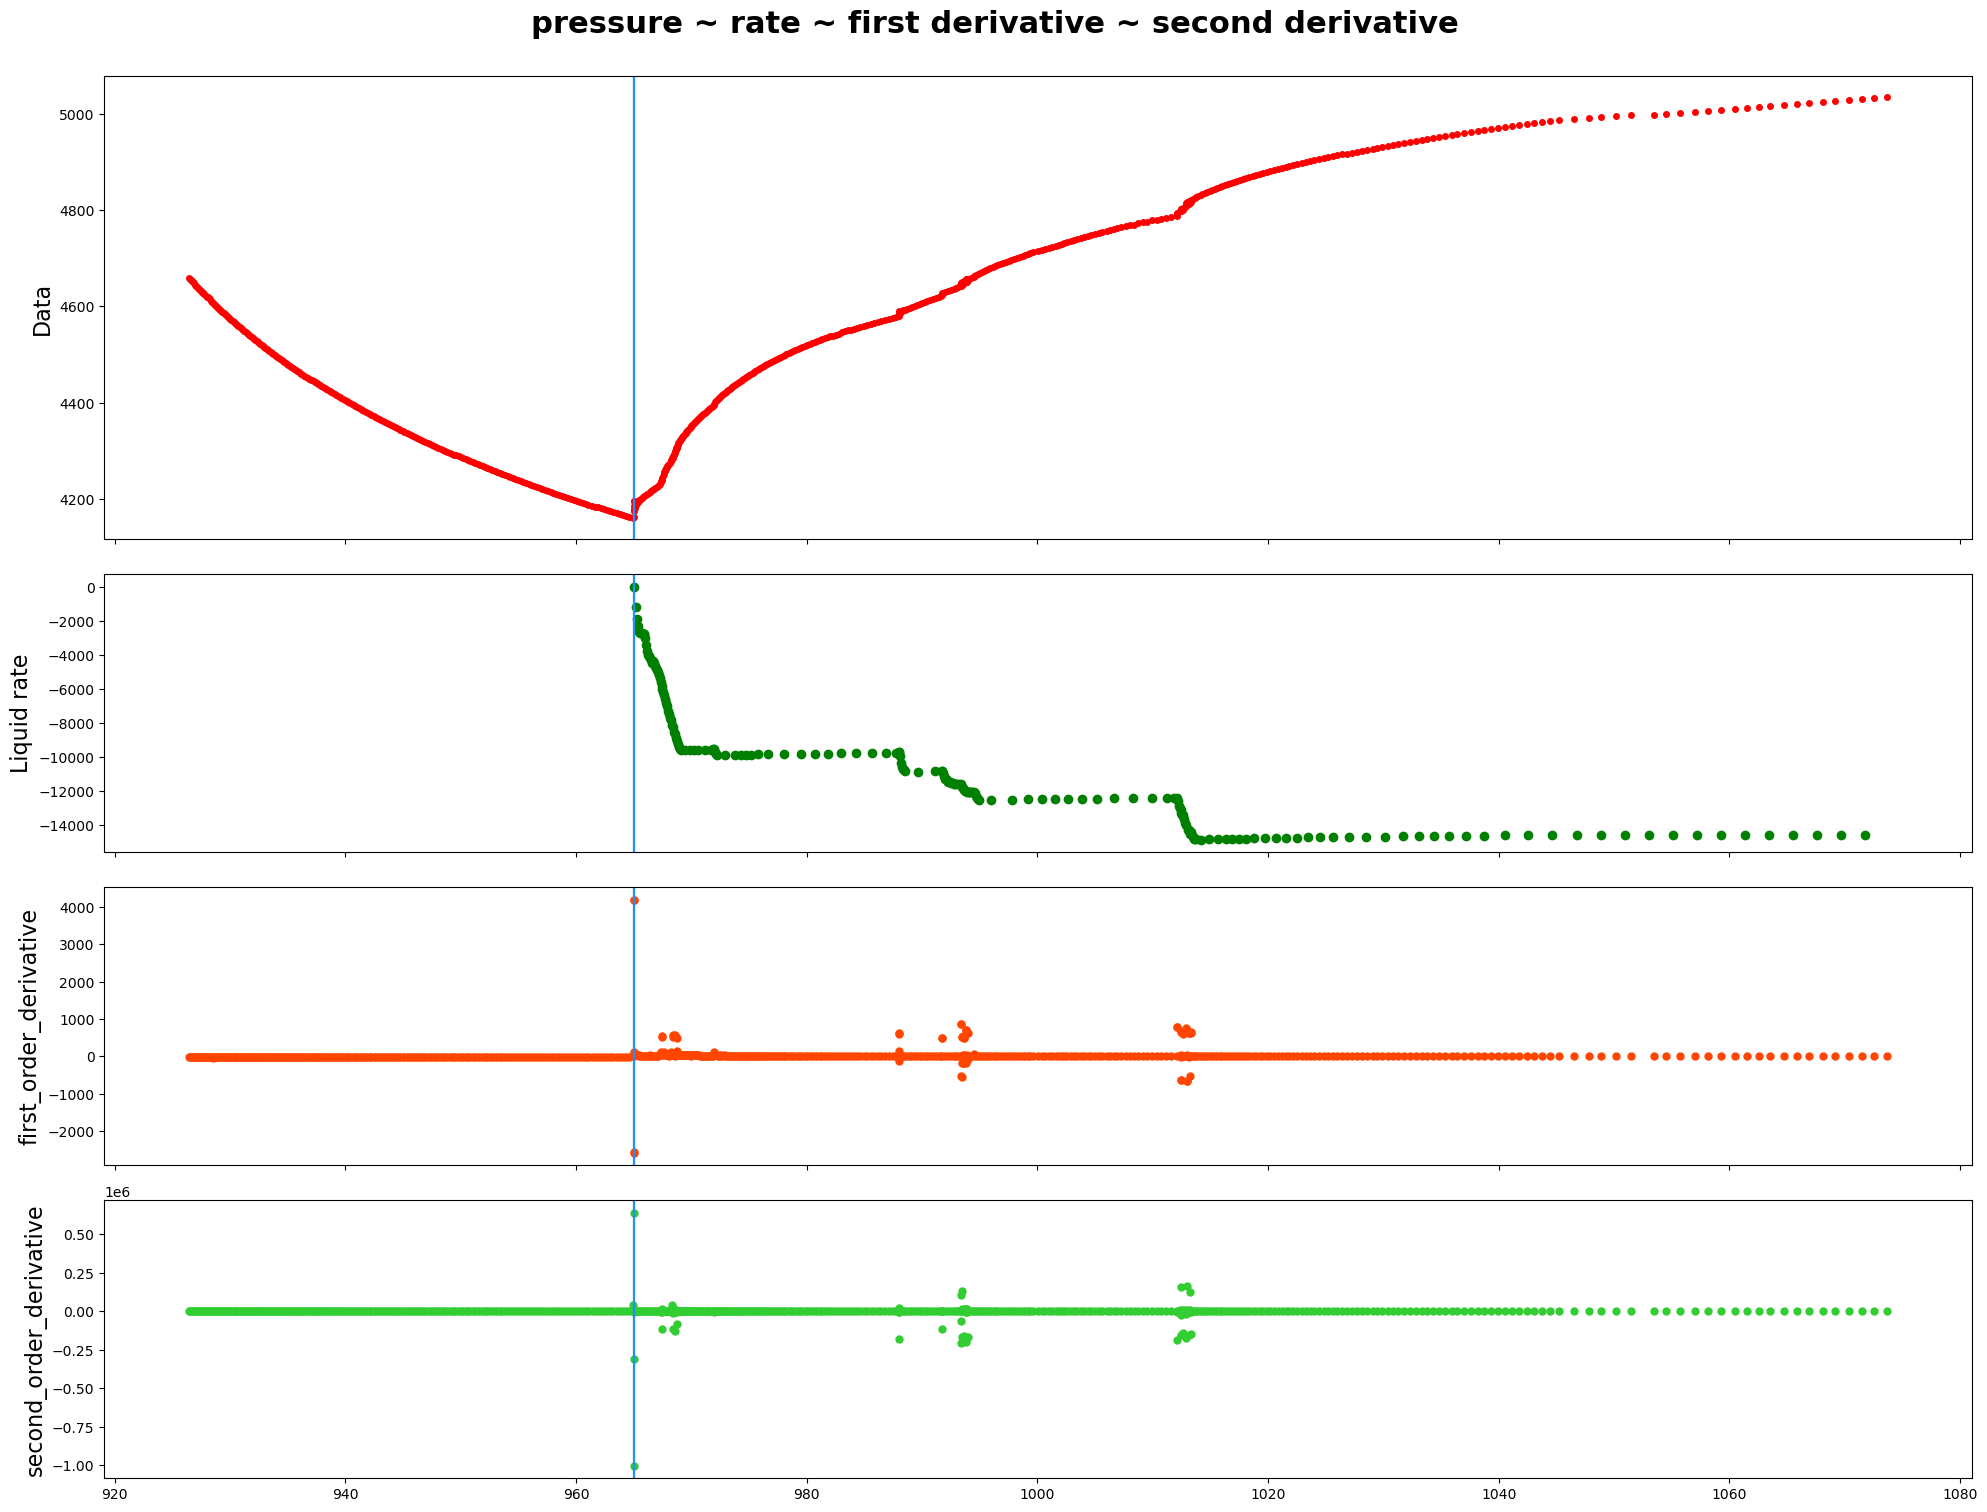

------row 11-----detected points:[]


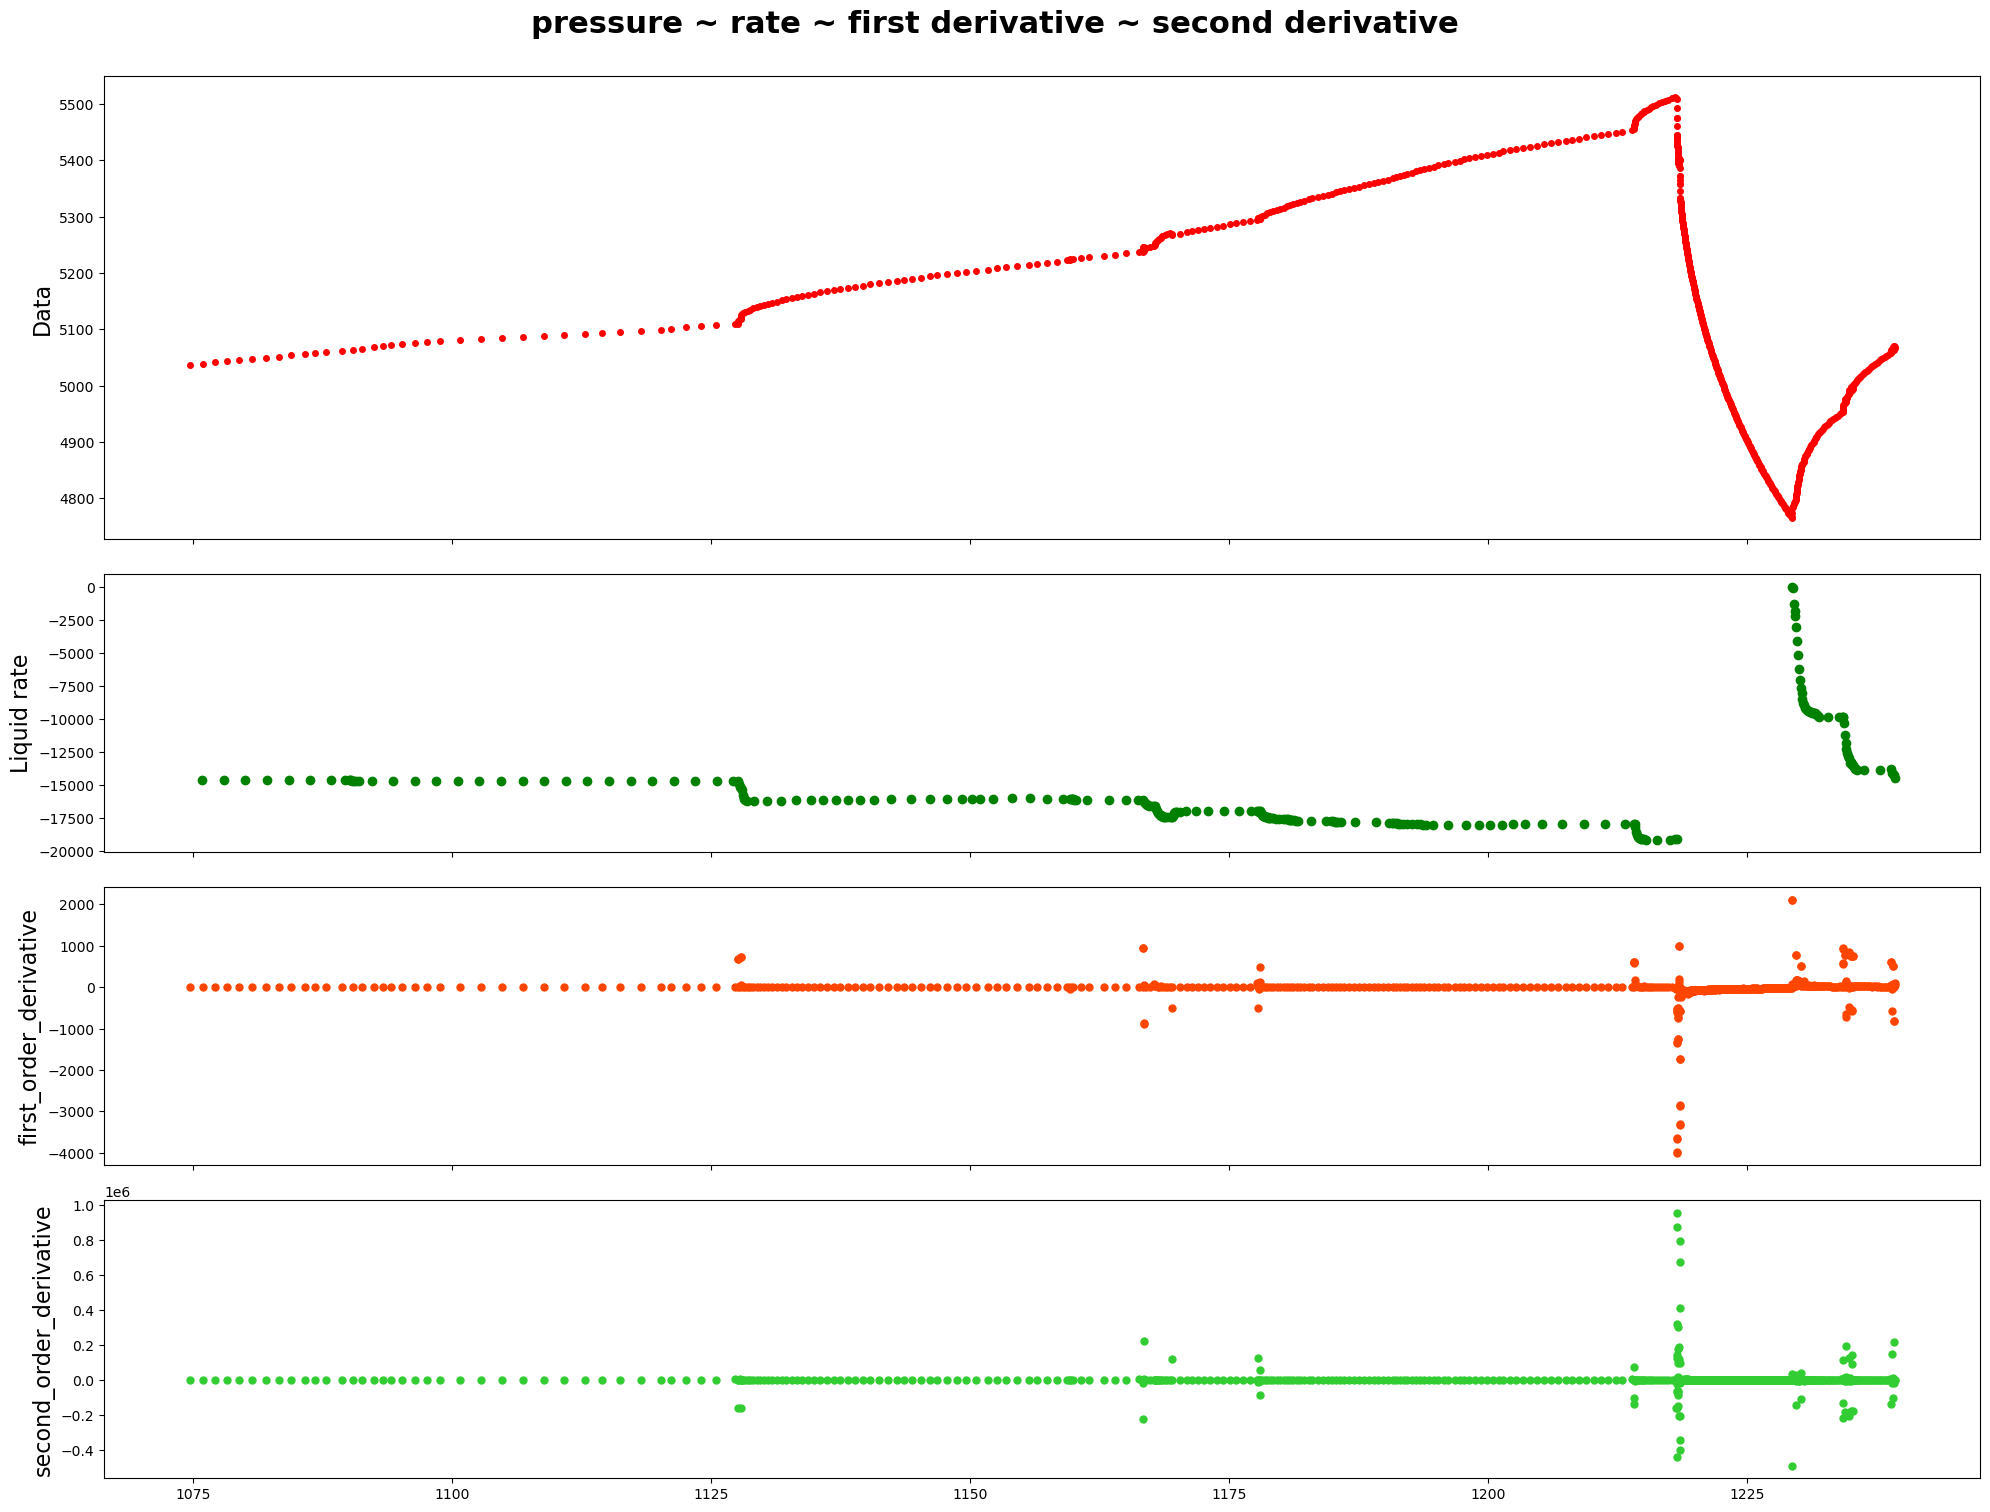

------row 12-----detected points:[]


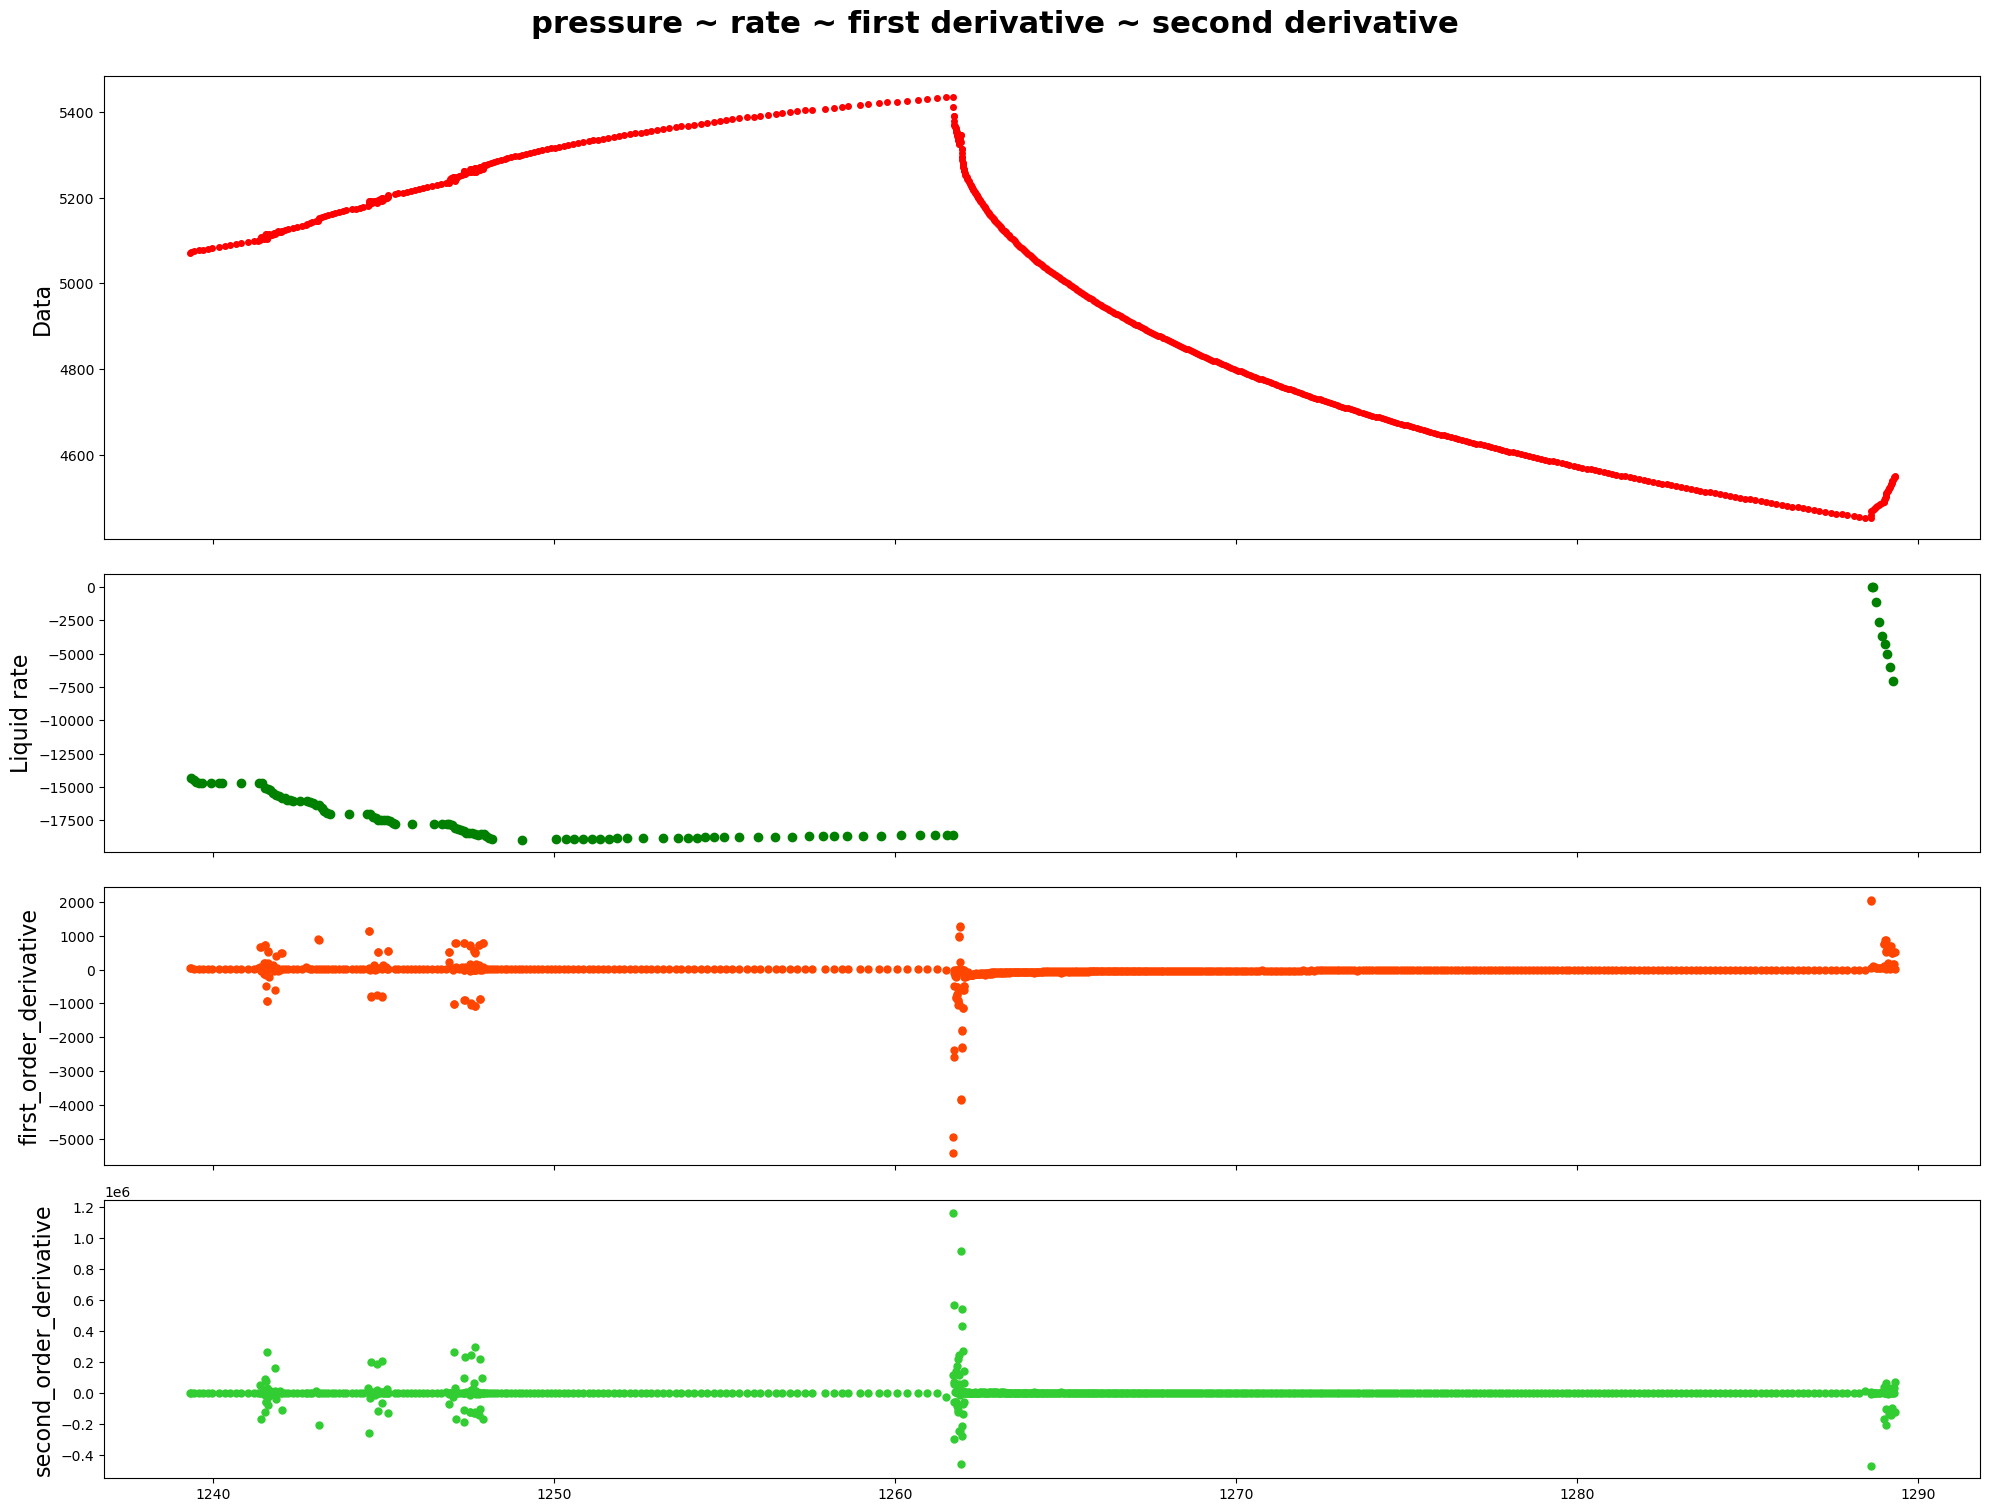

------row 13-----detected points:[8605, 9025]


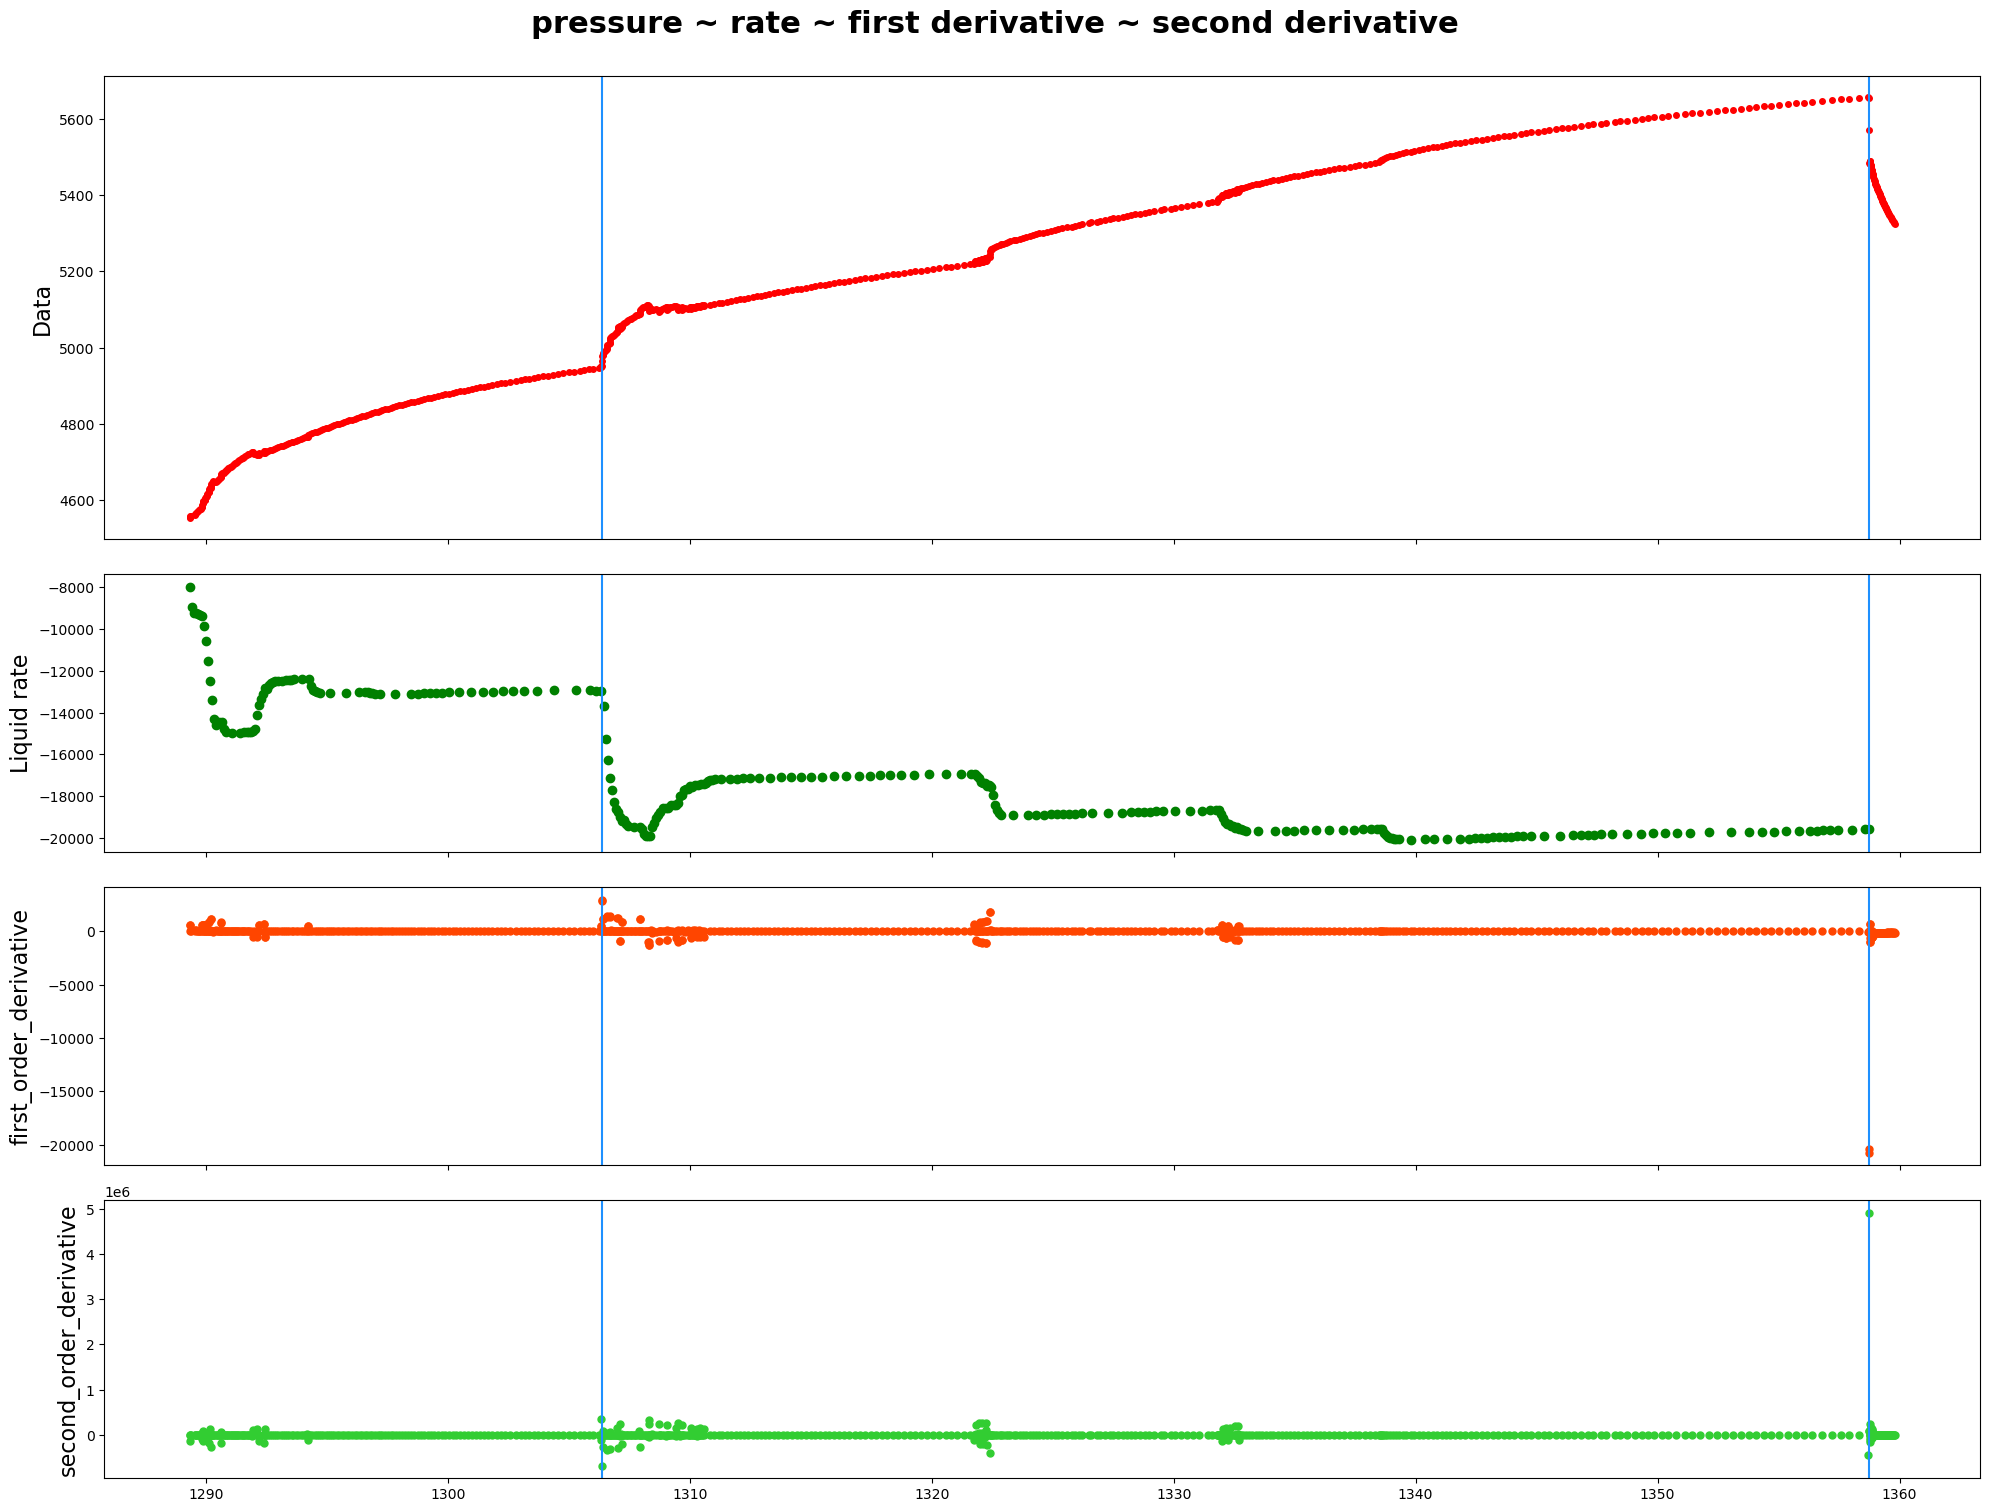

------row 14-----detected points:[9620, 9629, 9641]


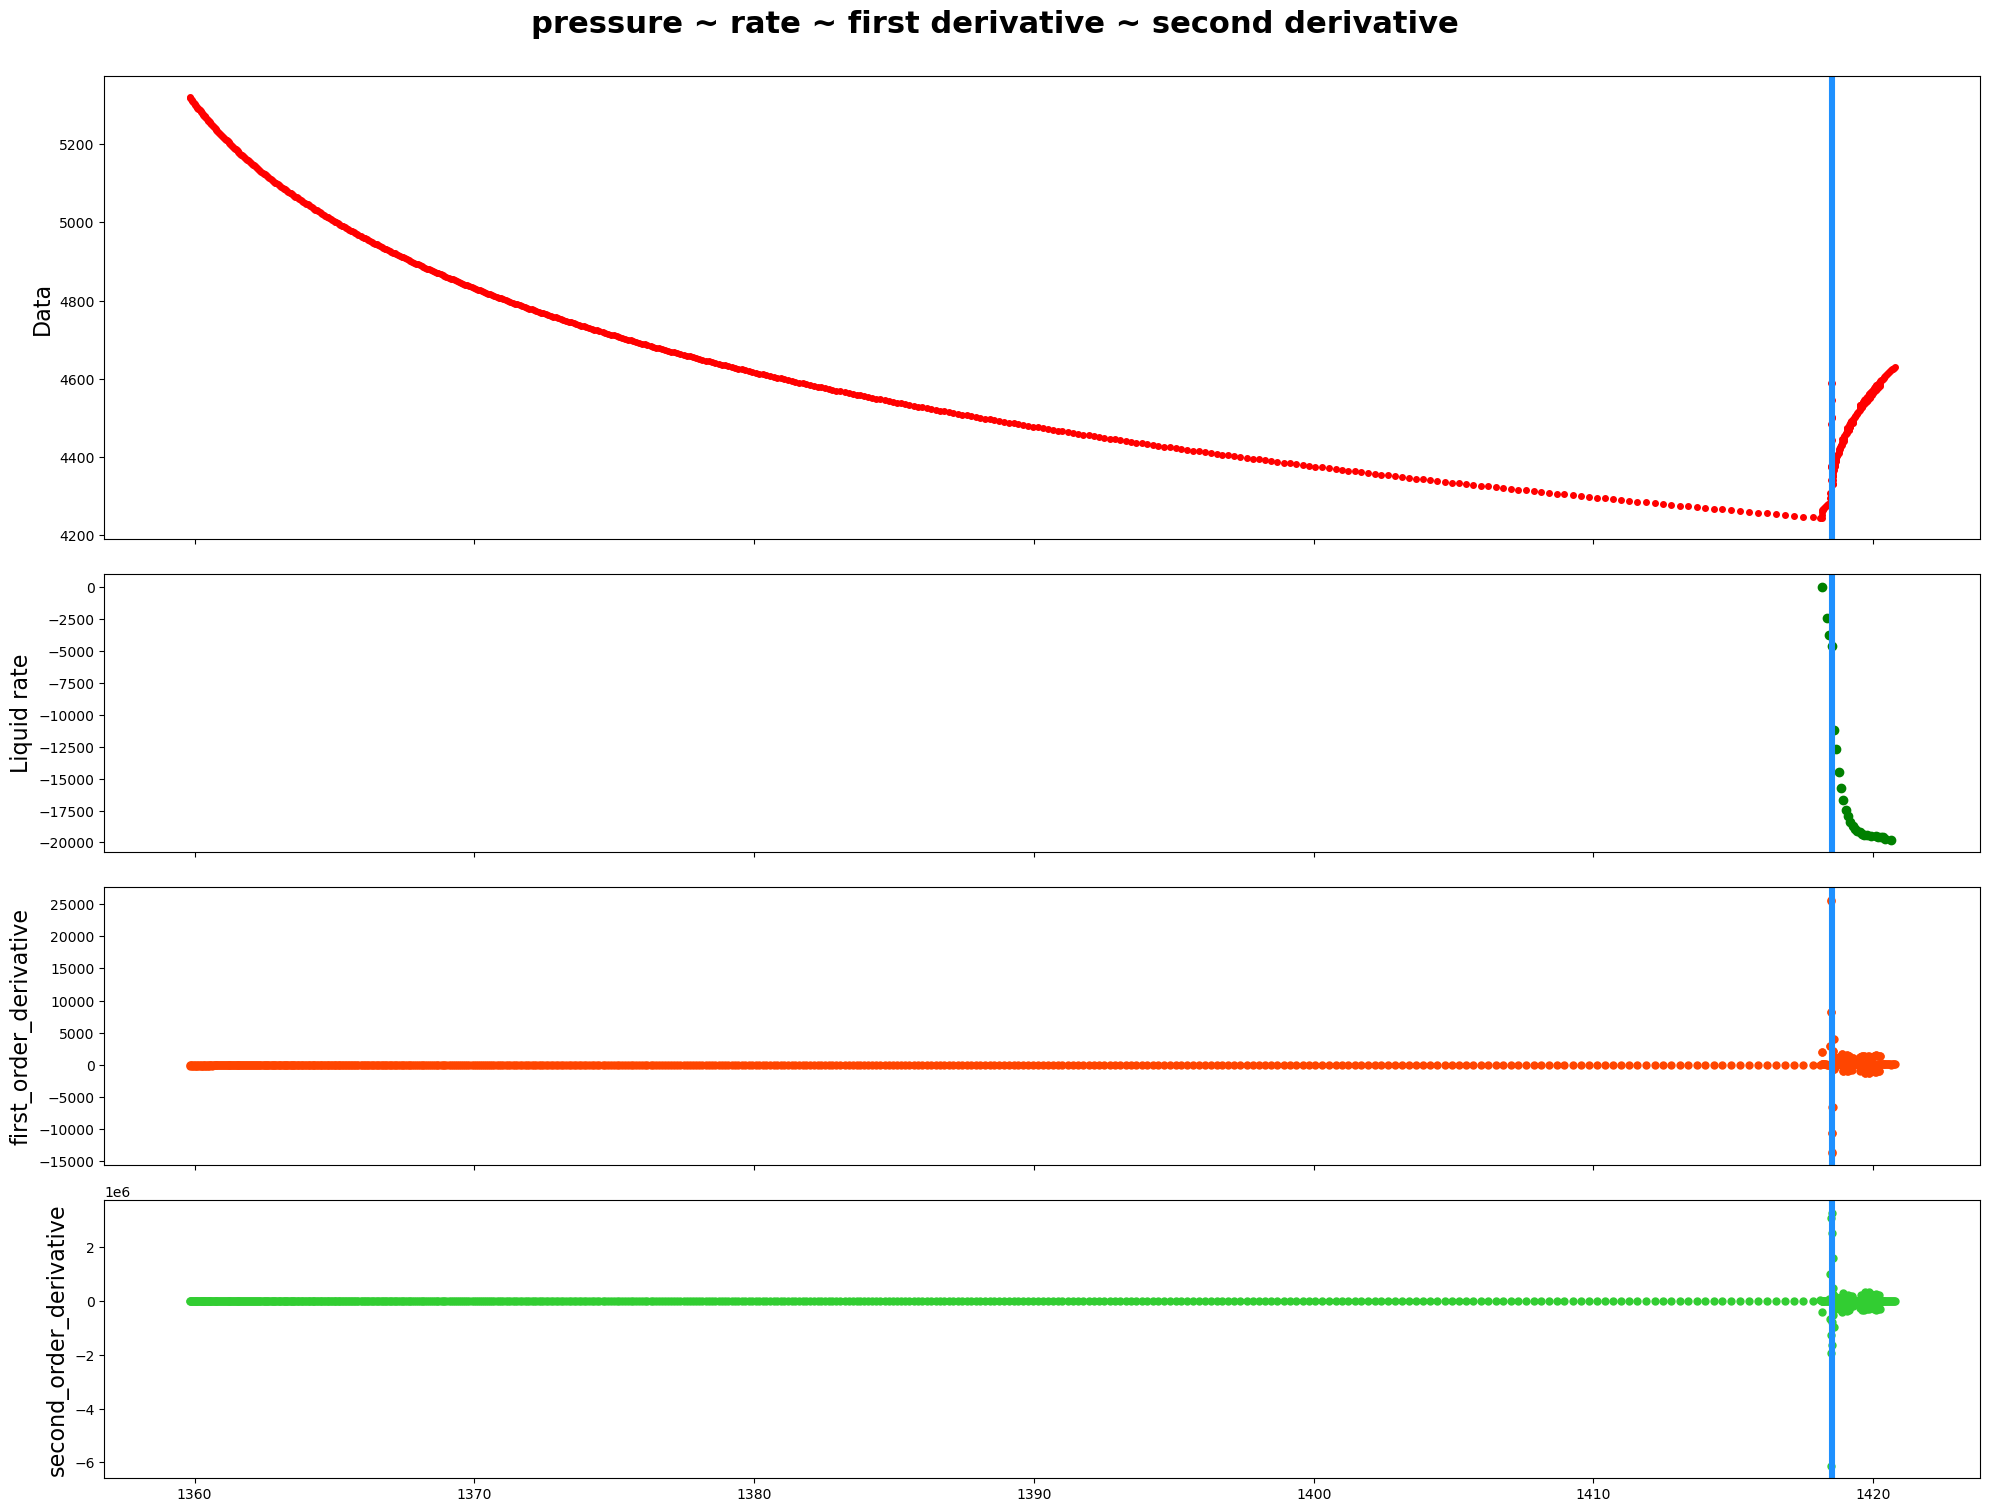

------row 15-----detected points:[10150, 10151]


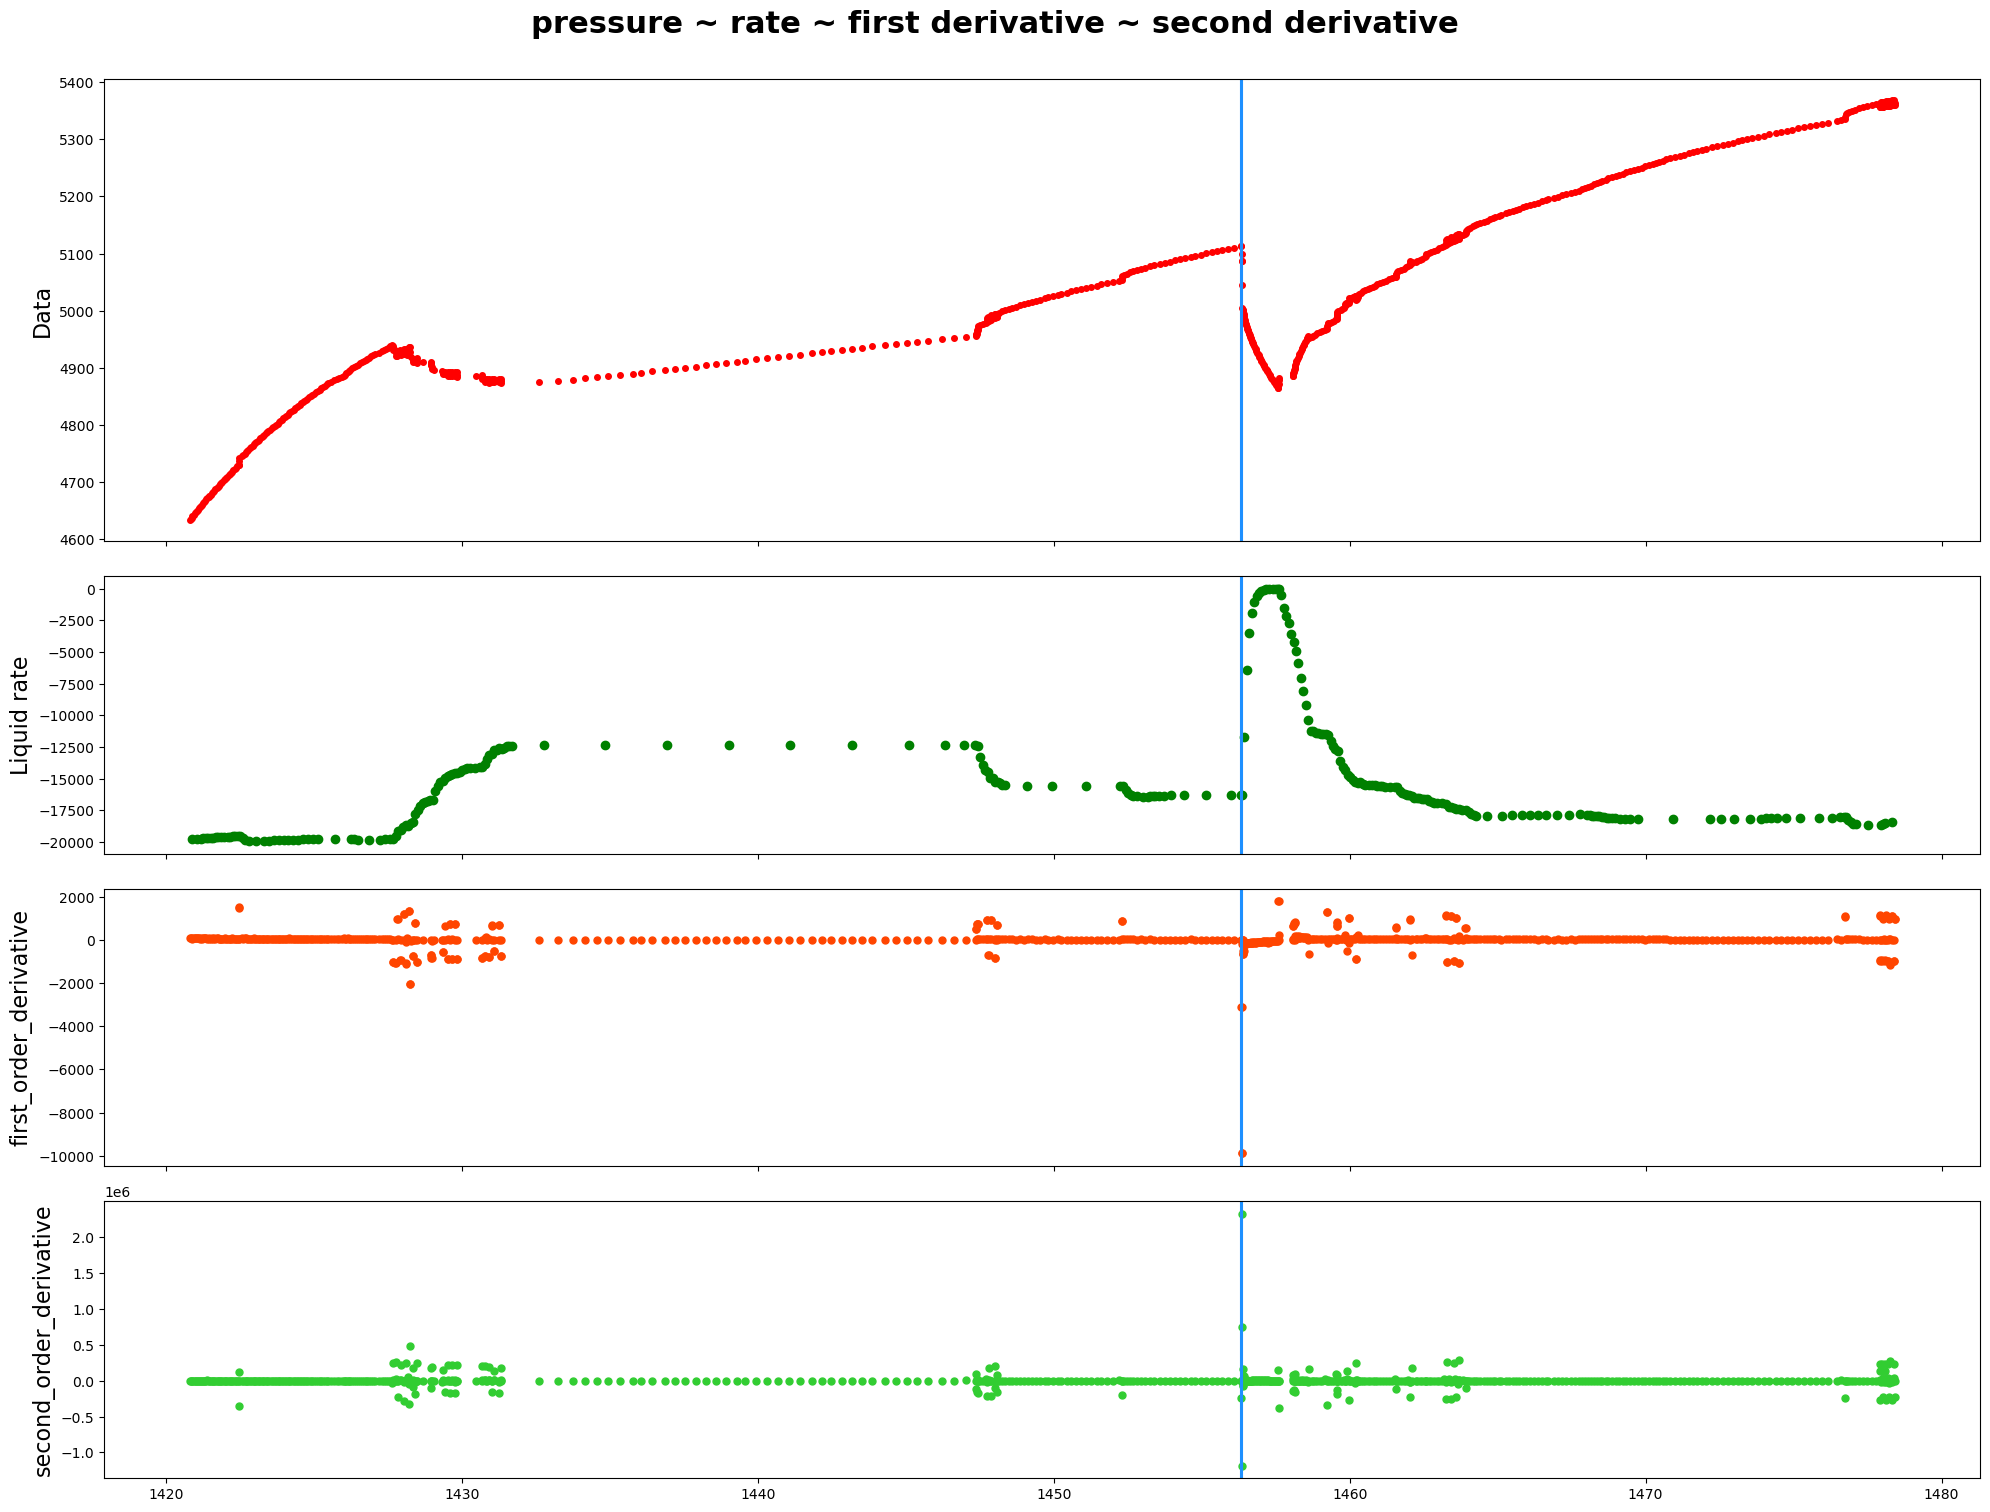

------row 16-----detected points:[]


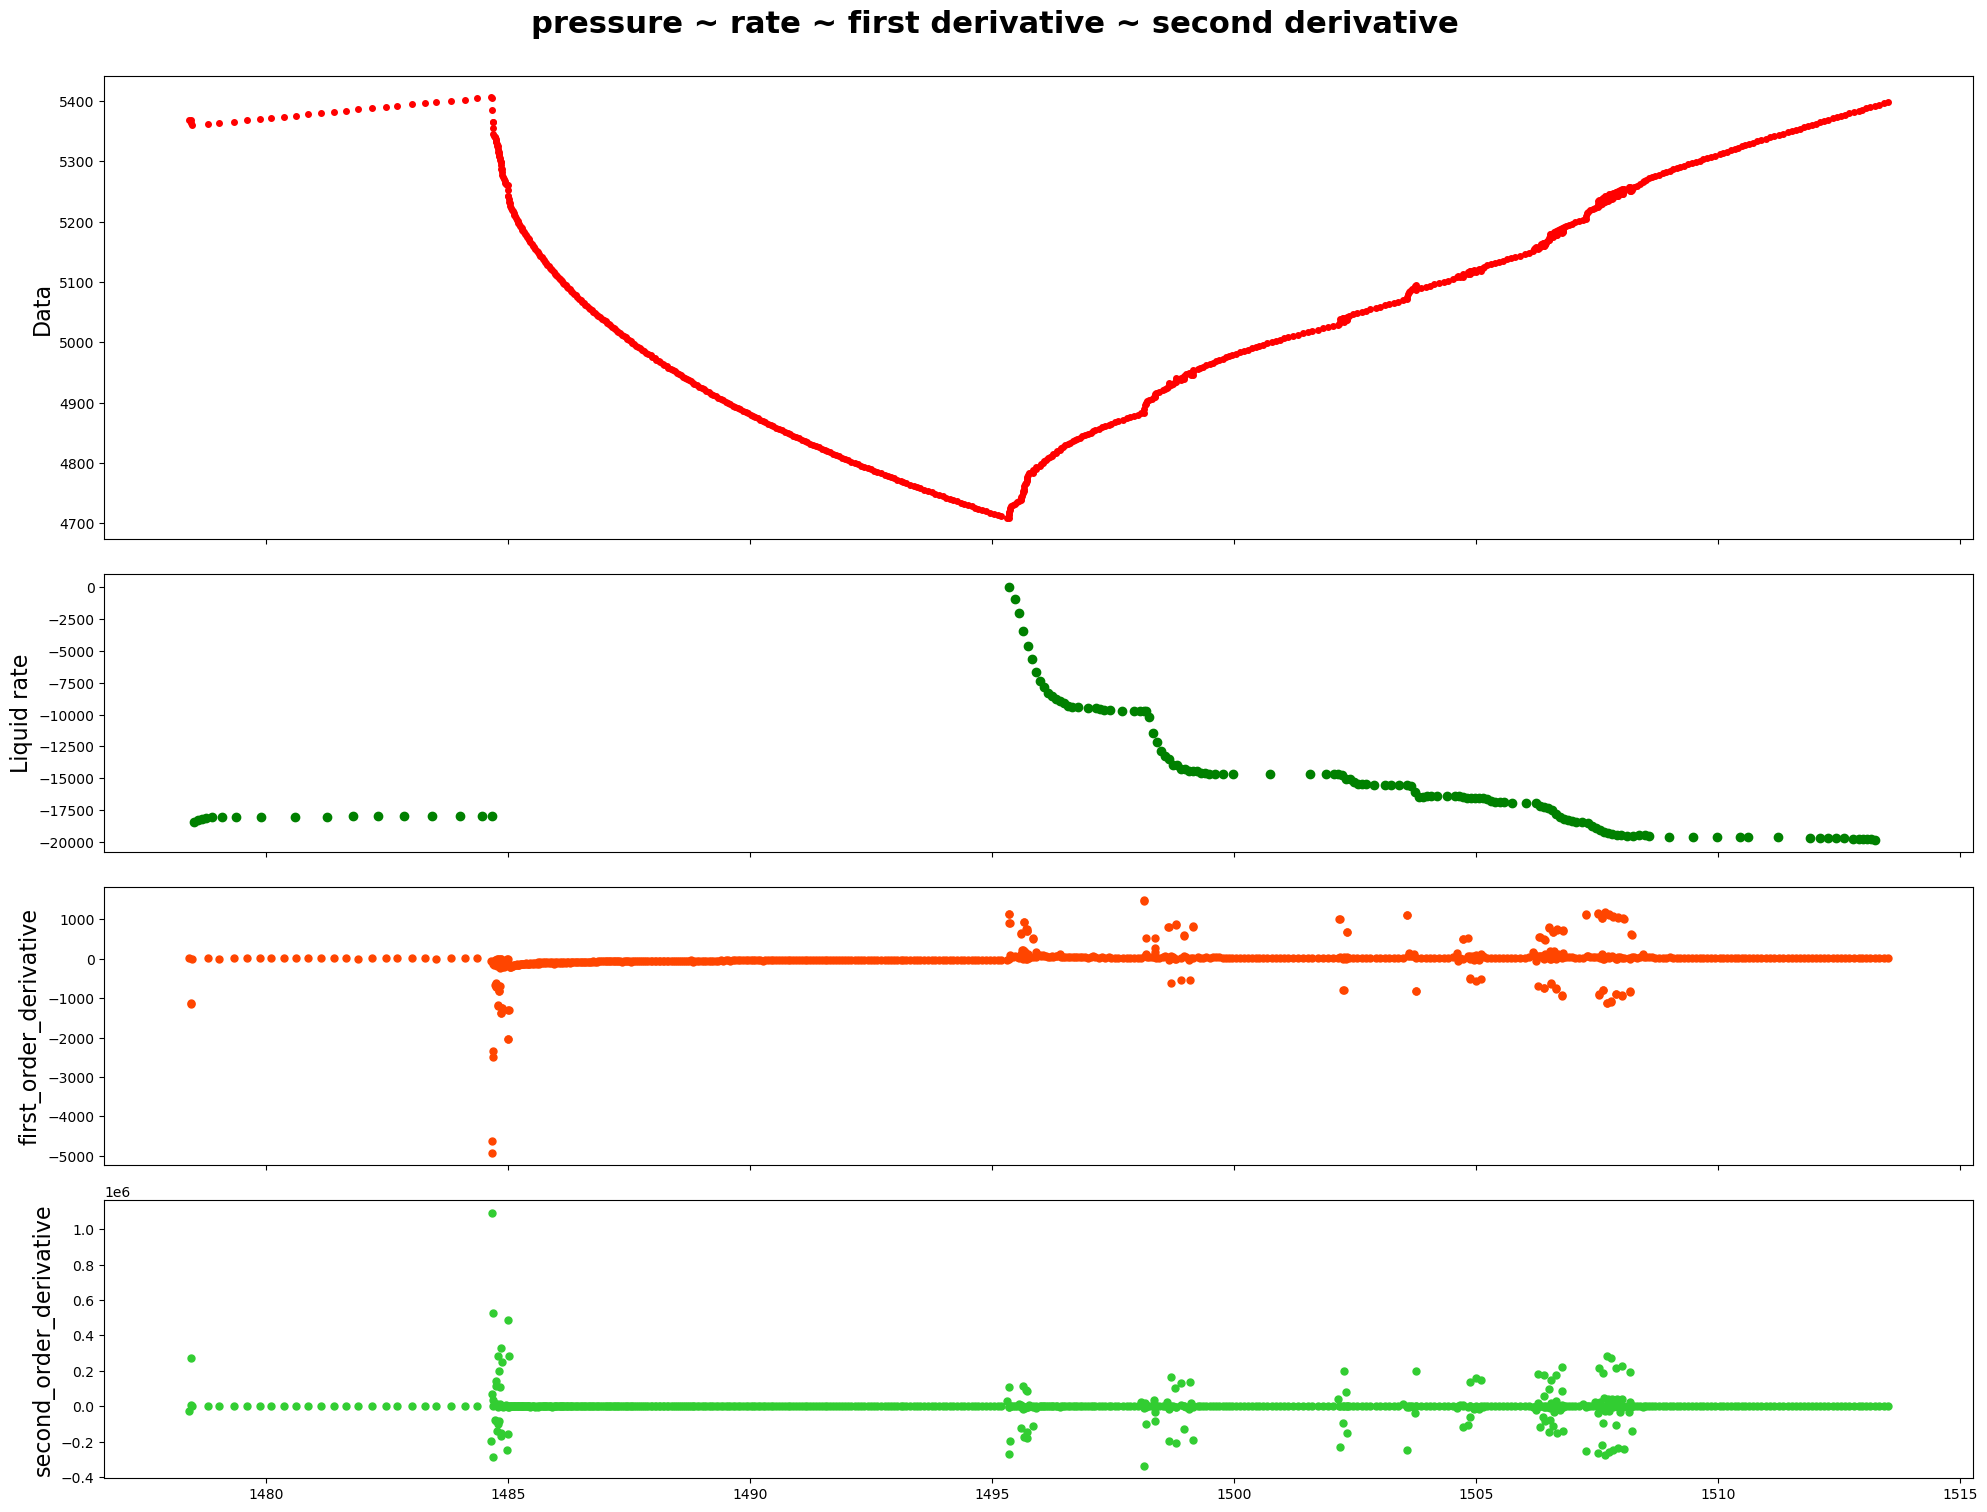

------row 17-----detected points:[11340, 11483, 11484]


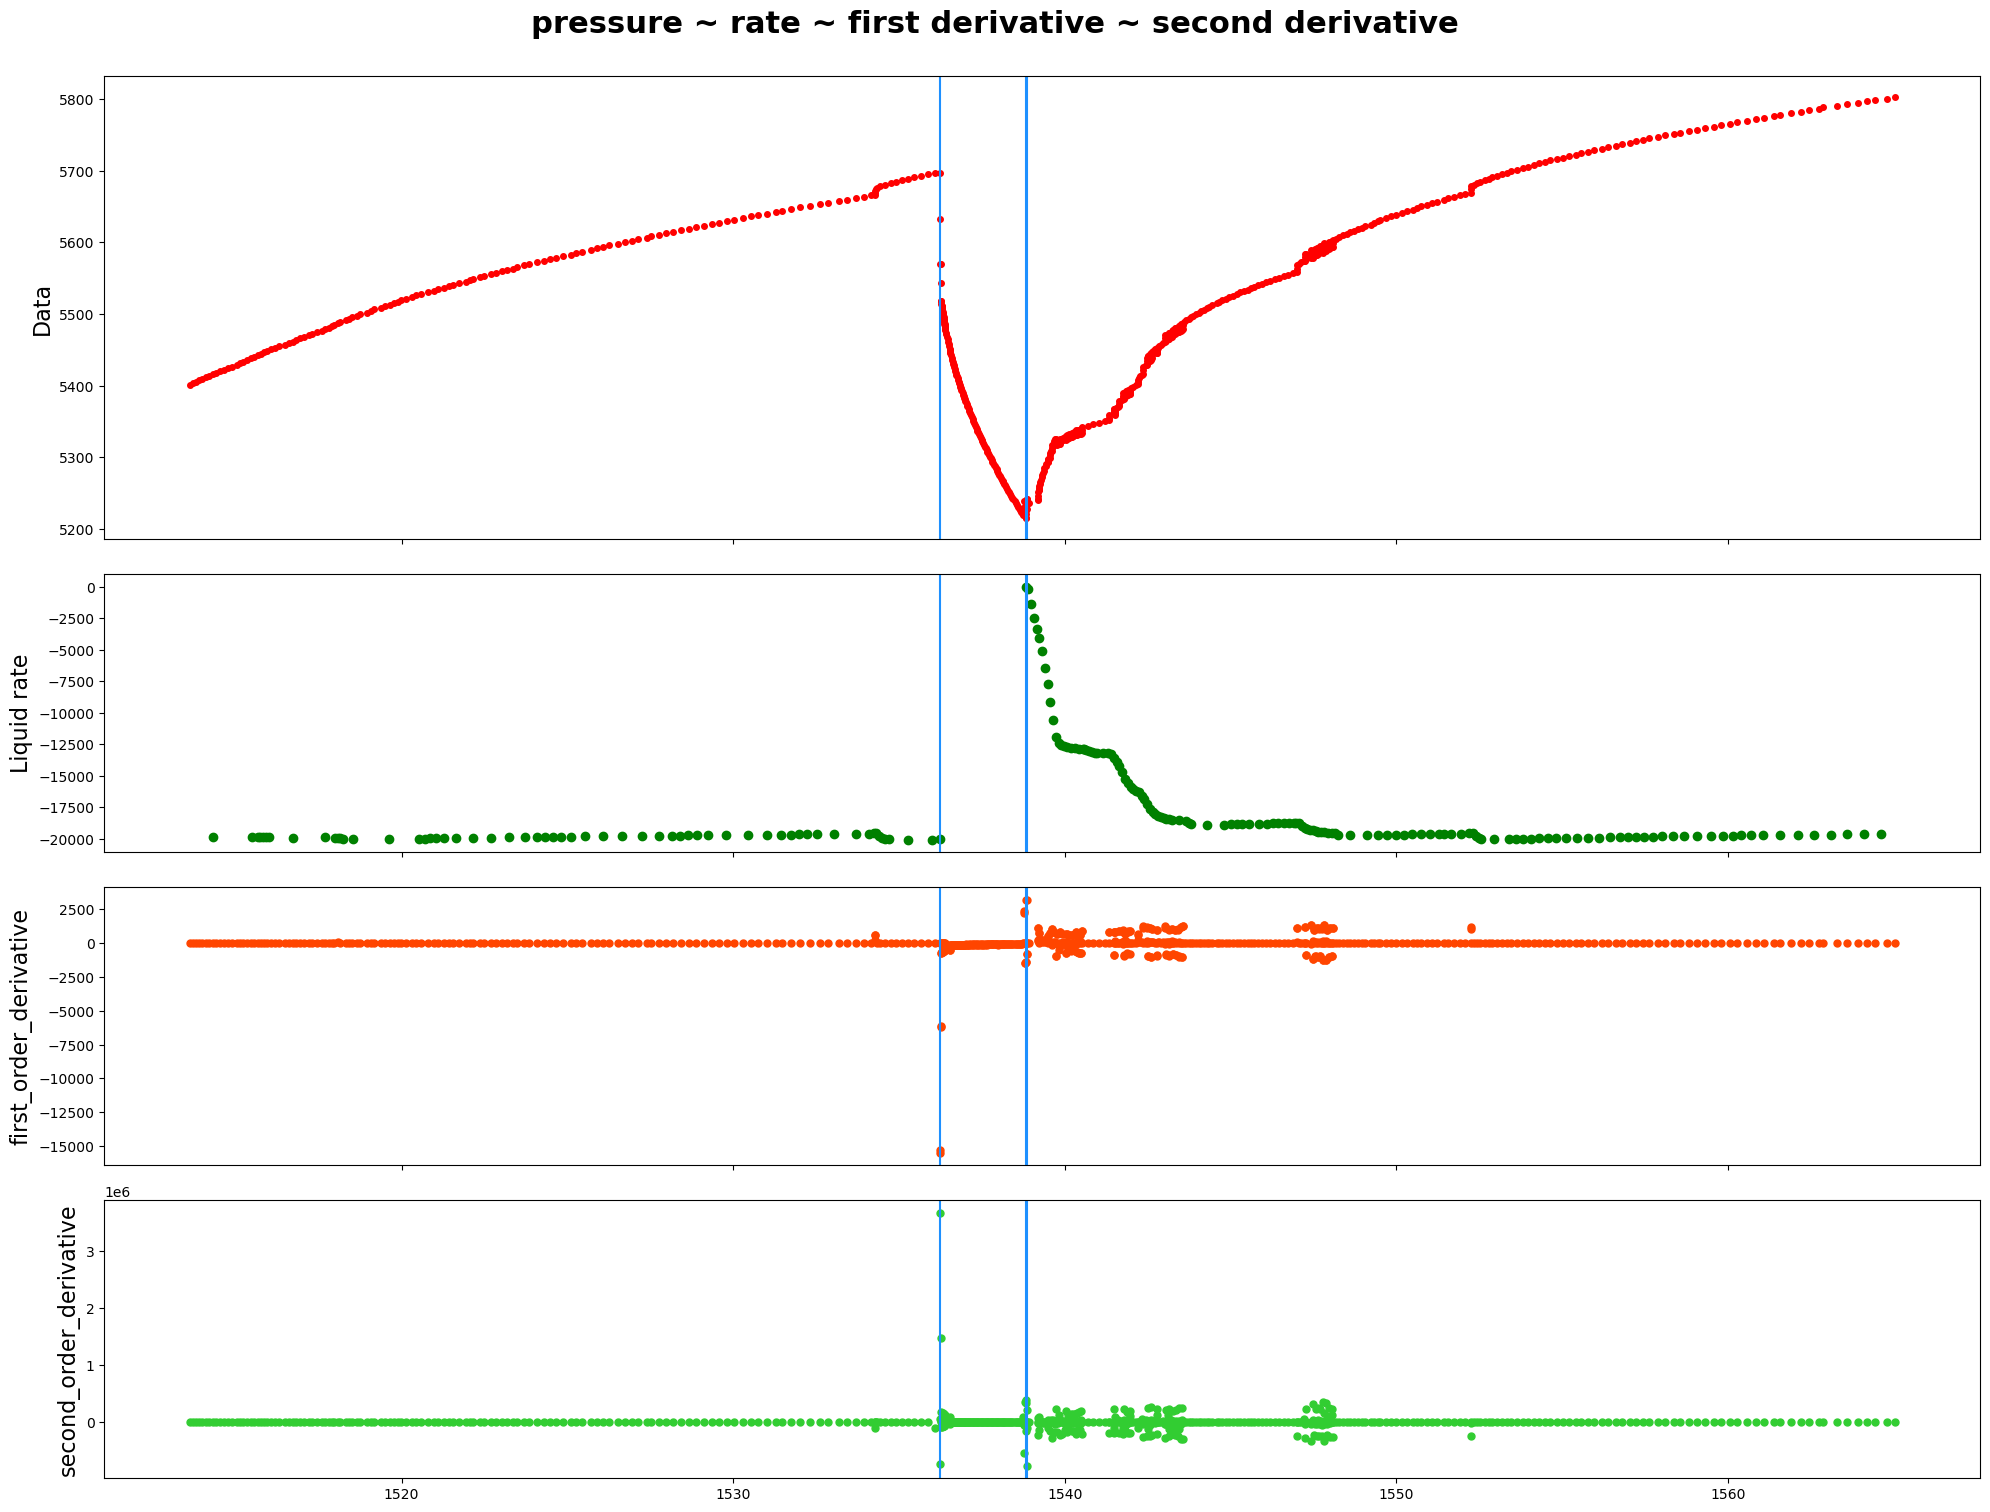

------row 18-----detected points:[12364]


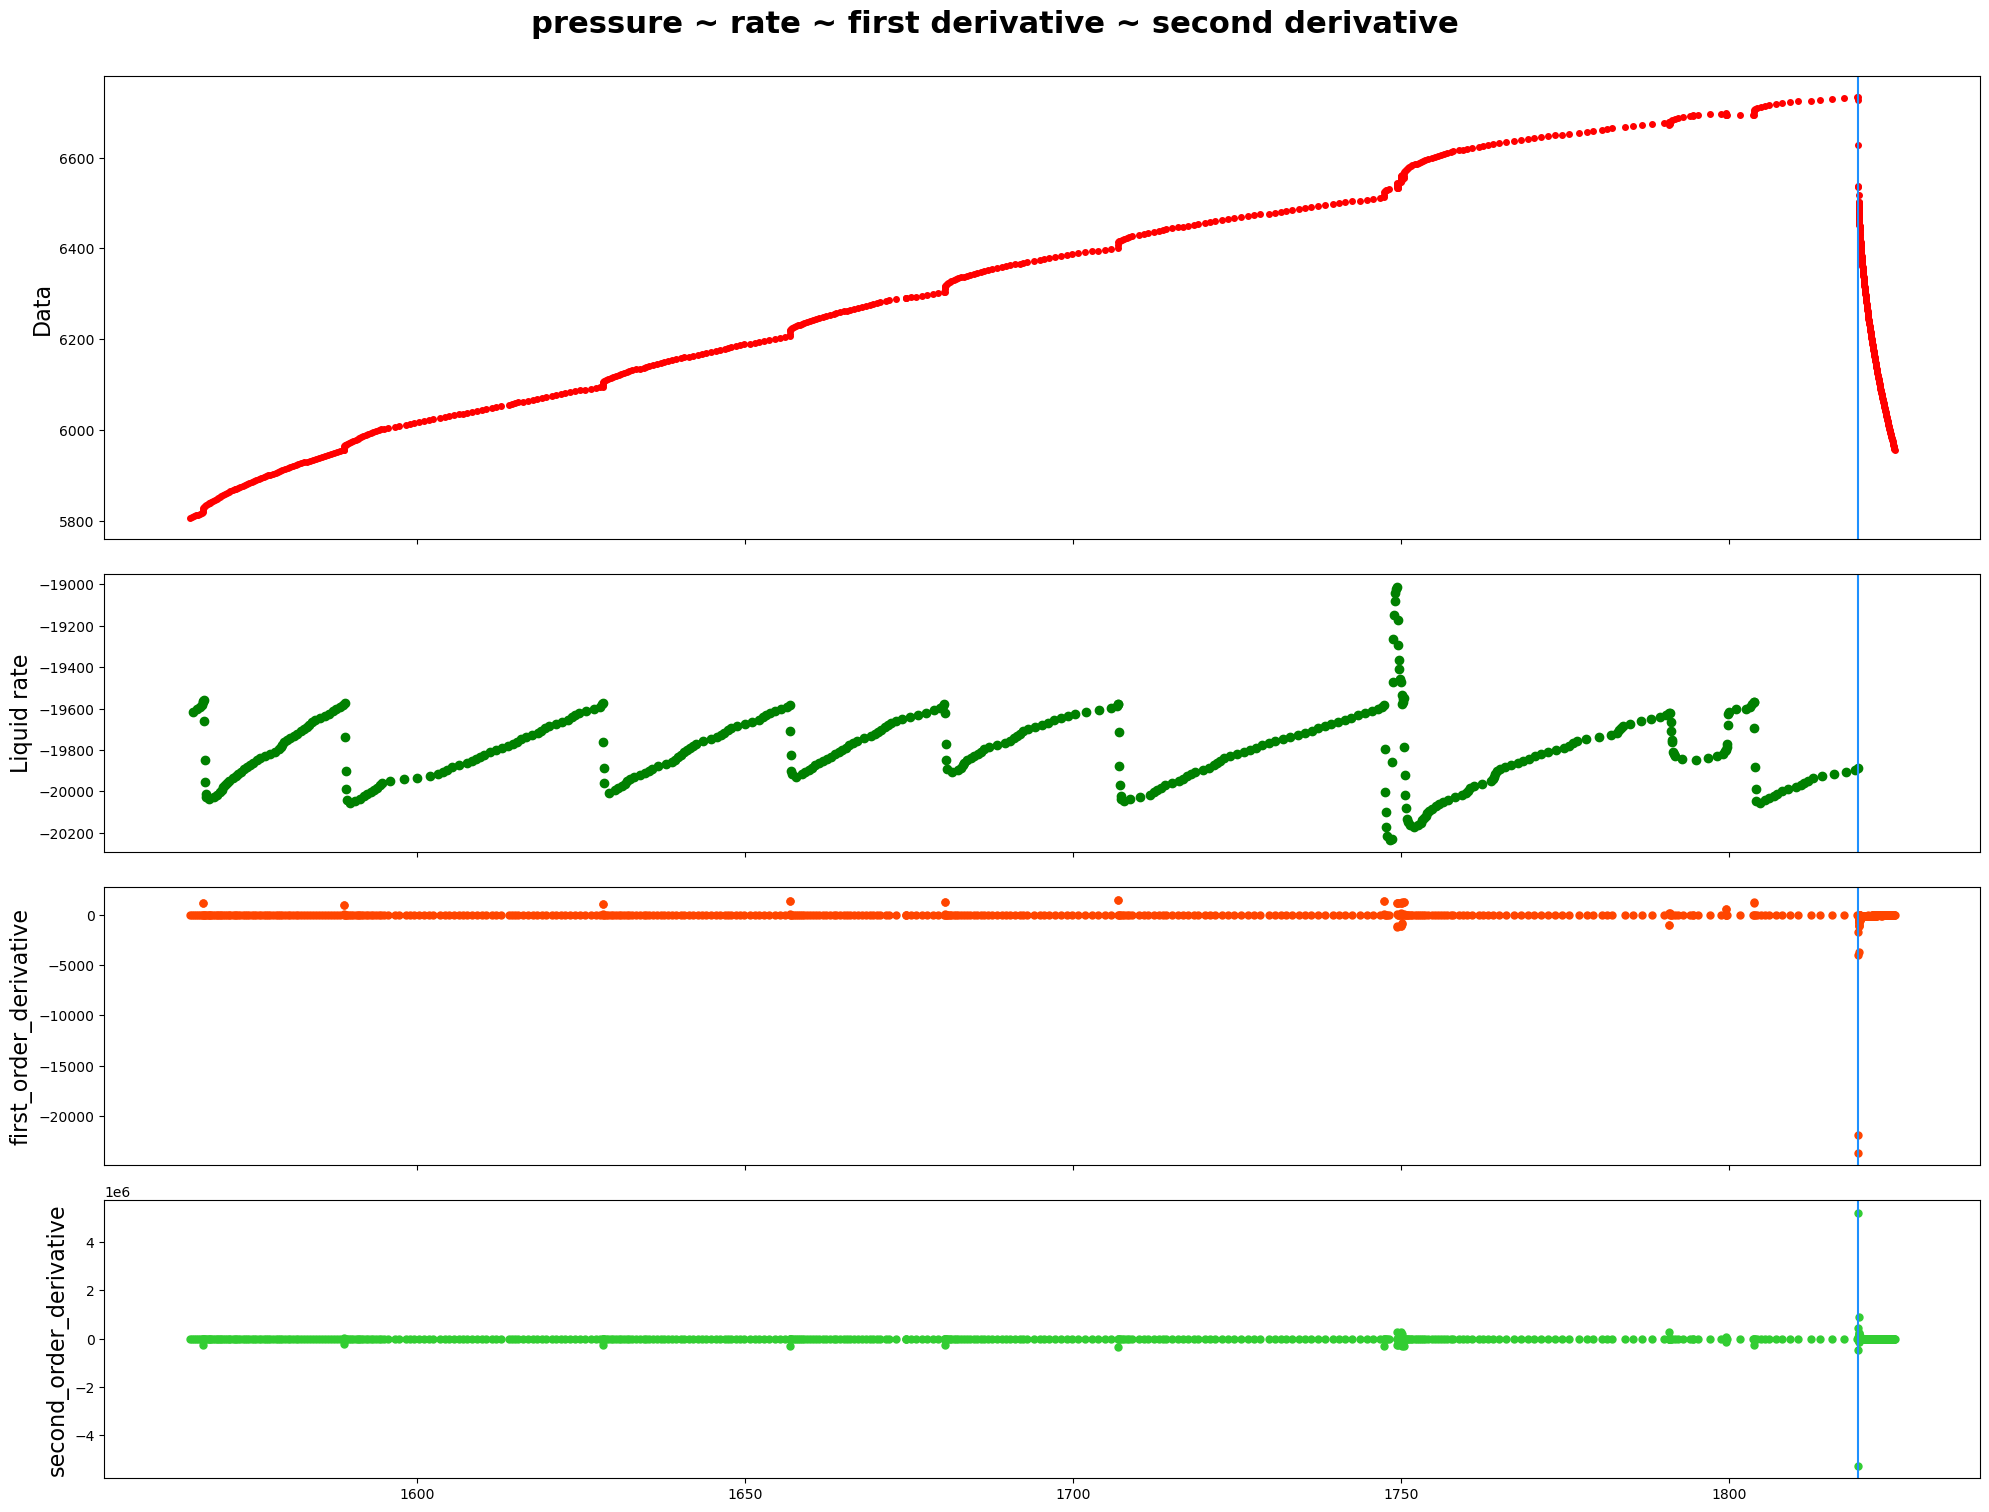

------row 19-----detected points:[13039, 13040]


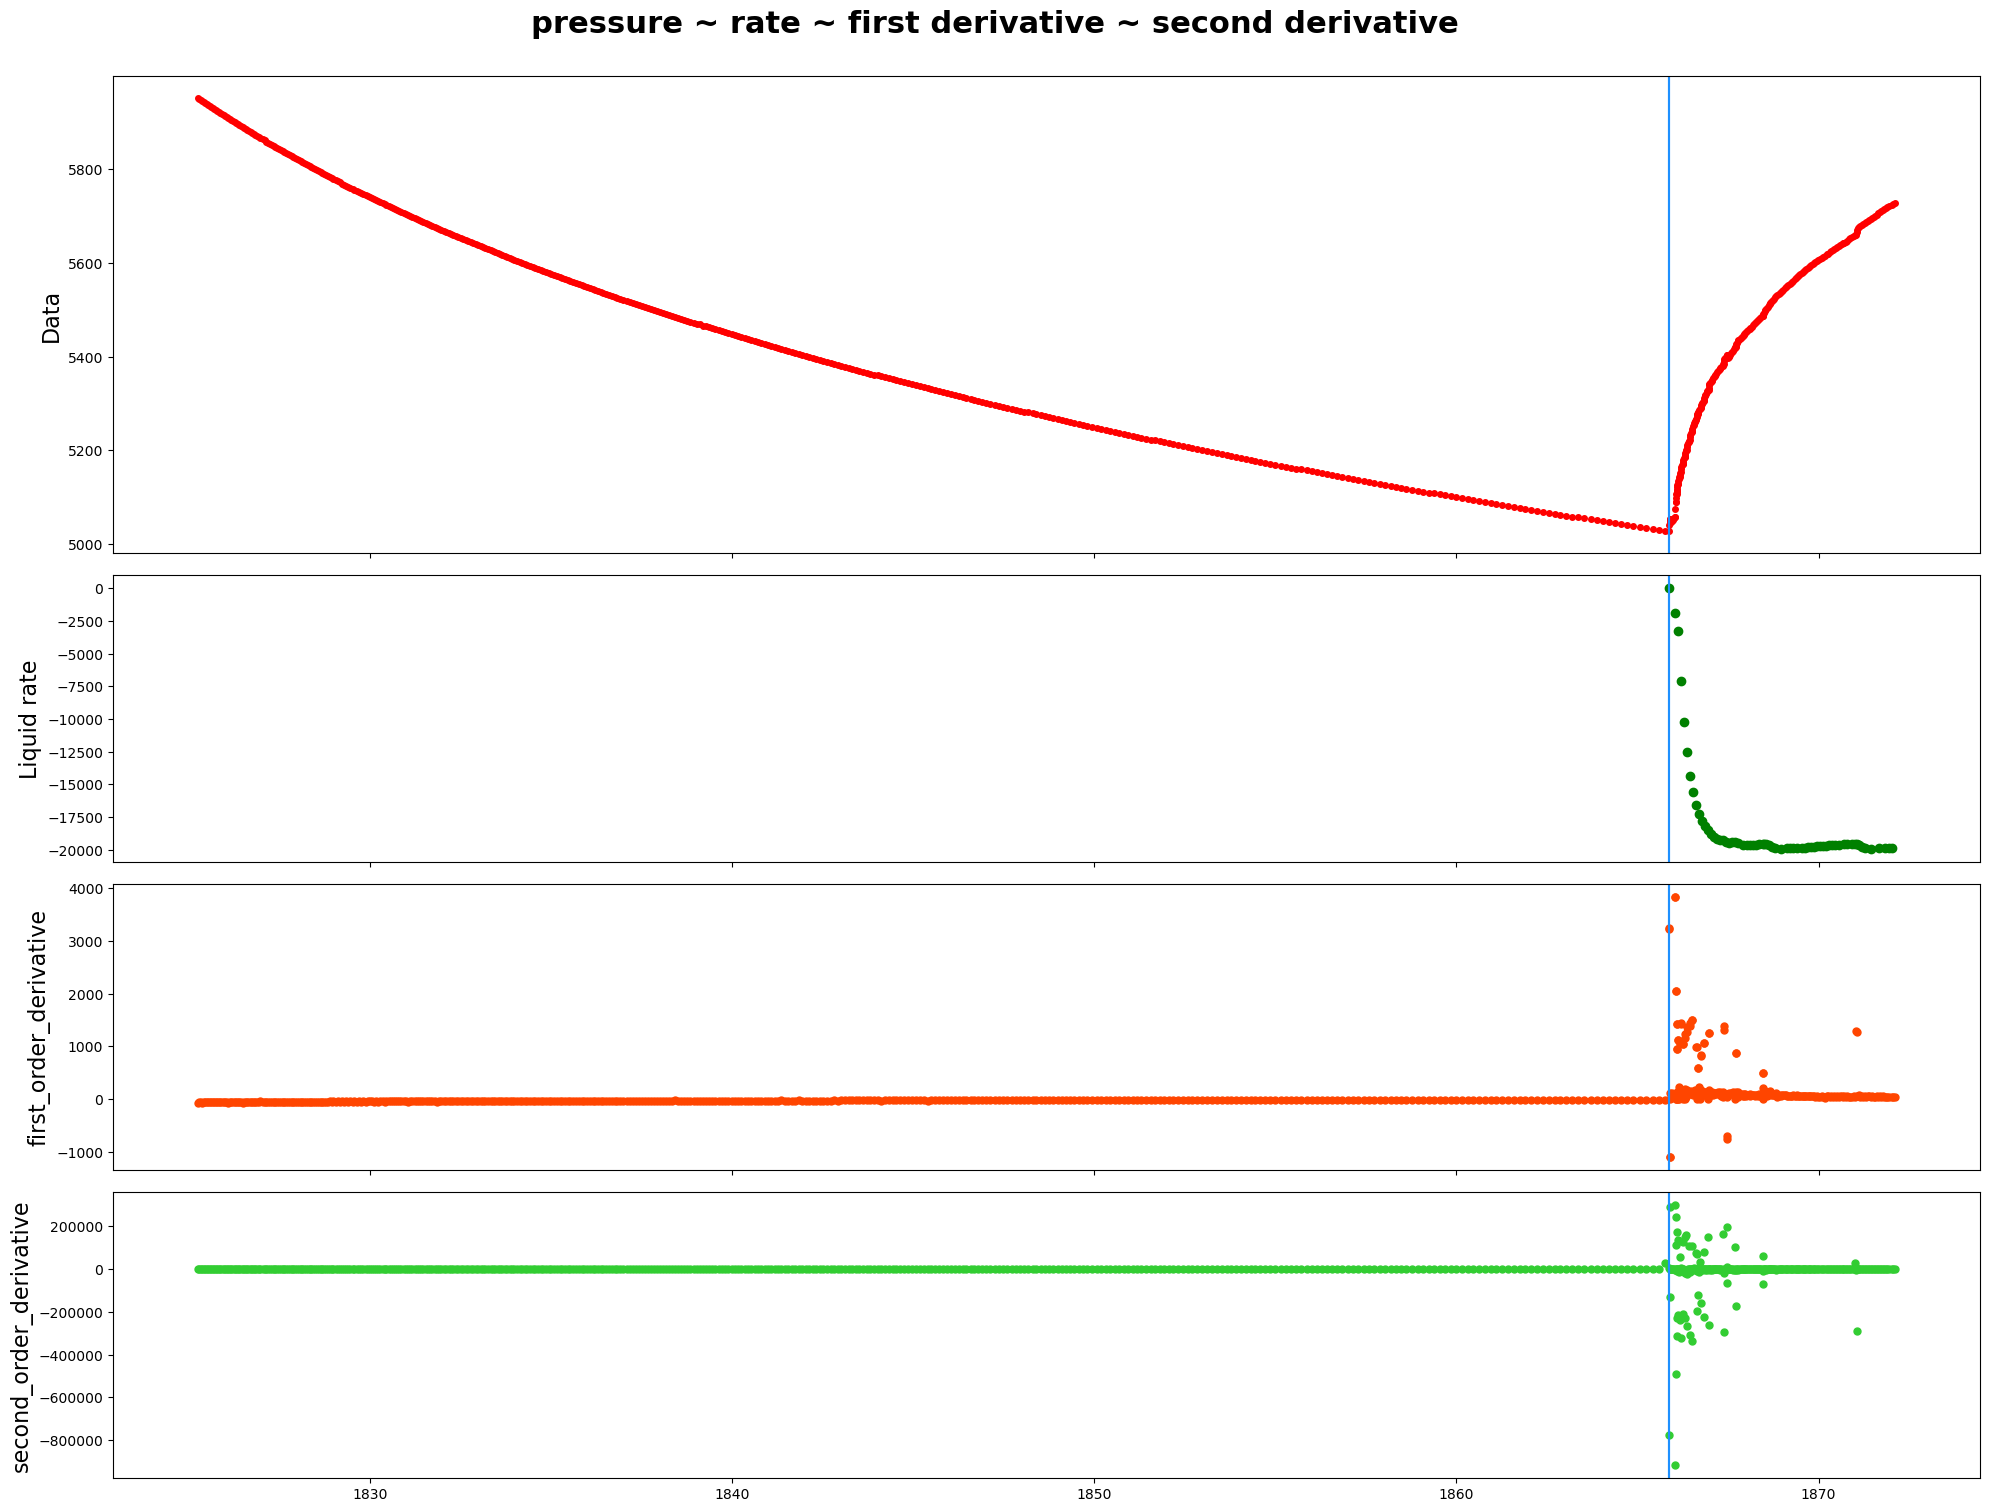

------row 20-----detected points:[13868]


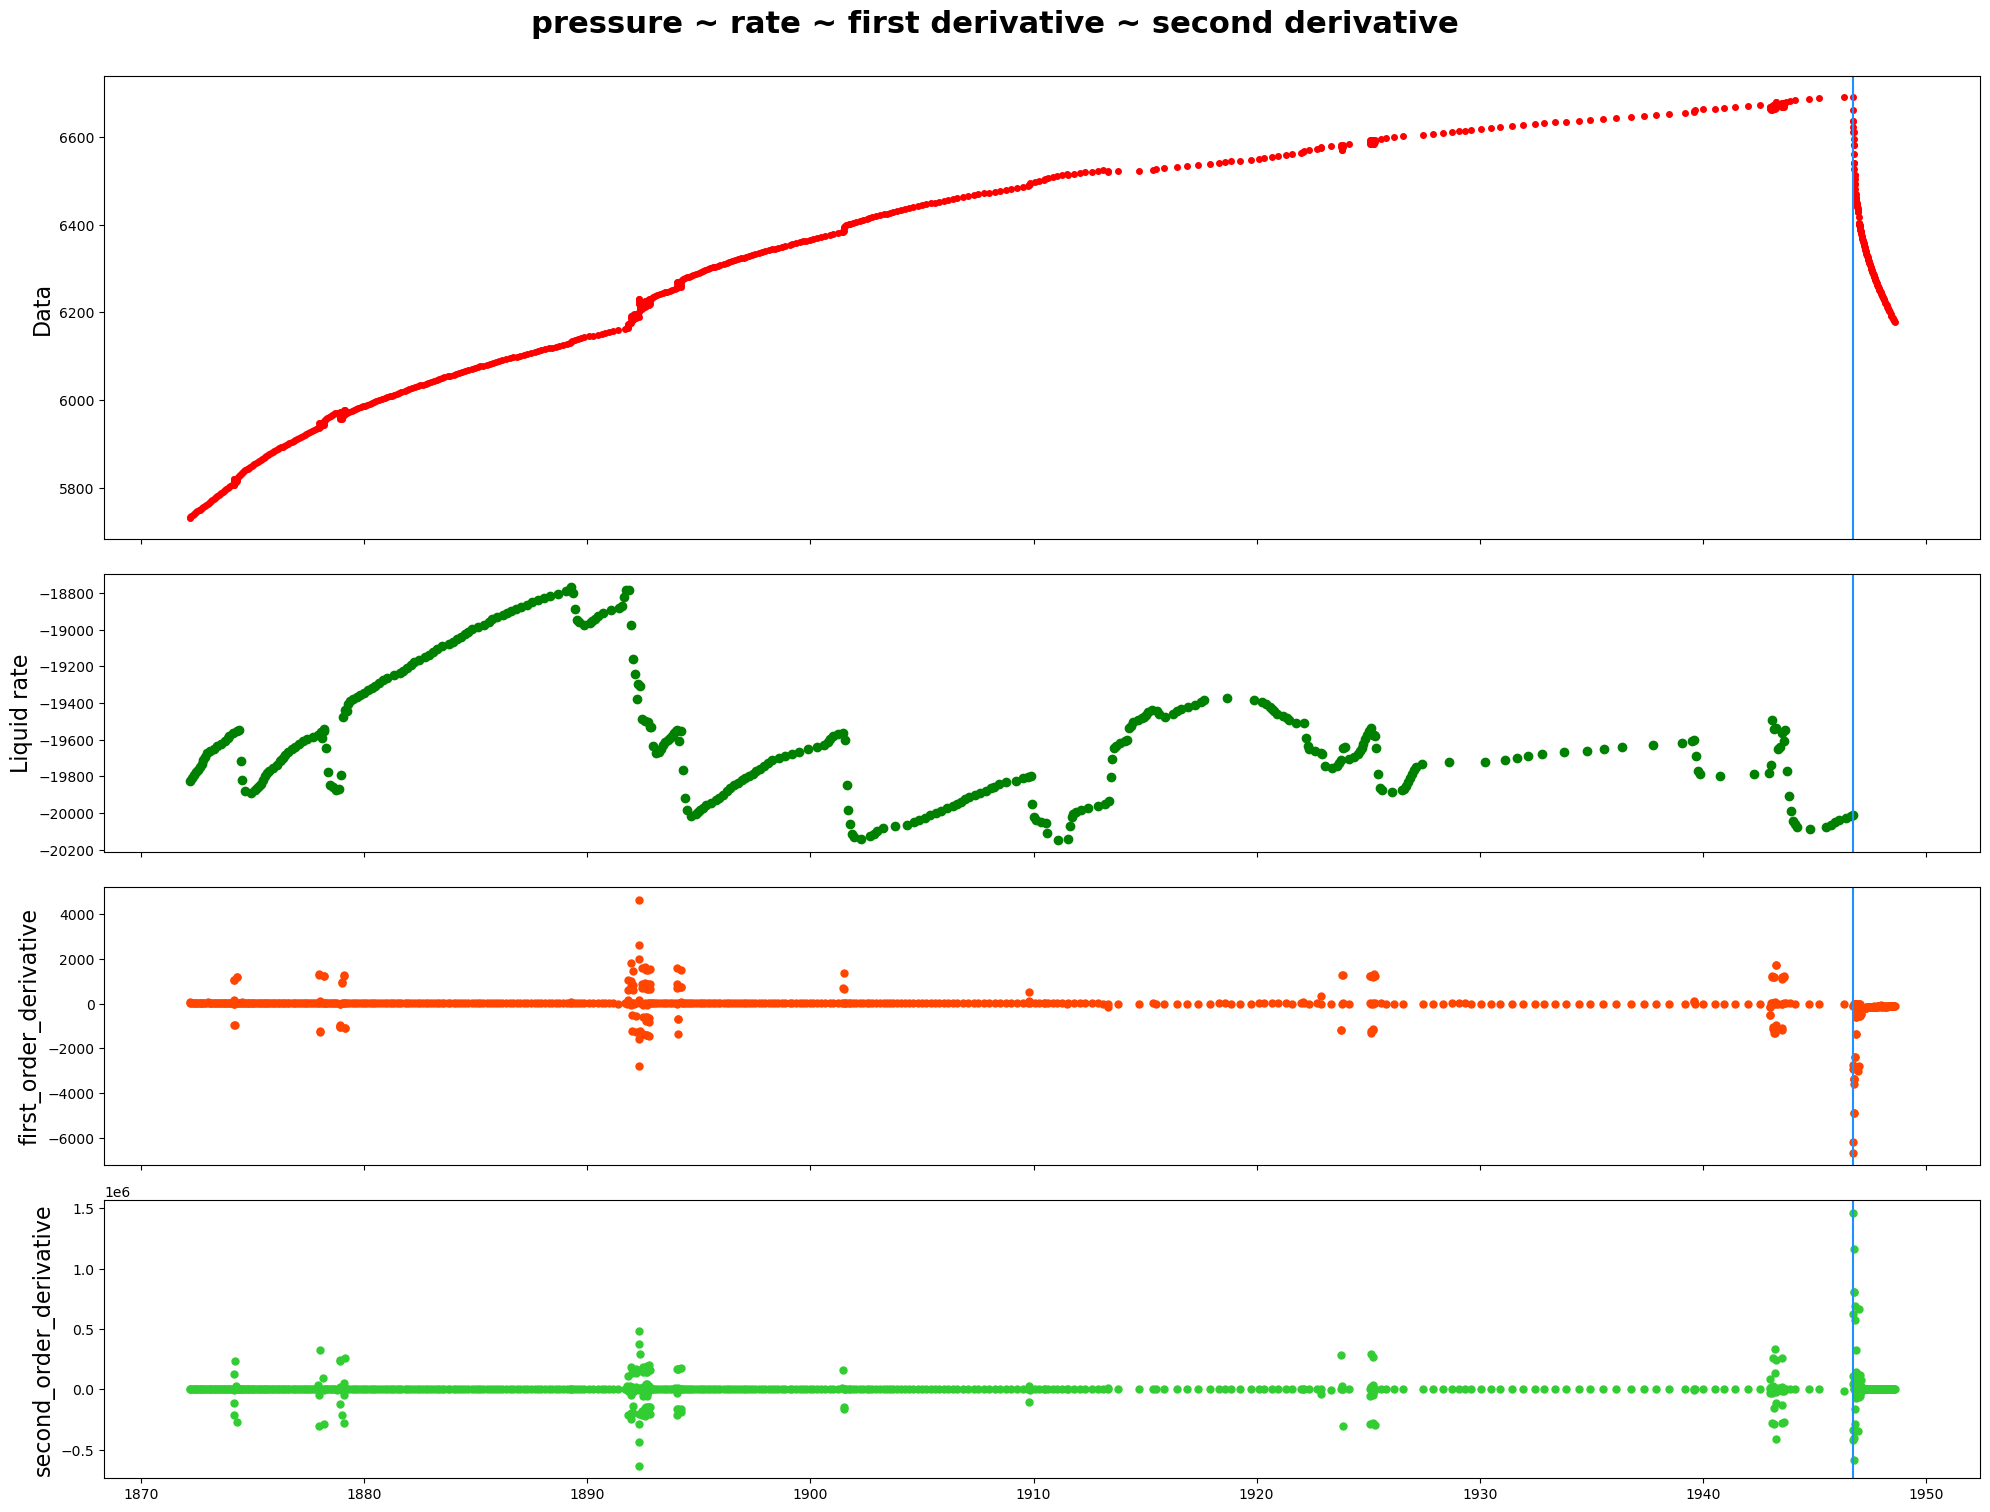

------row 21-----detected points:[]


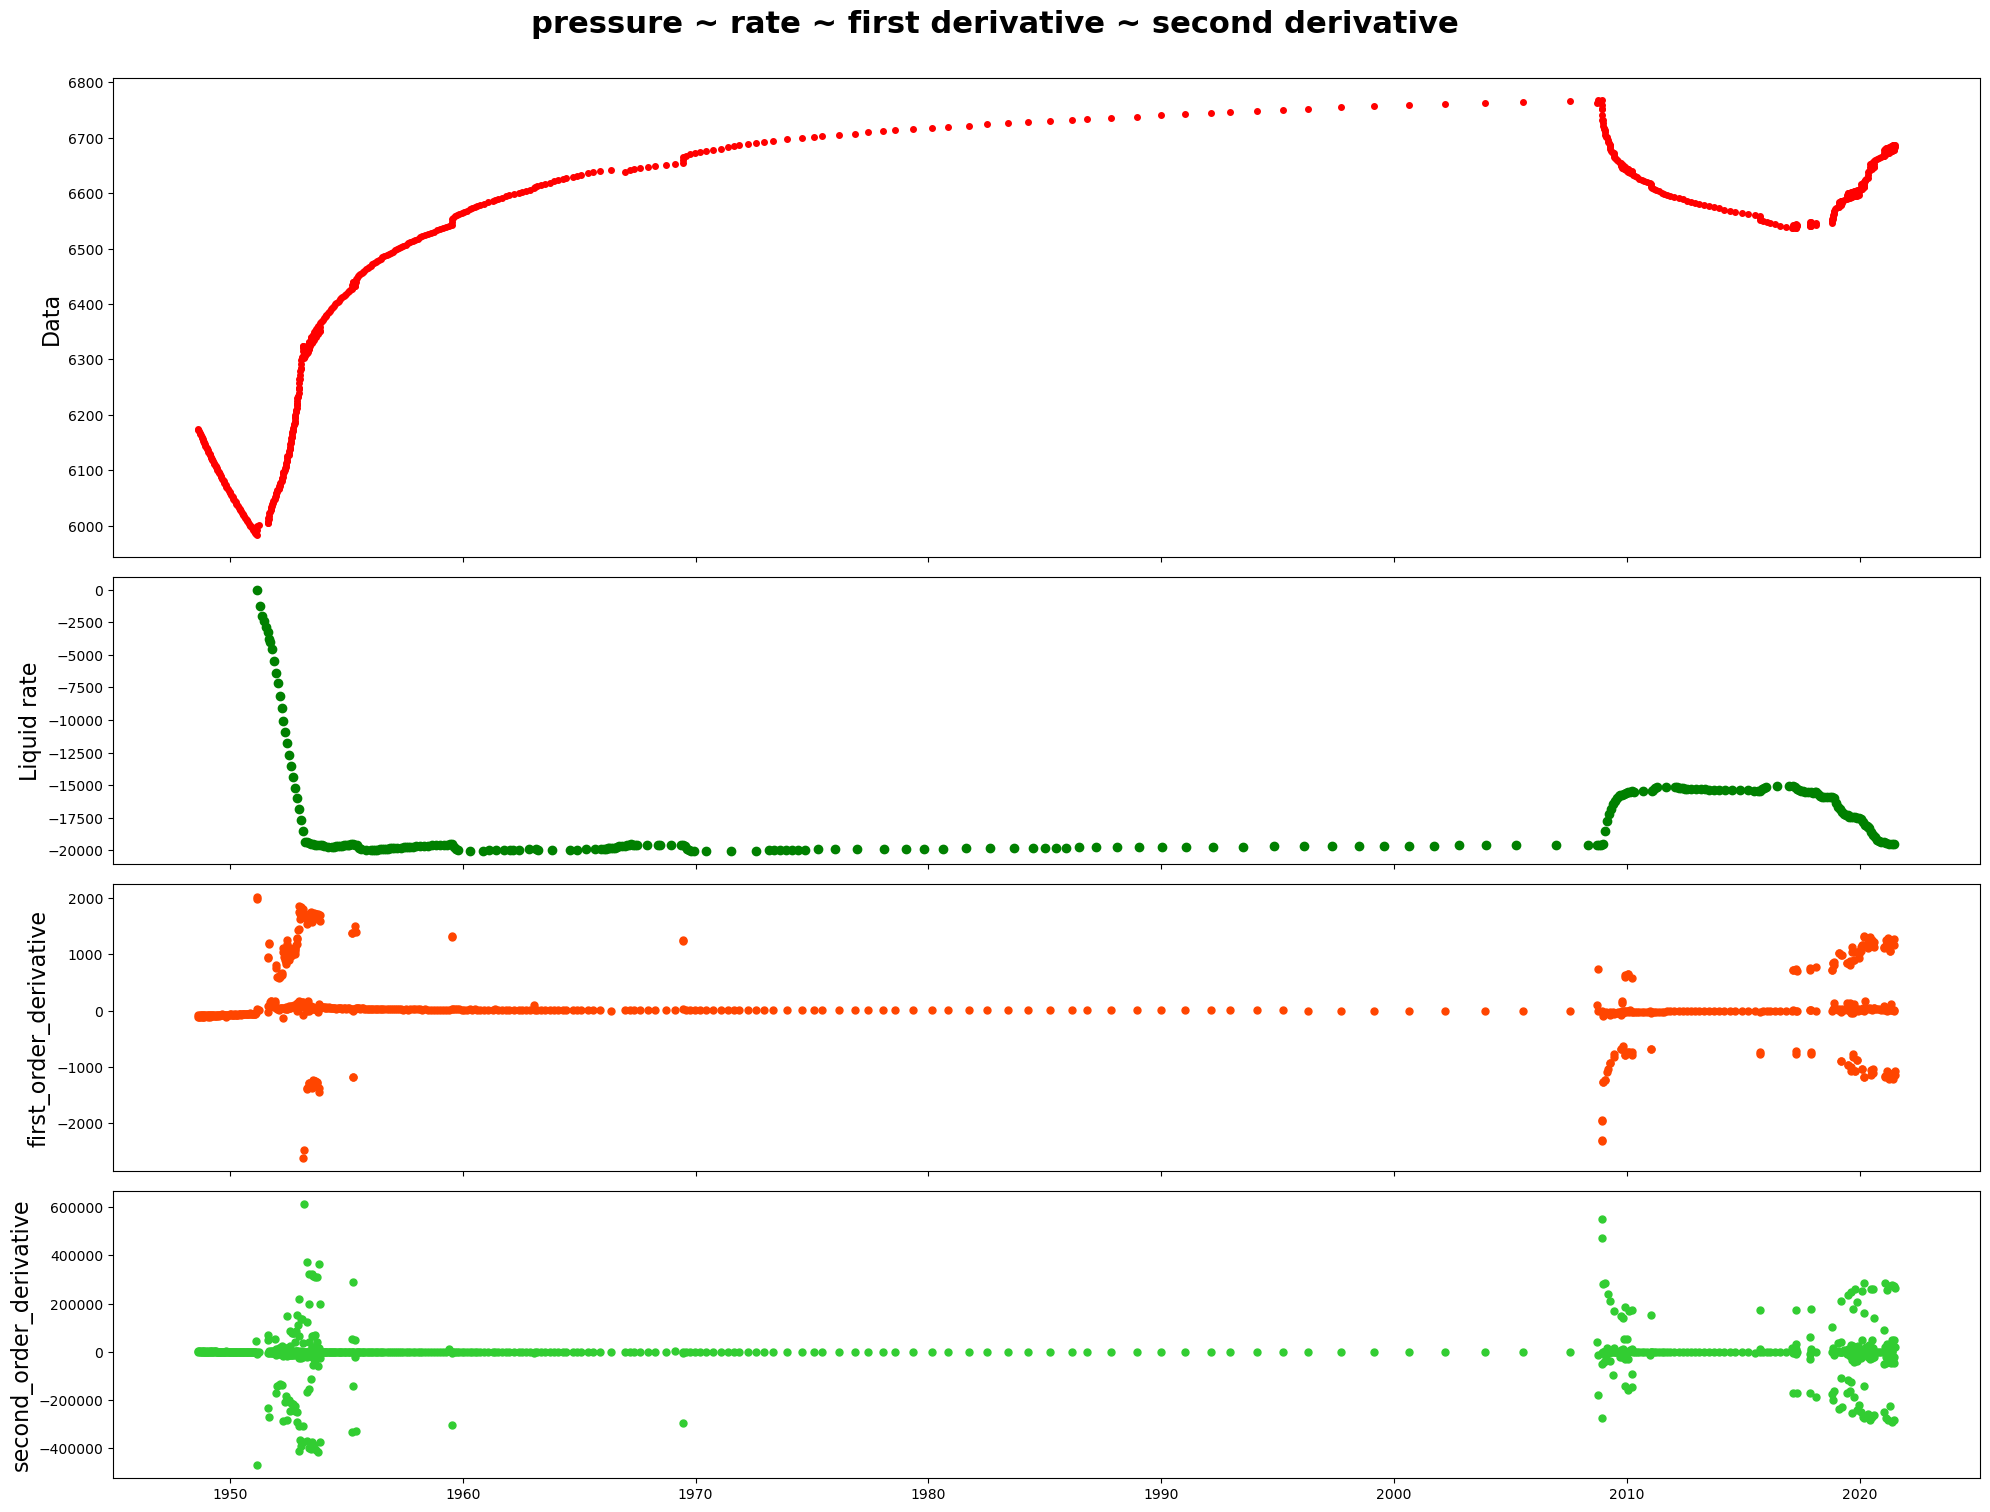

------row 22-----detected points:[]


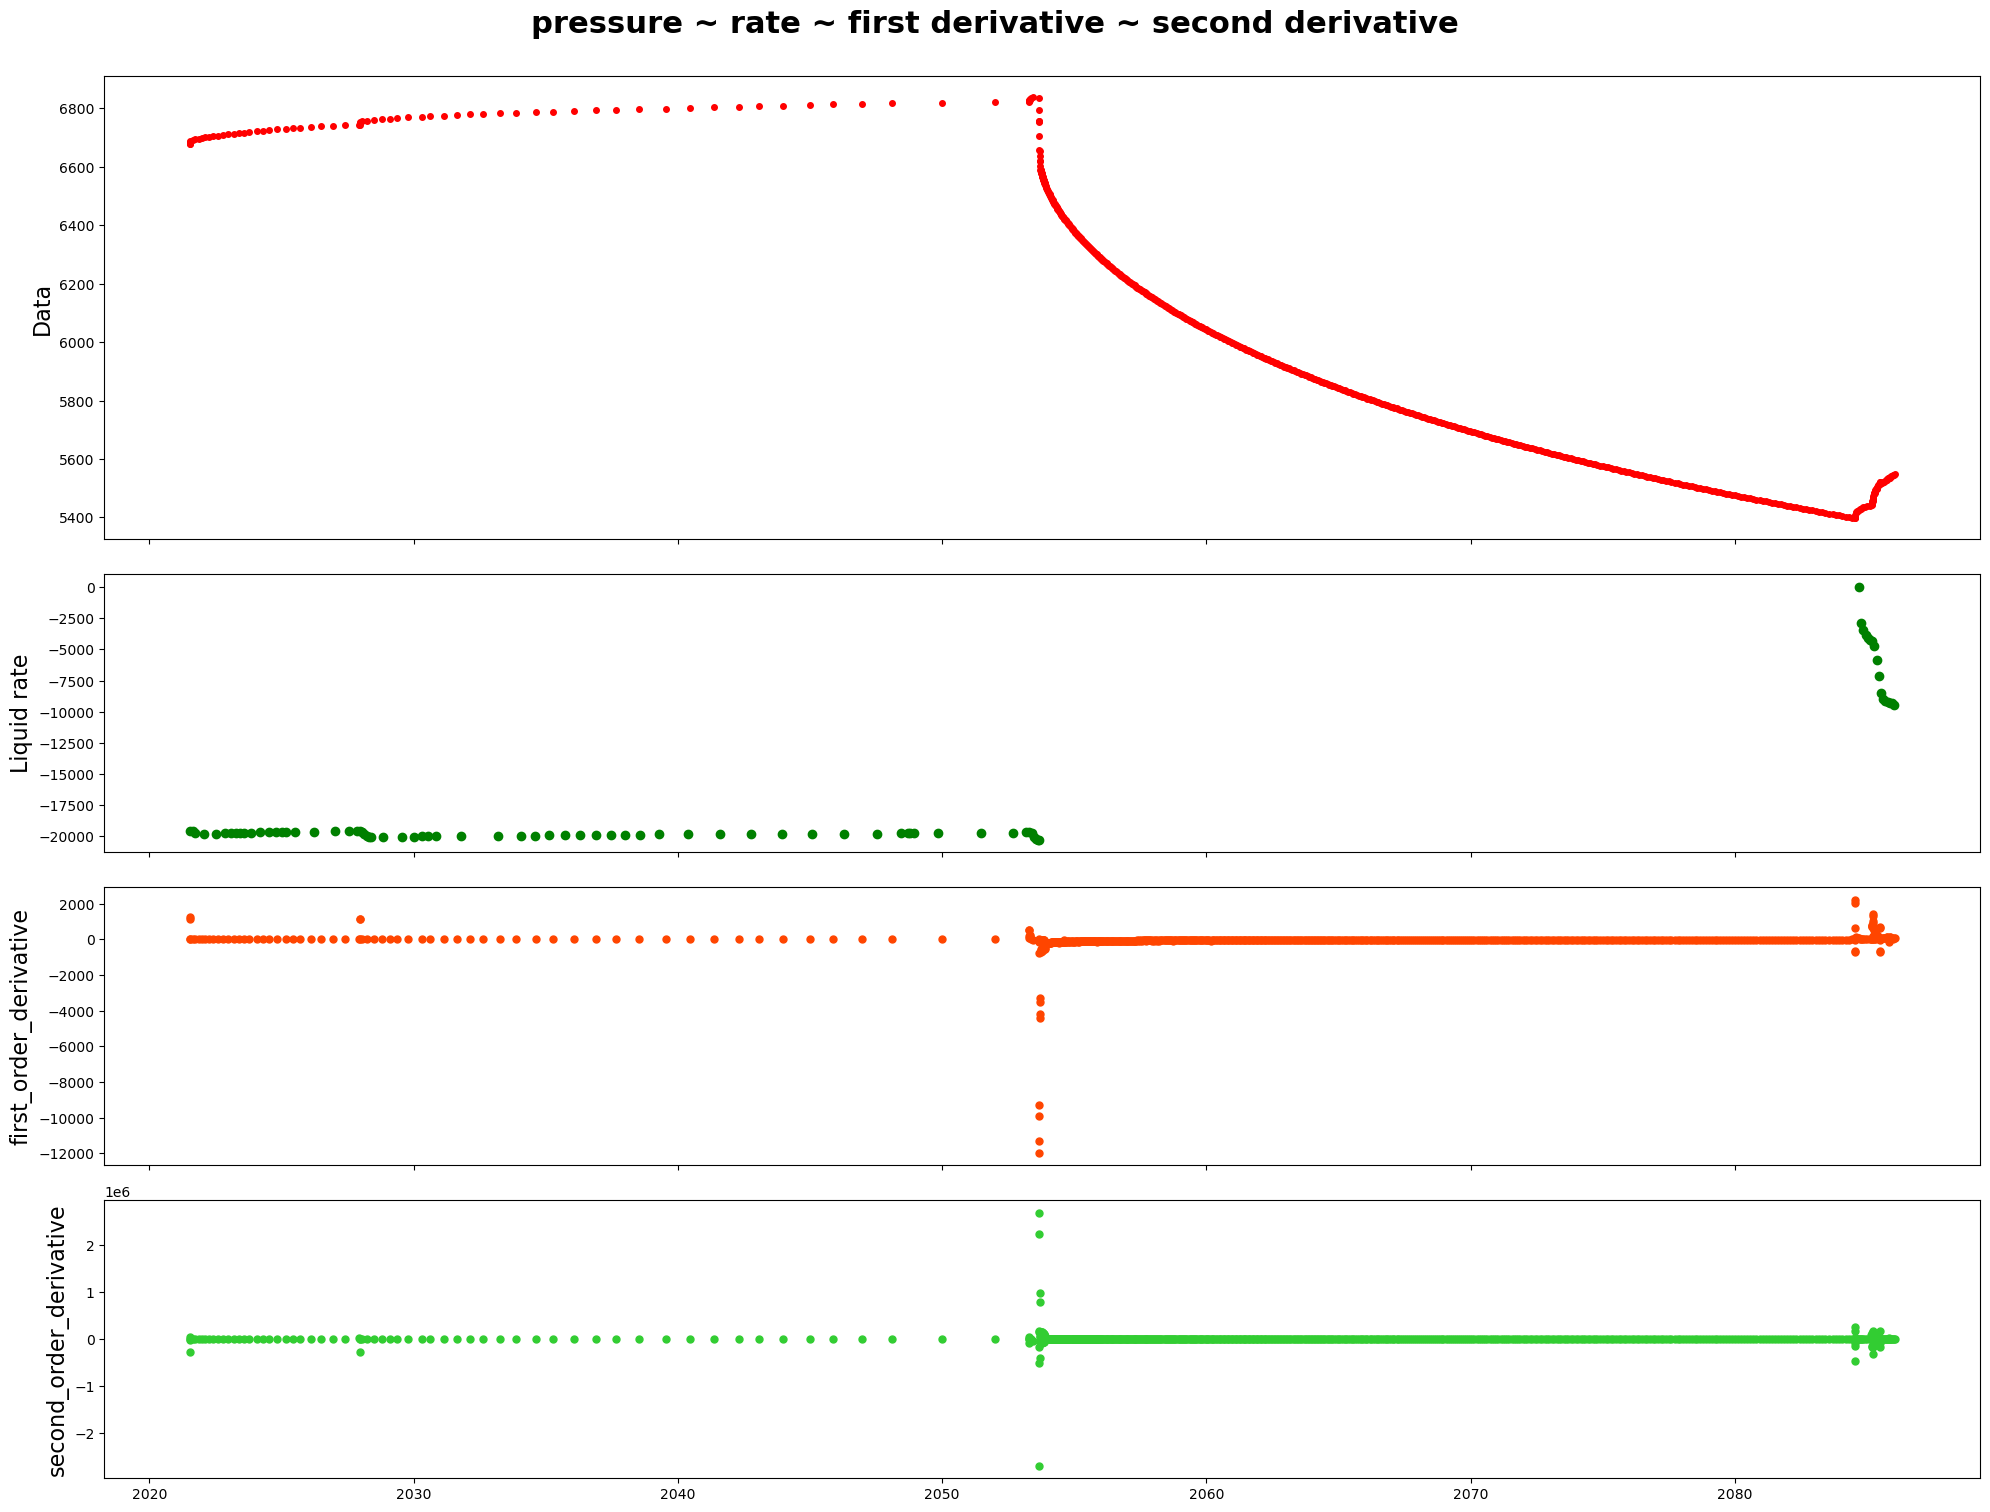

------row 23-----detected points:[15433, 16098]


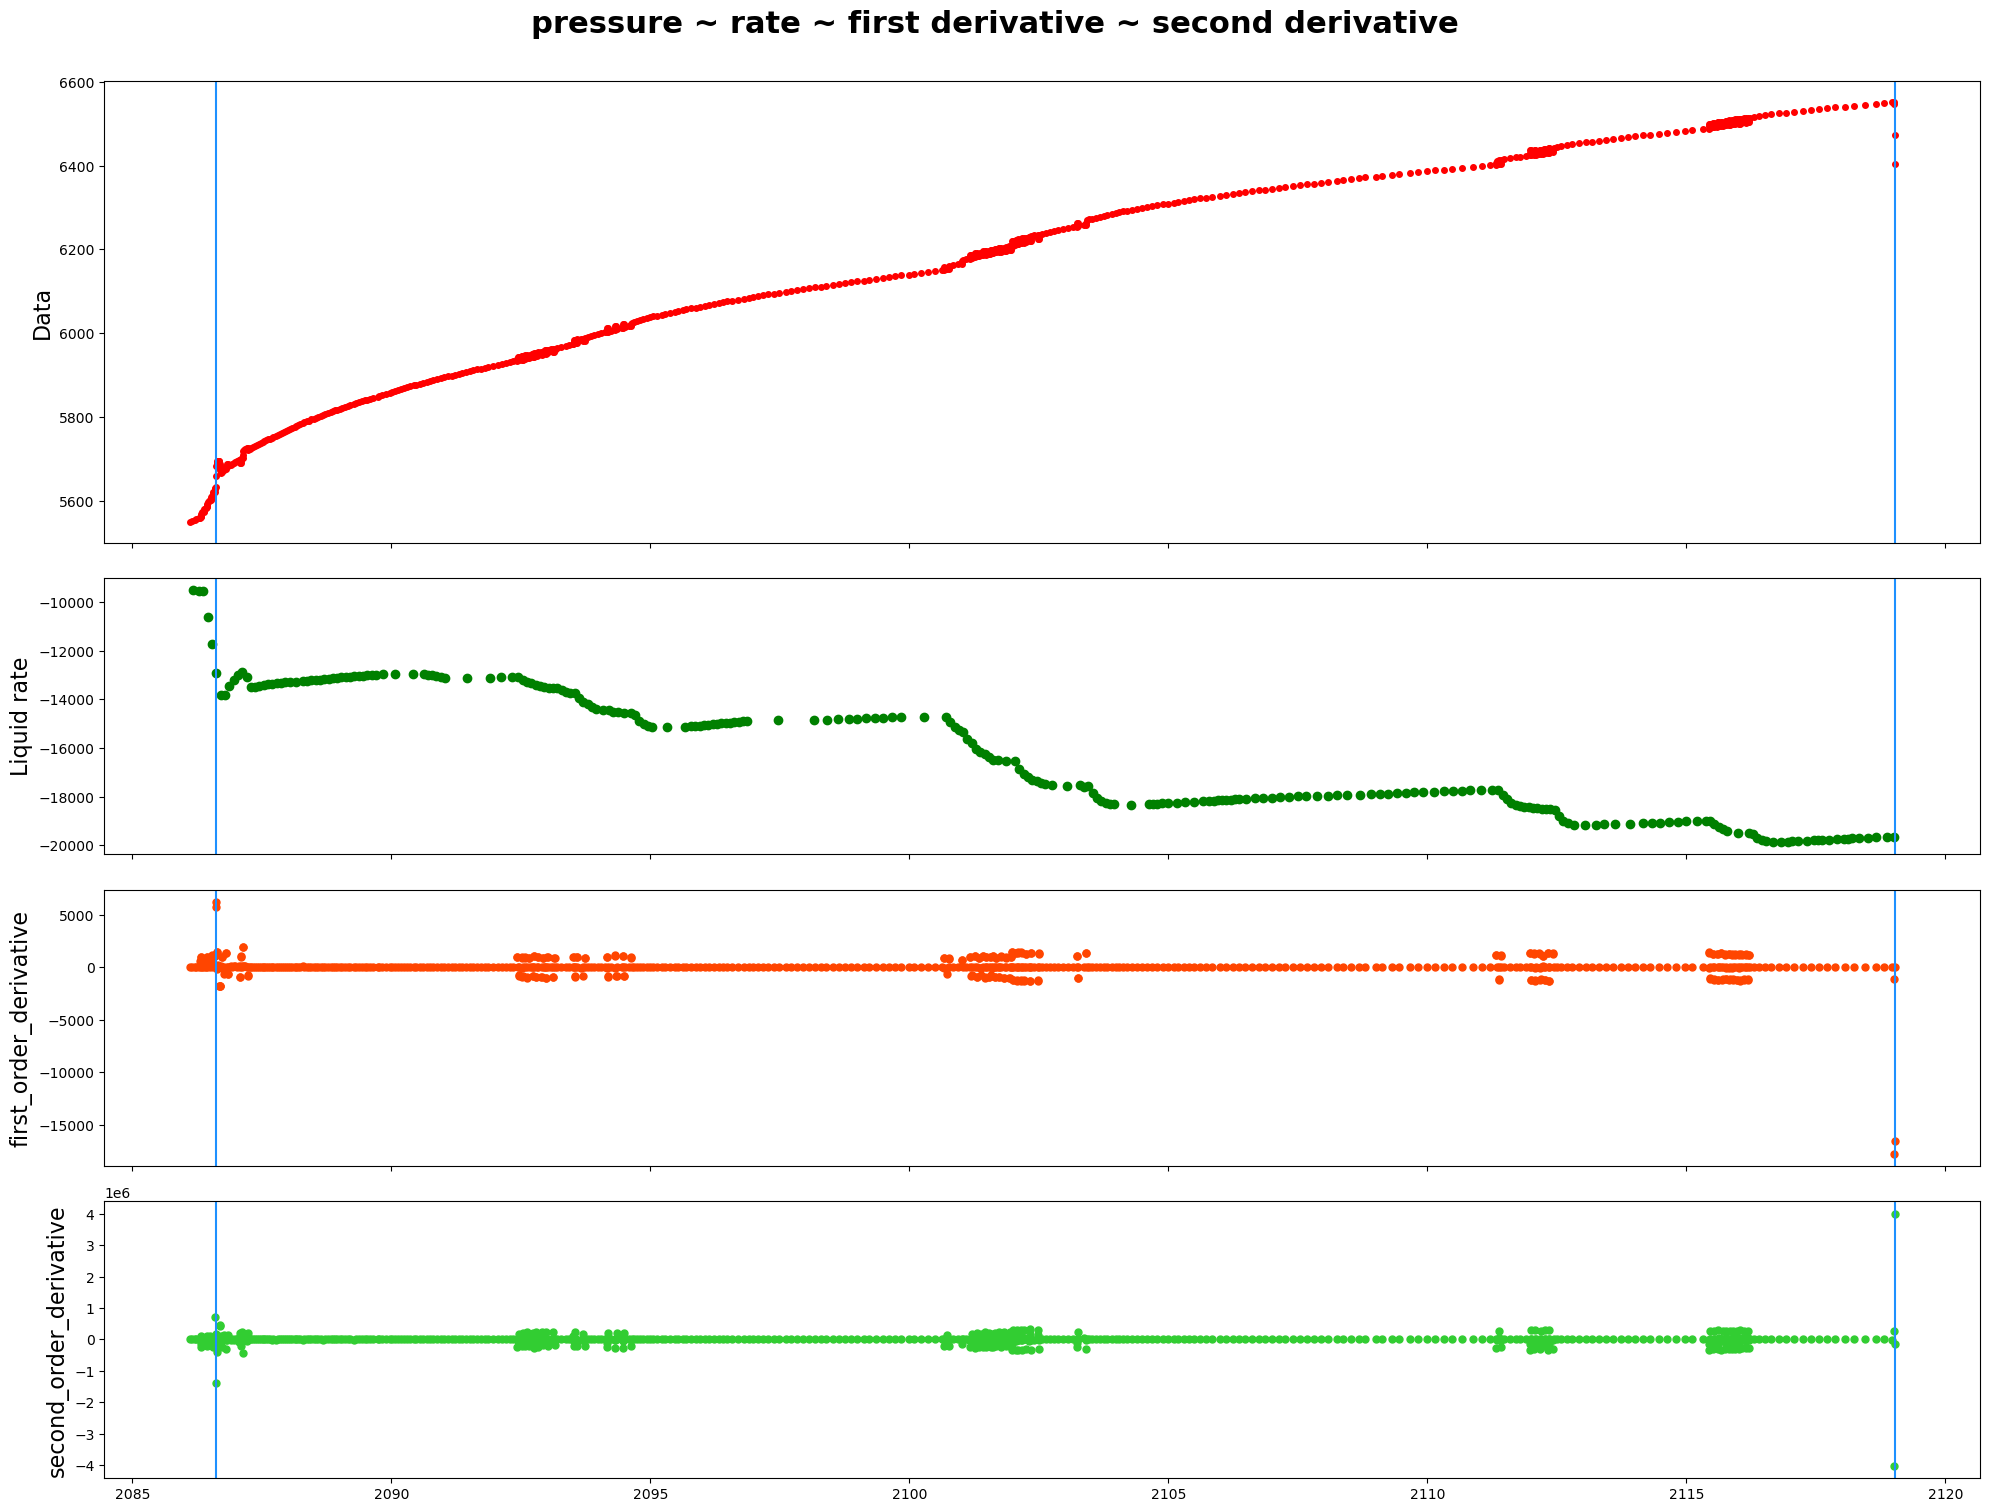

------row 24-----detected points:[16585]


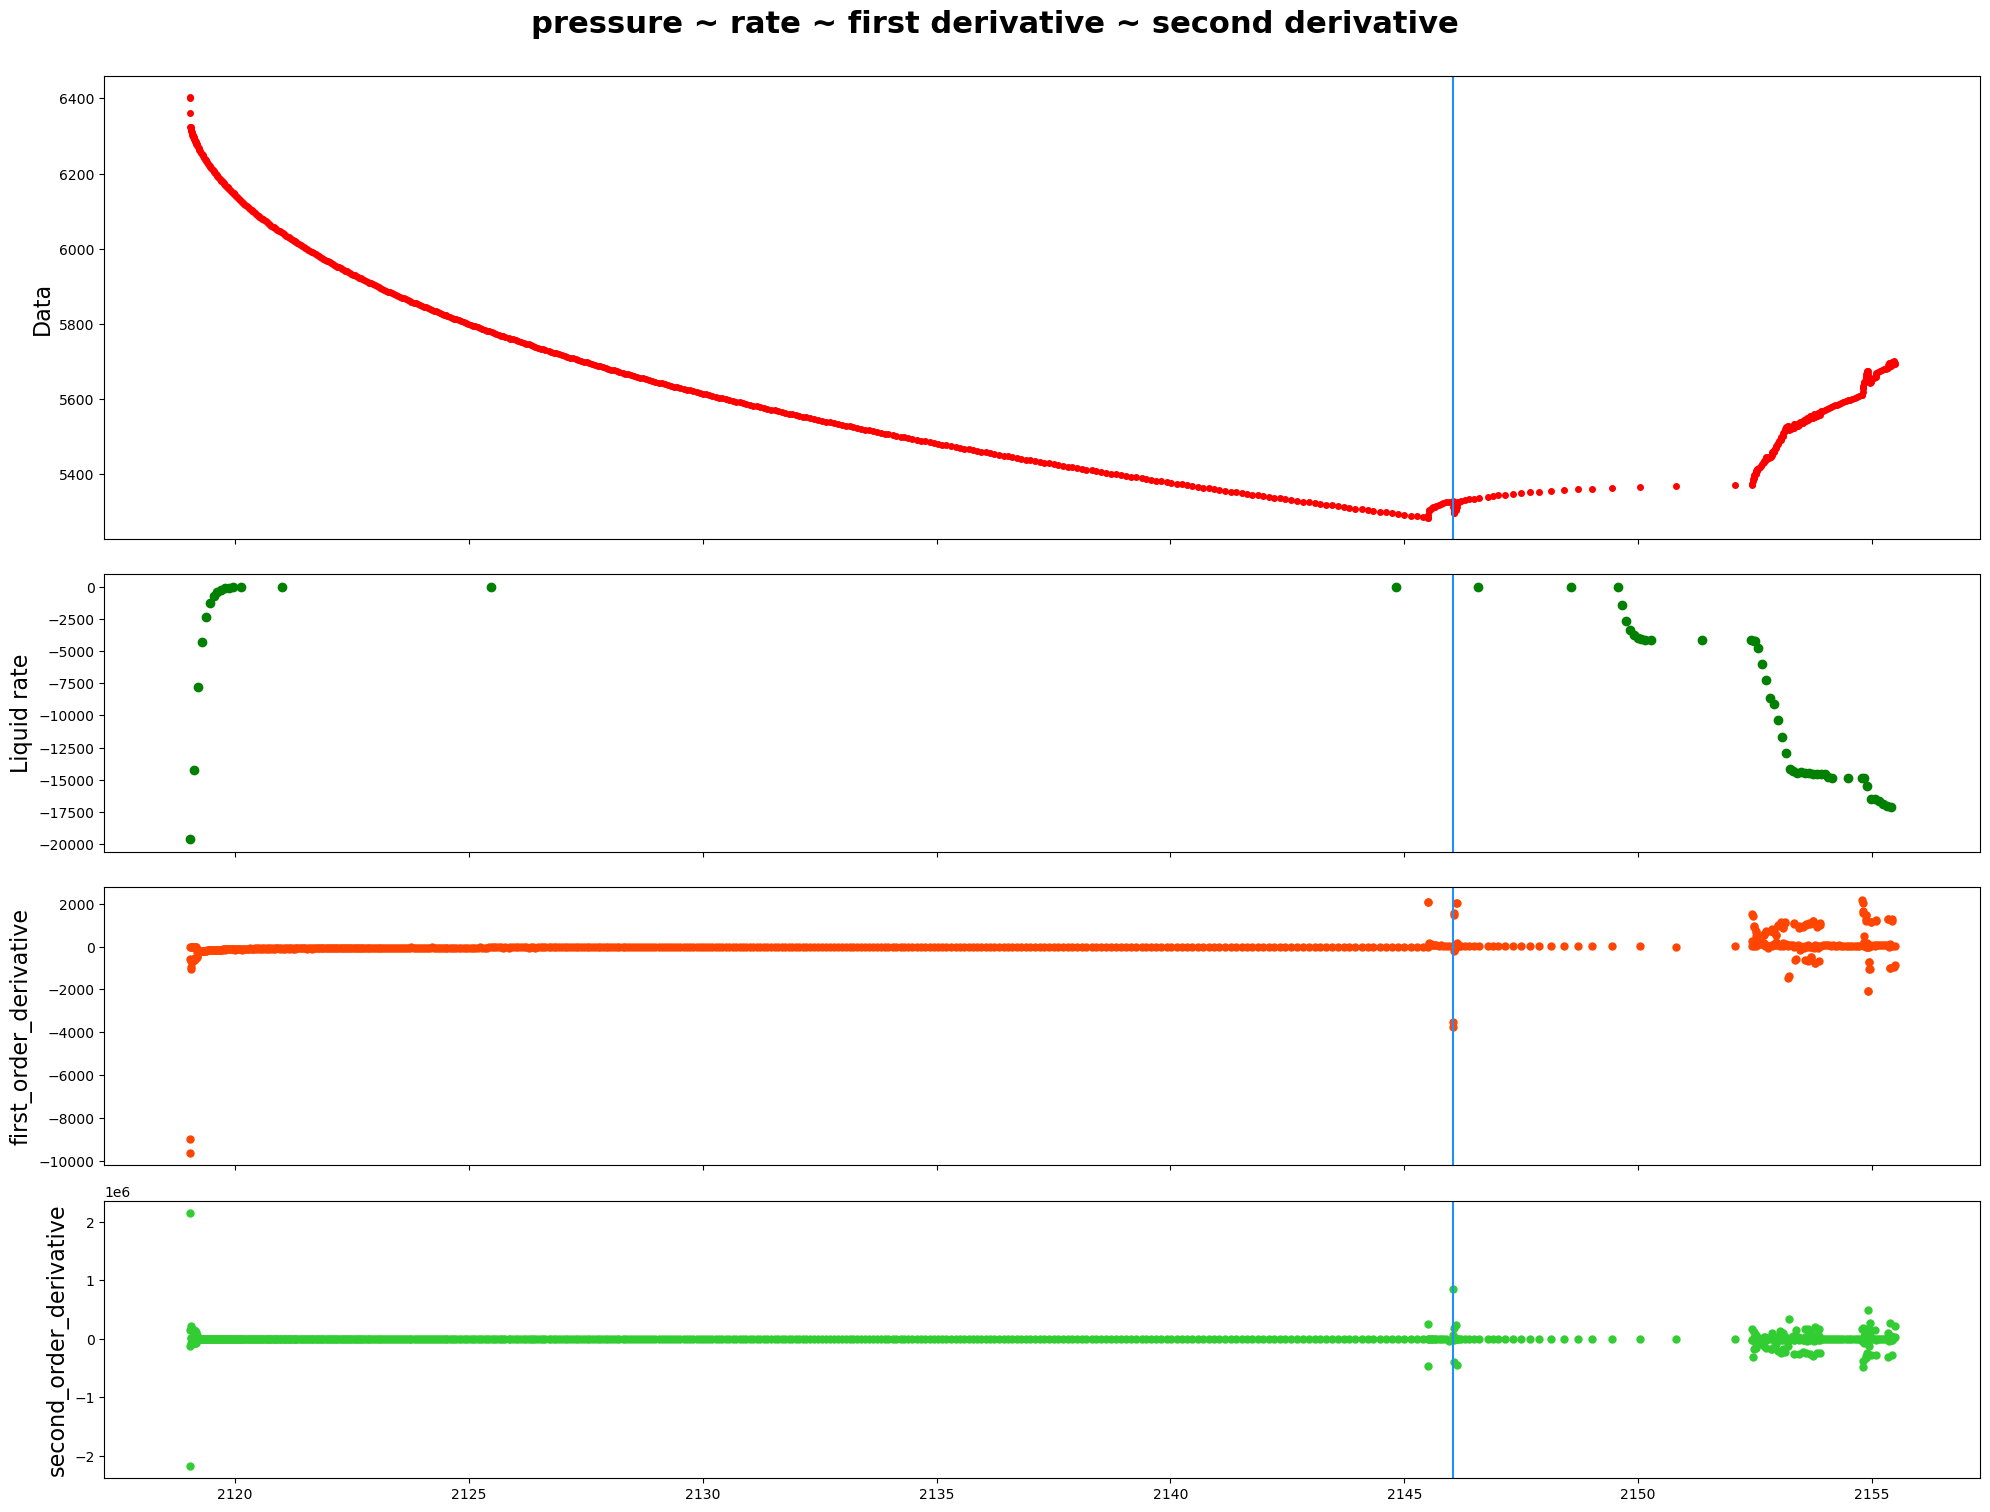

------row 25-----detected points:[]


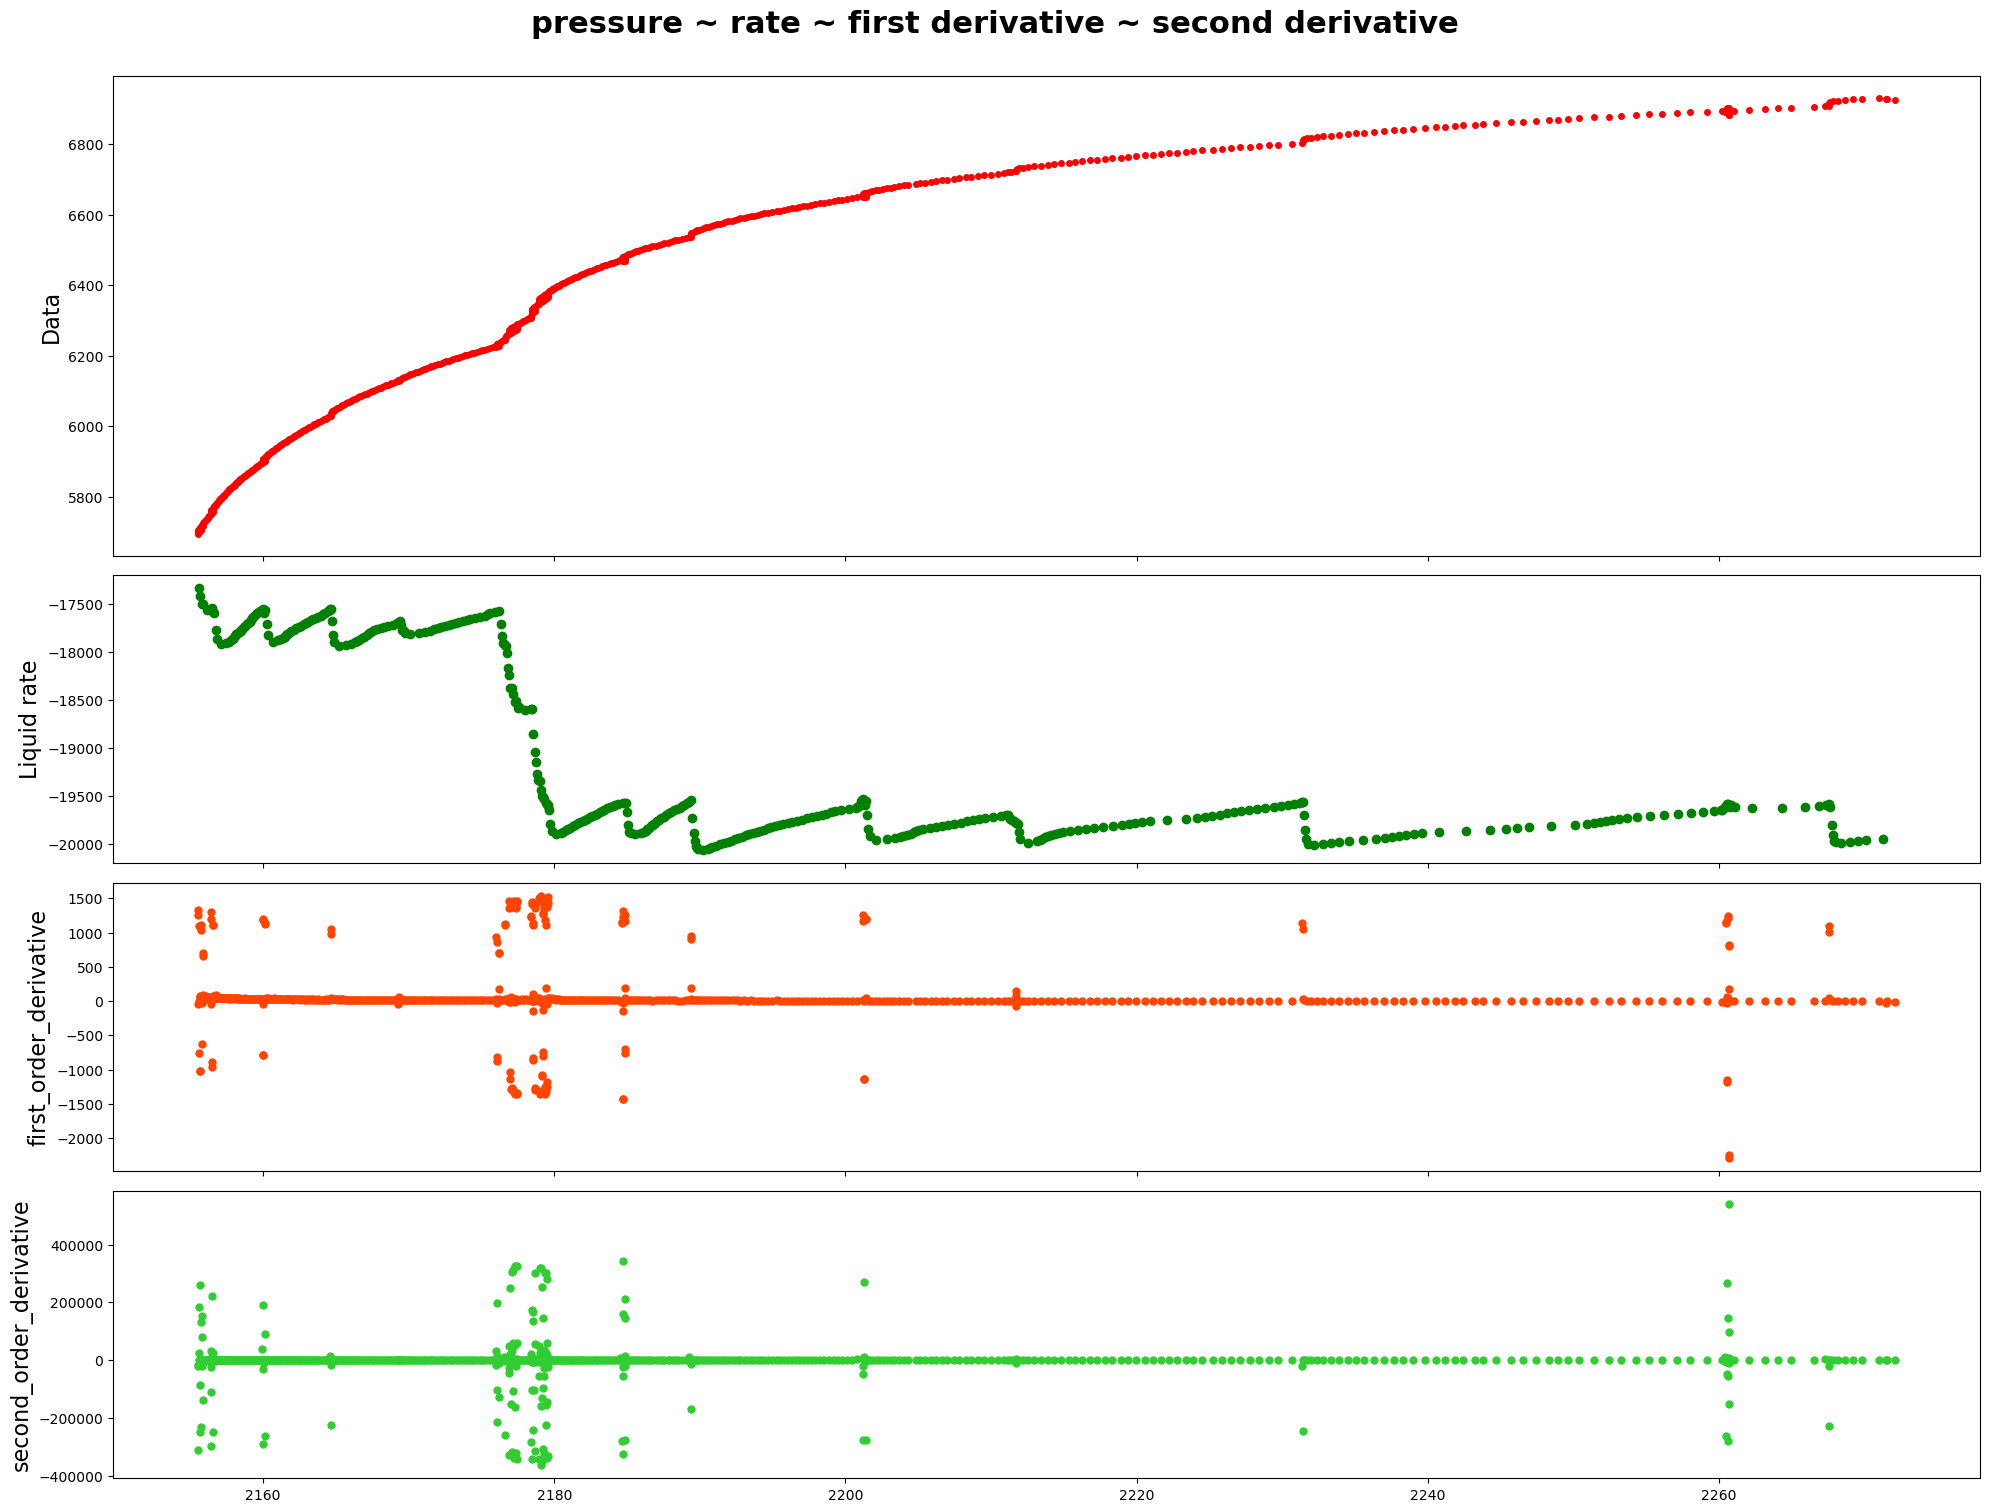

------row 26-----detected points:[17589]


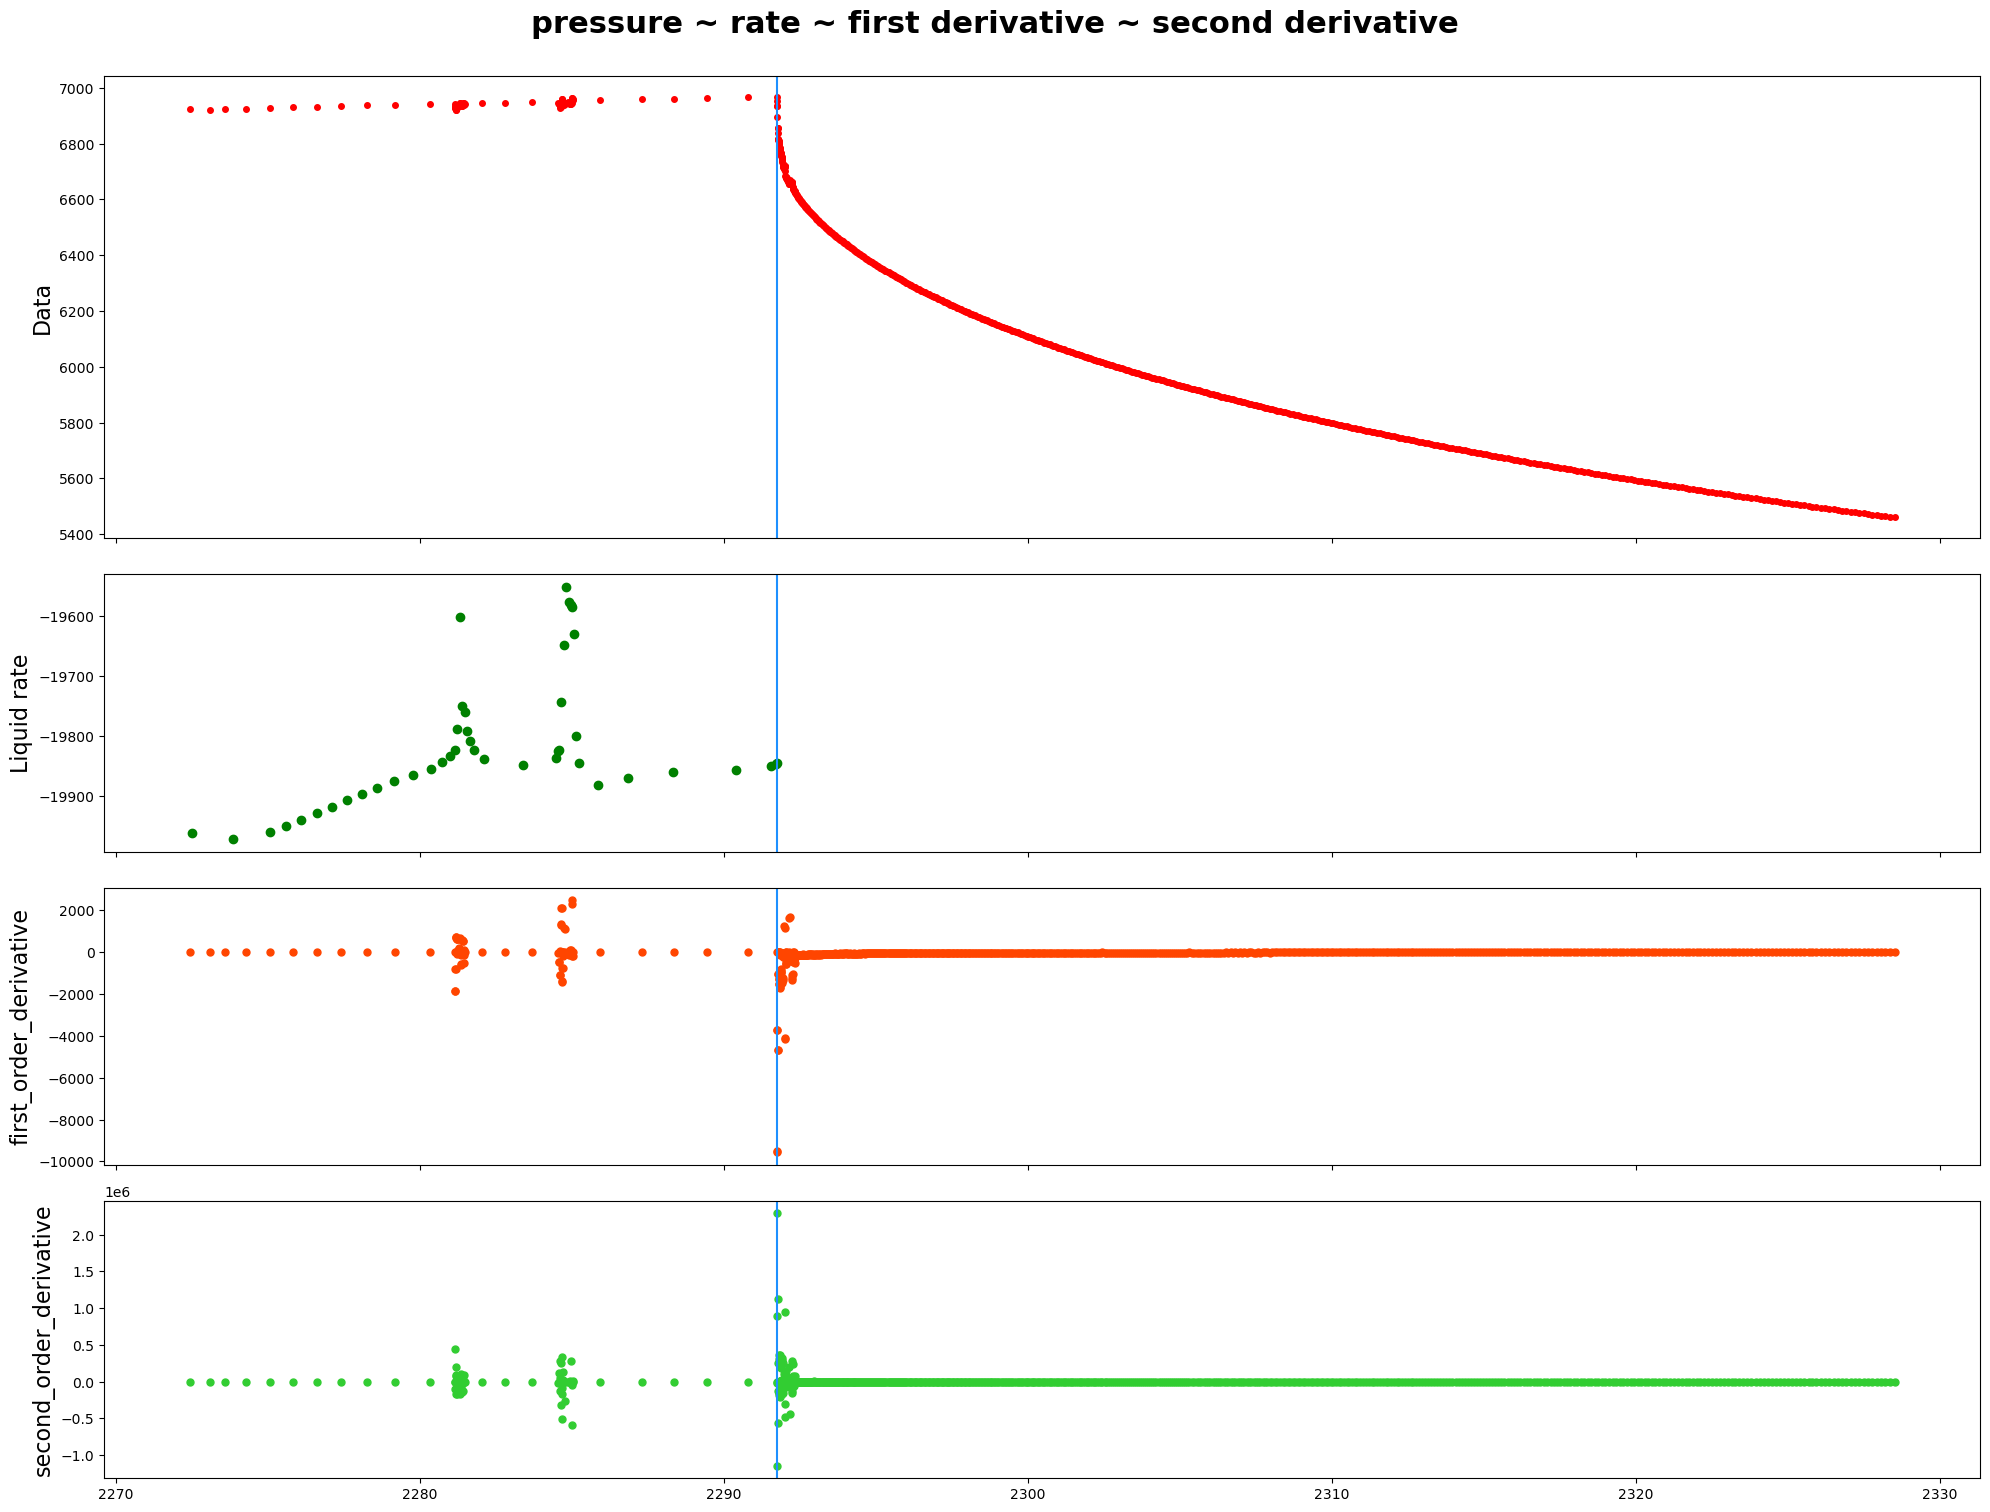

------row 27-----detected points:[18457, 18468, 18815, 18820, 18821, 18823, 18824, 18826, 18827, 18830, 18836, 18847]


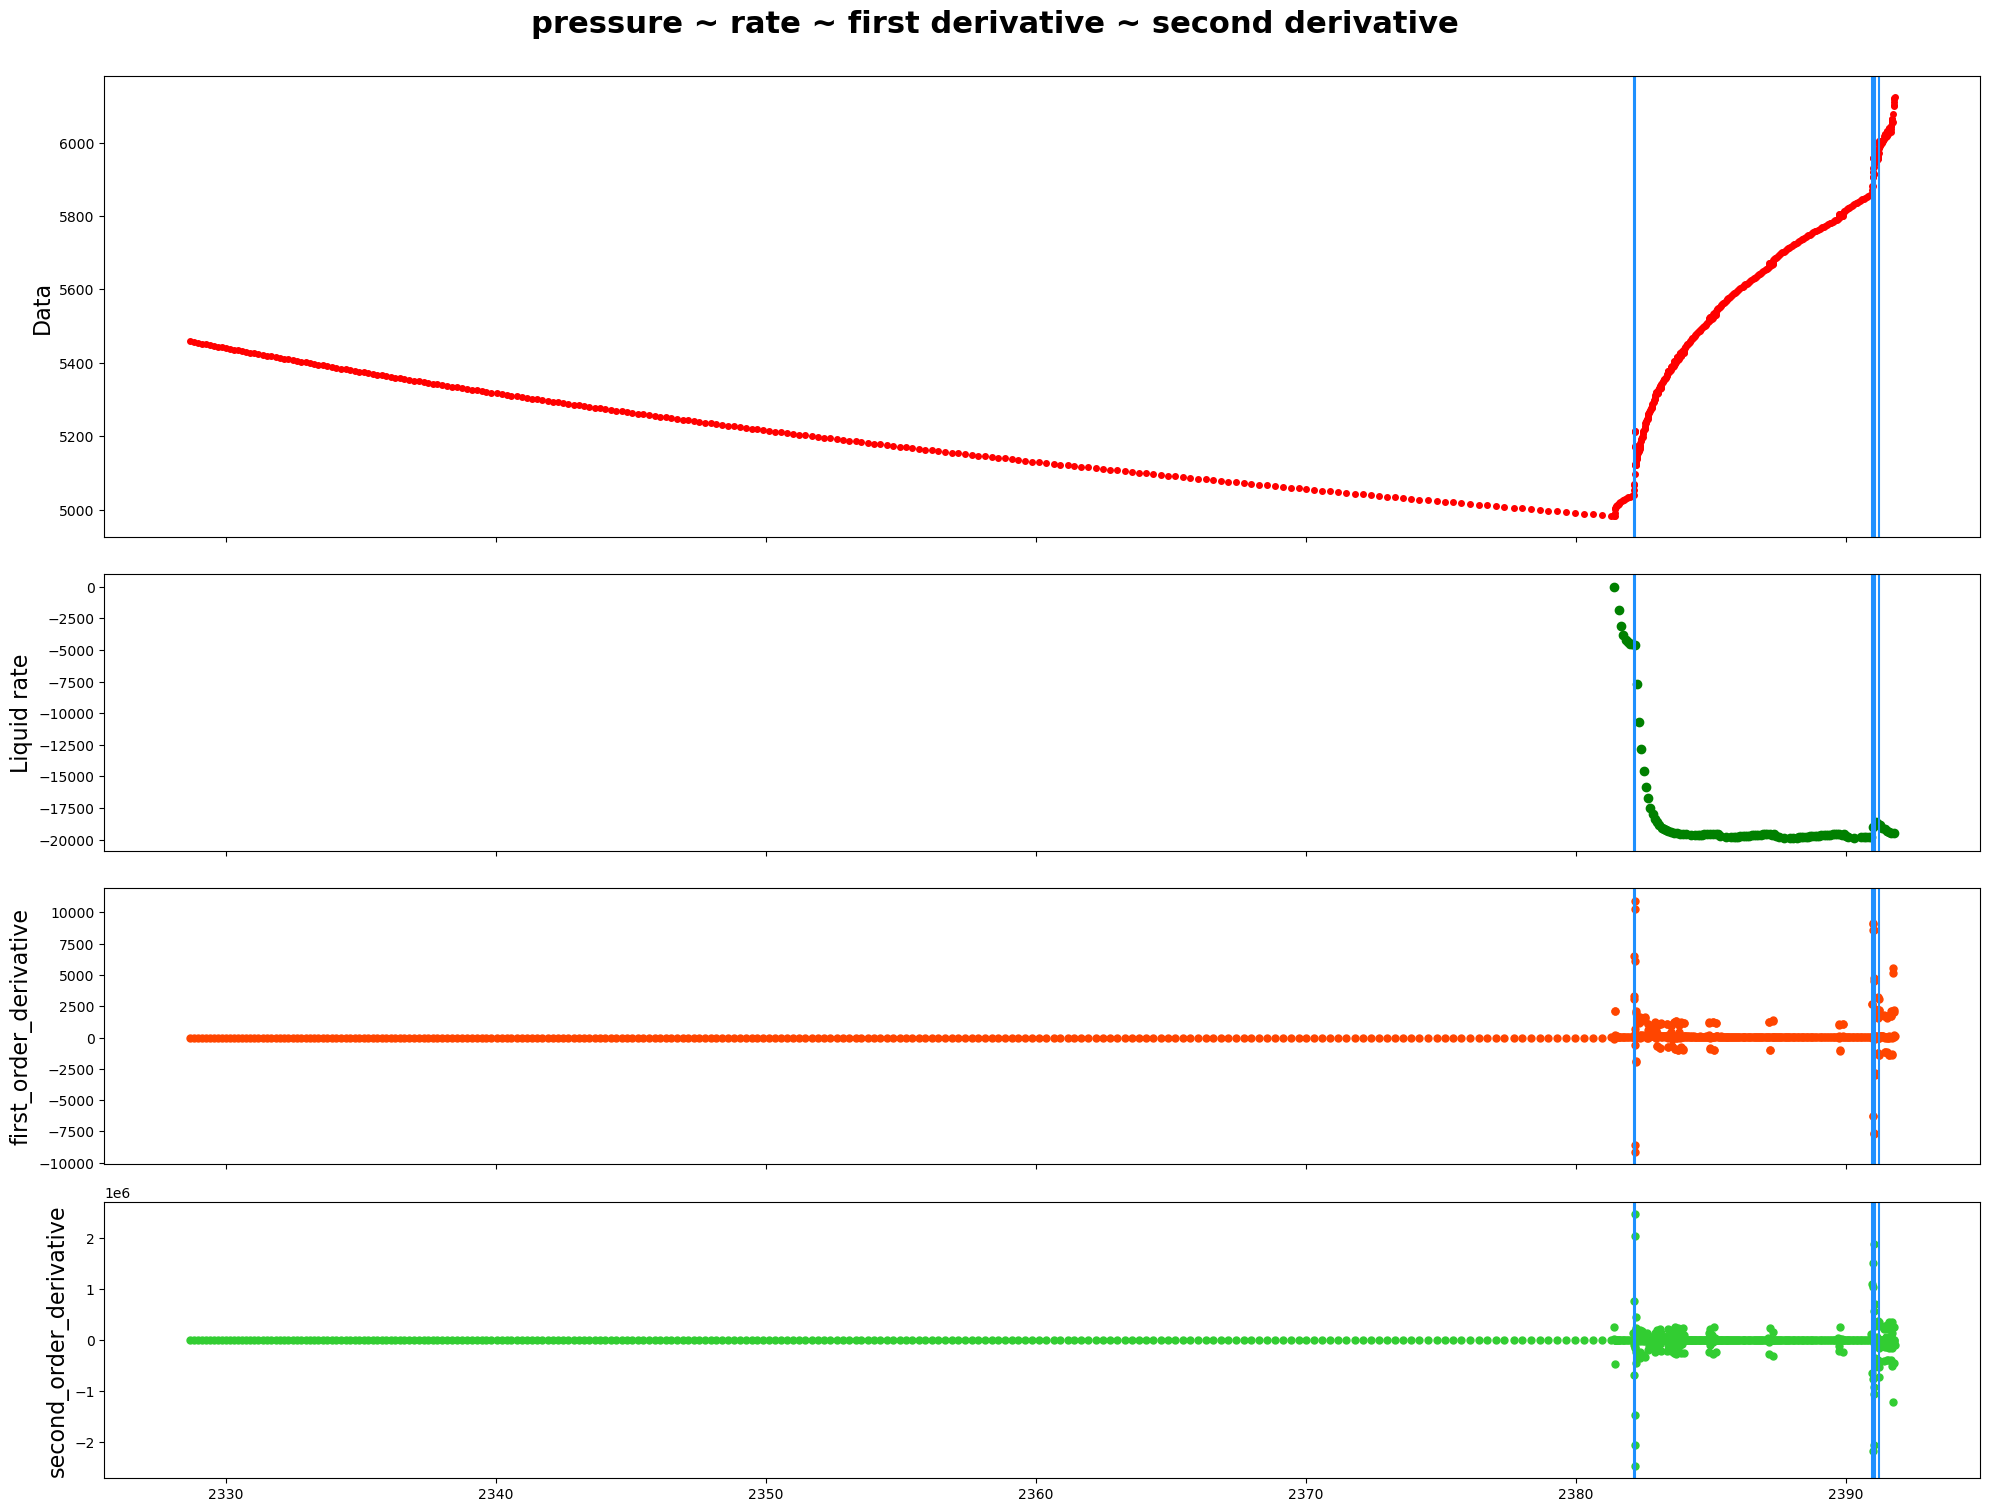

------row 28-----detected points:[]


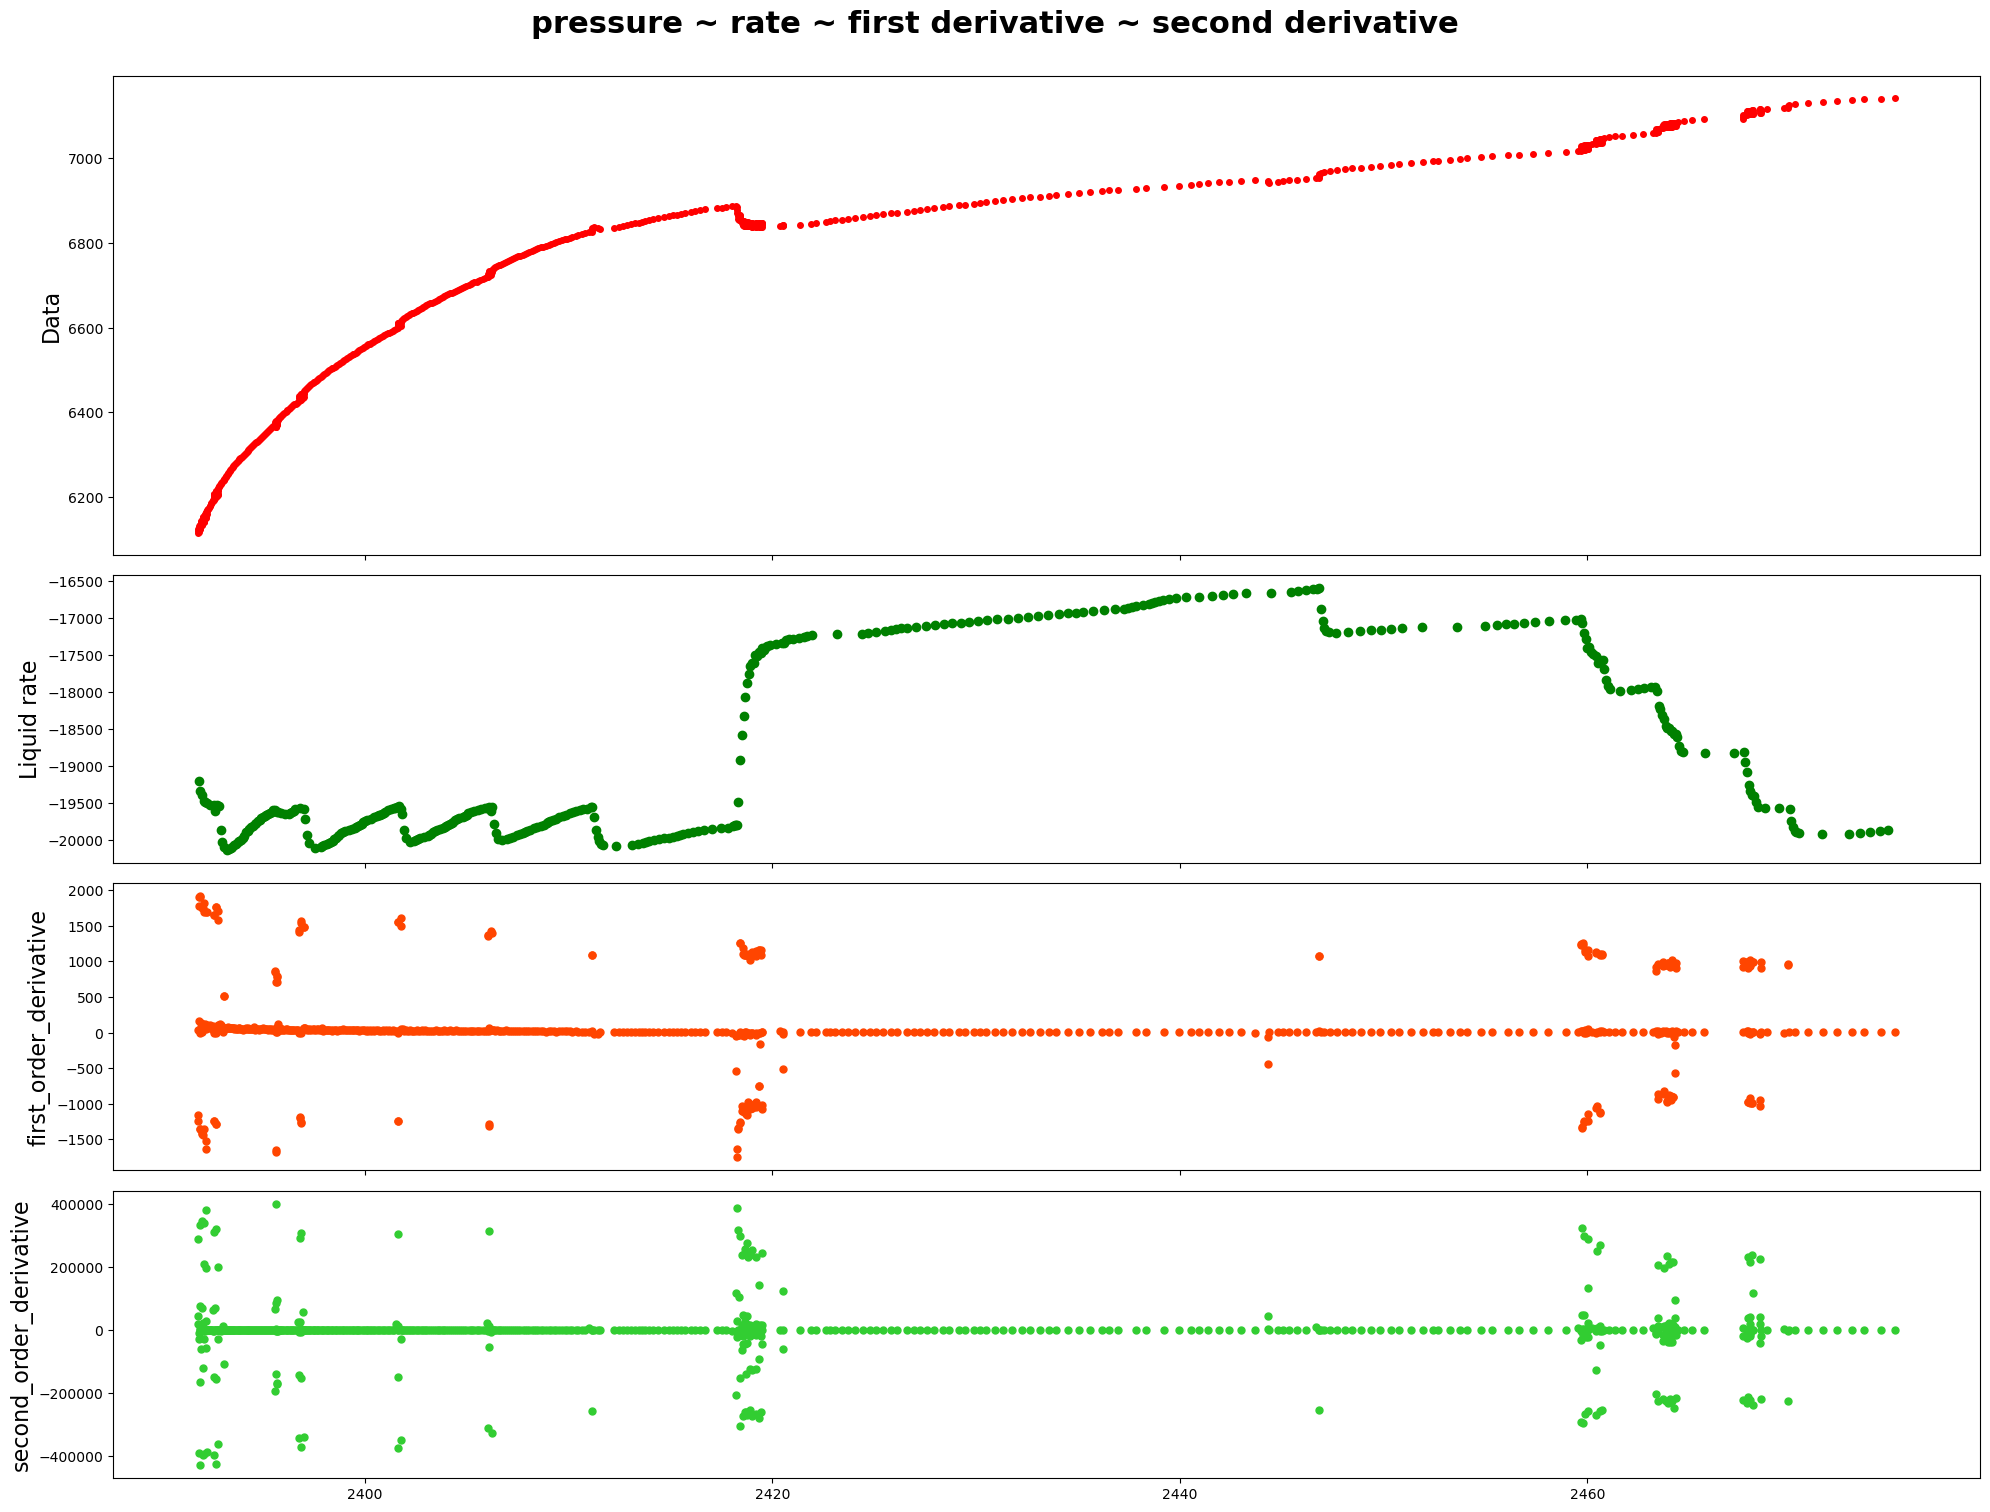

------row 29-----detected points:[19643]


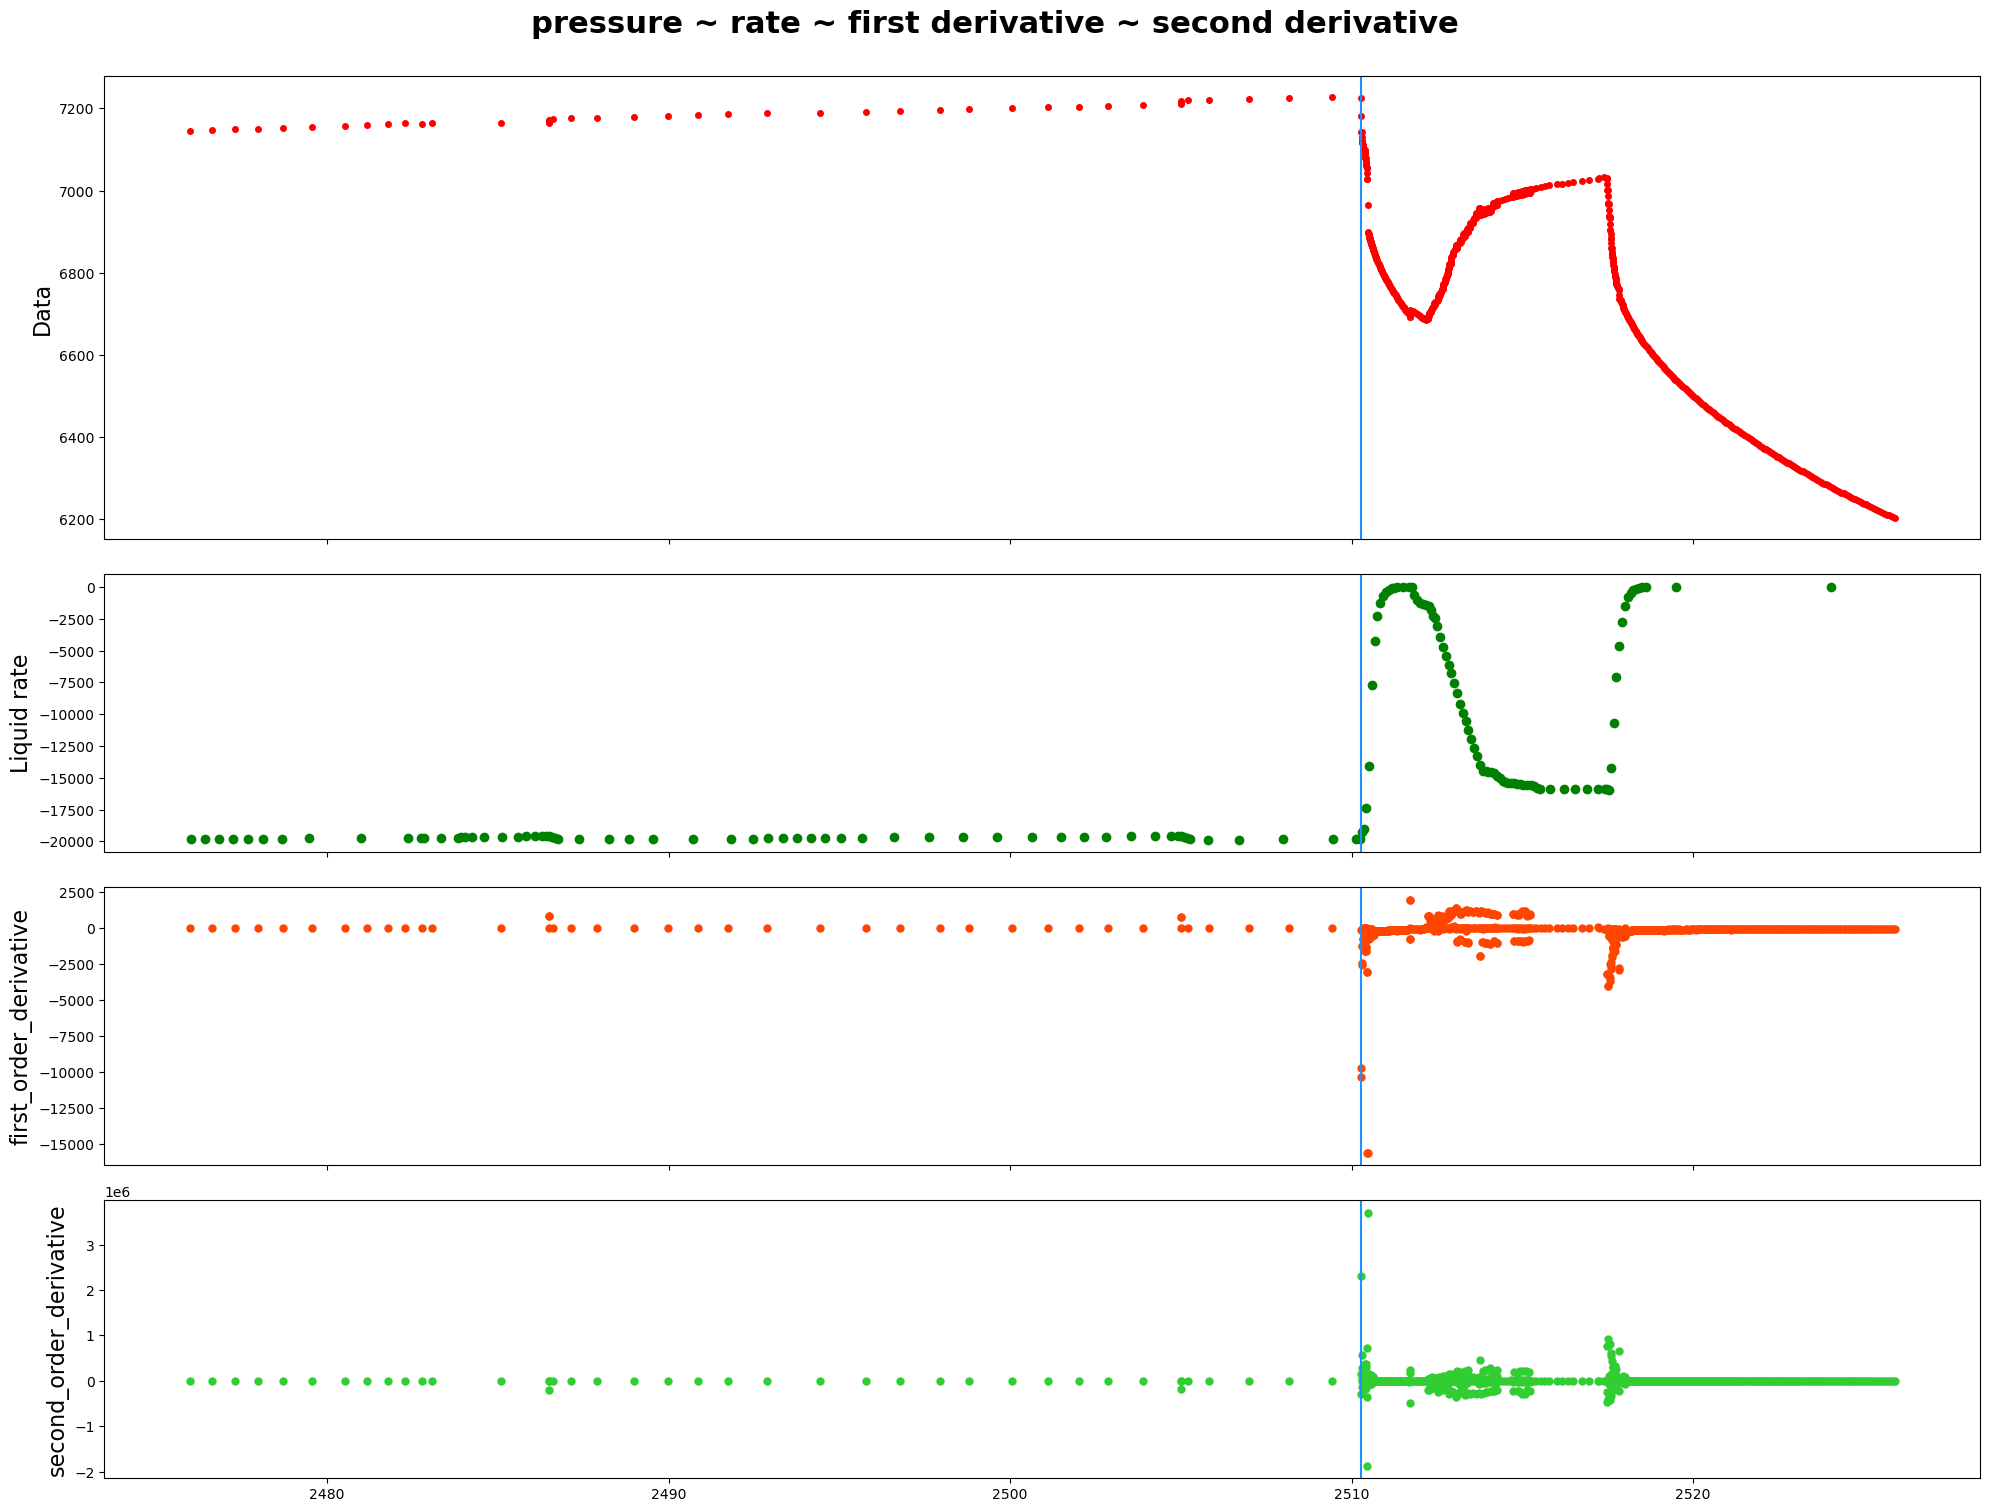

------row 30-----detected points:[20362, 20701]


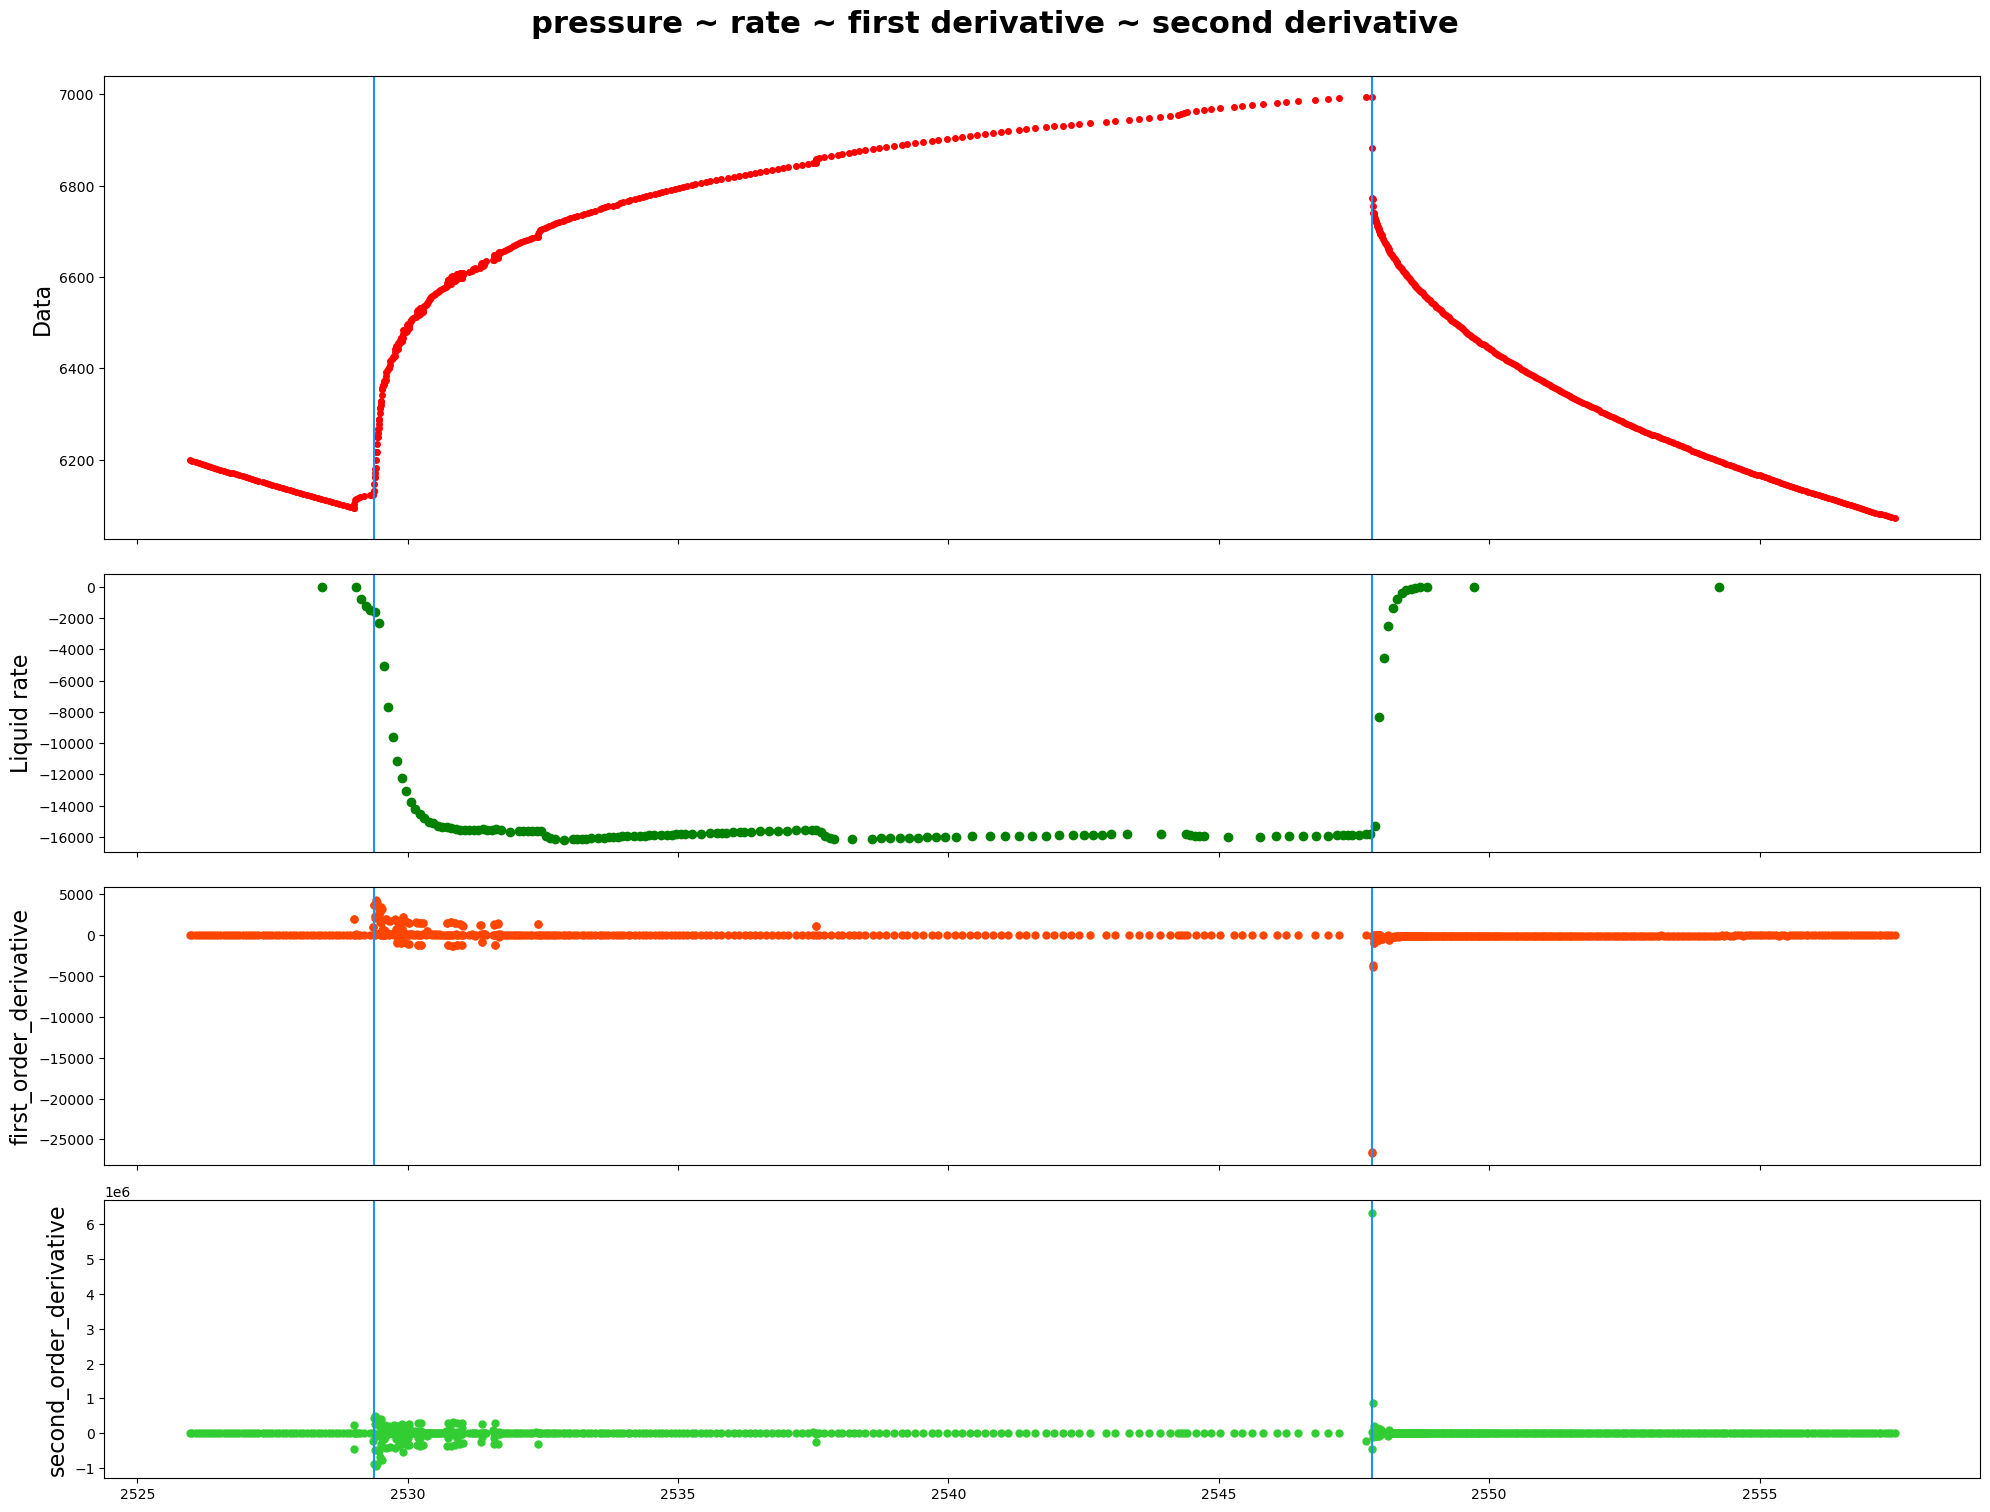

------row 31-----detected points:[]


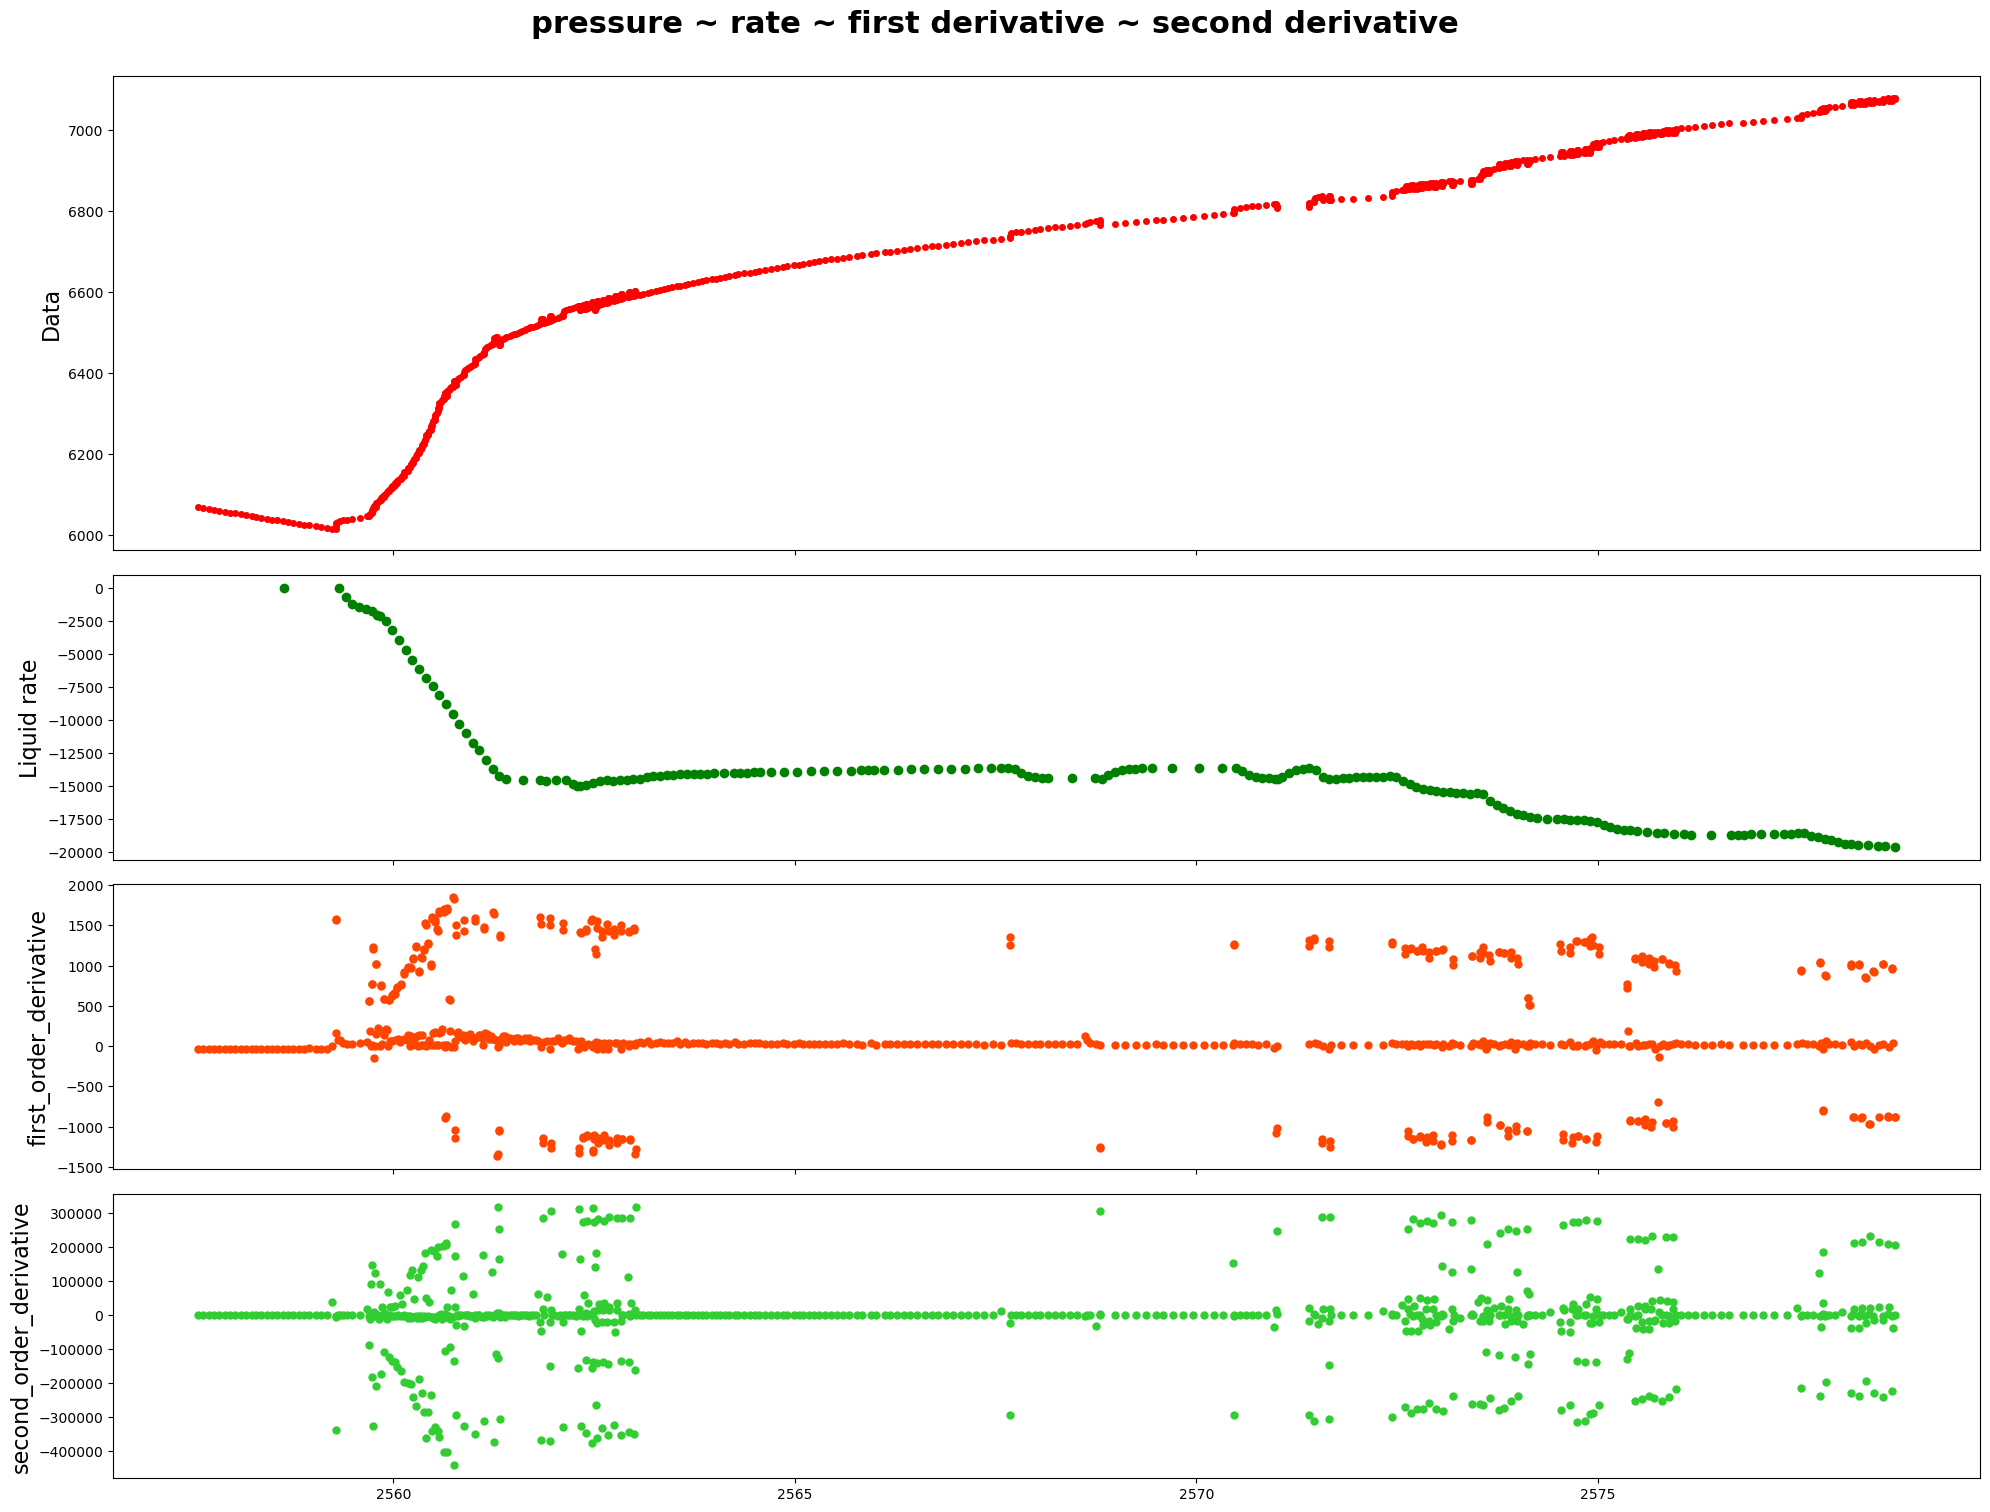

------row 32-----detected points:[22183]


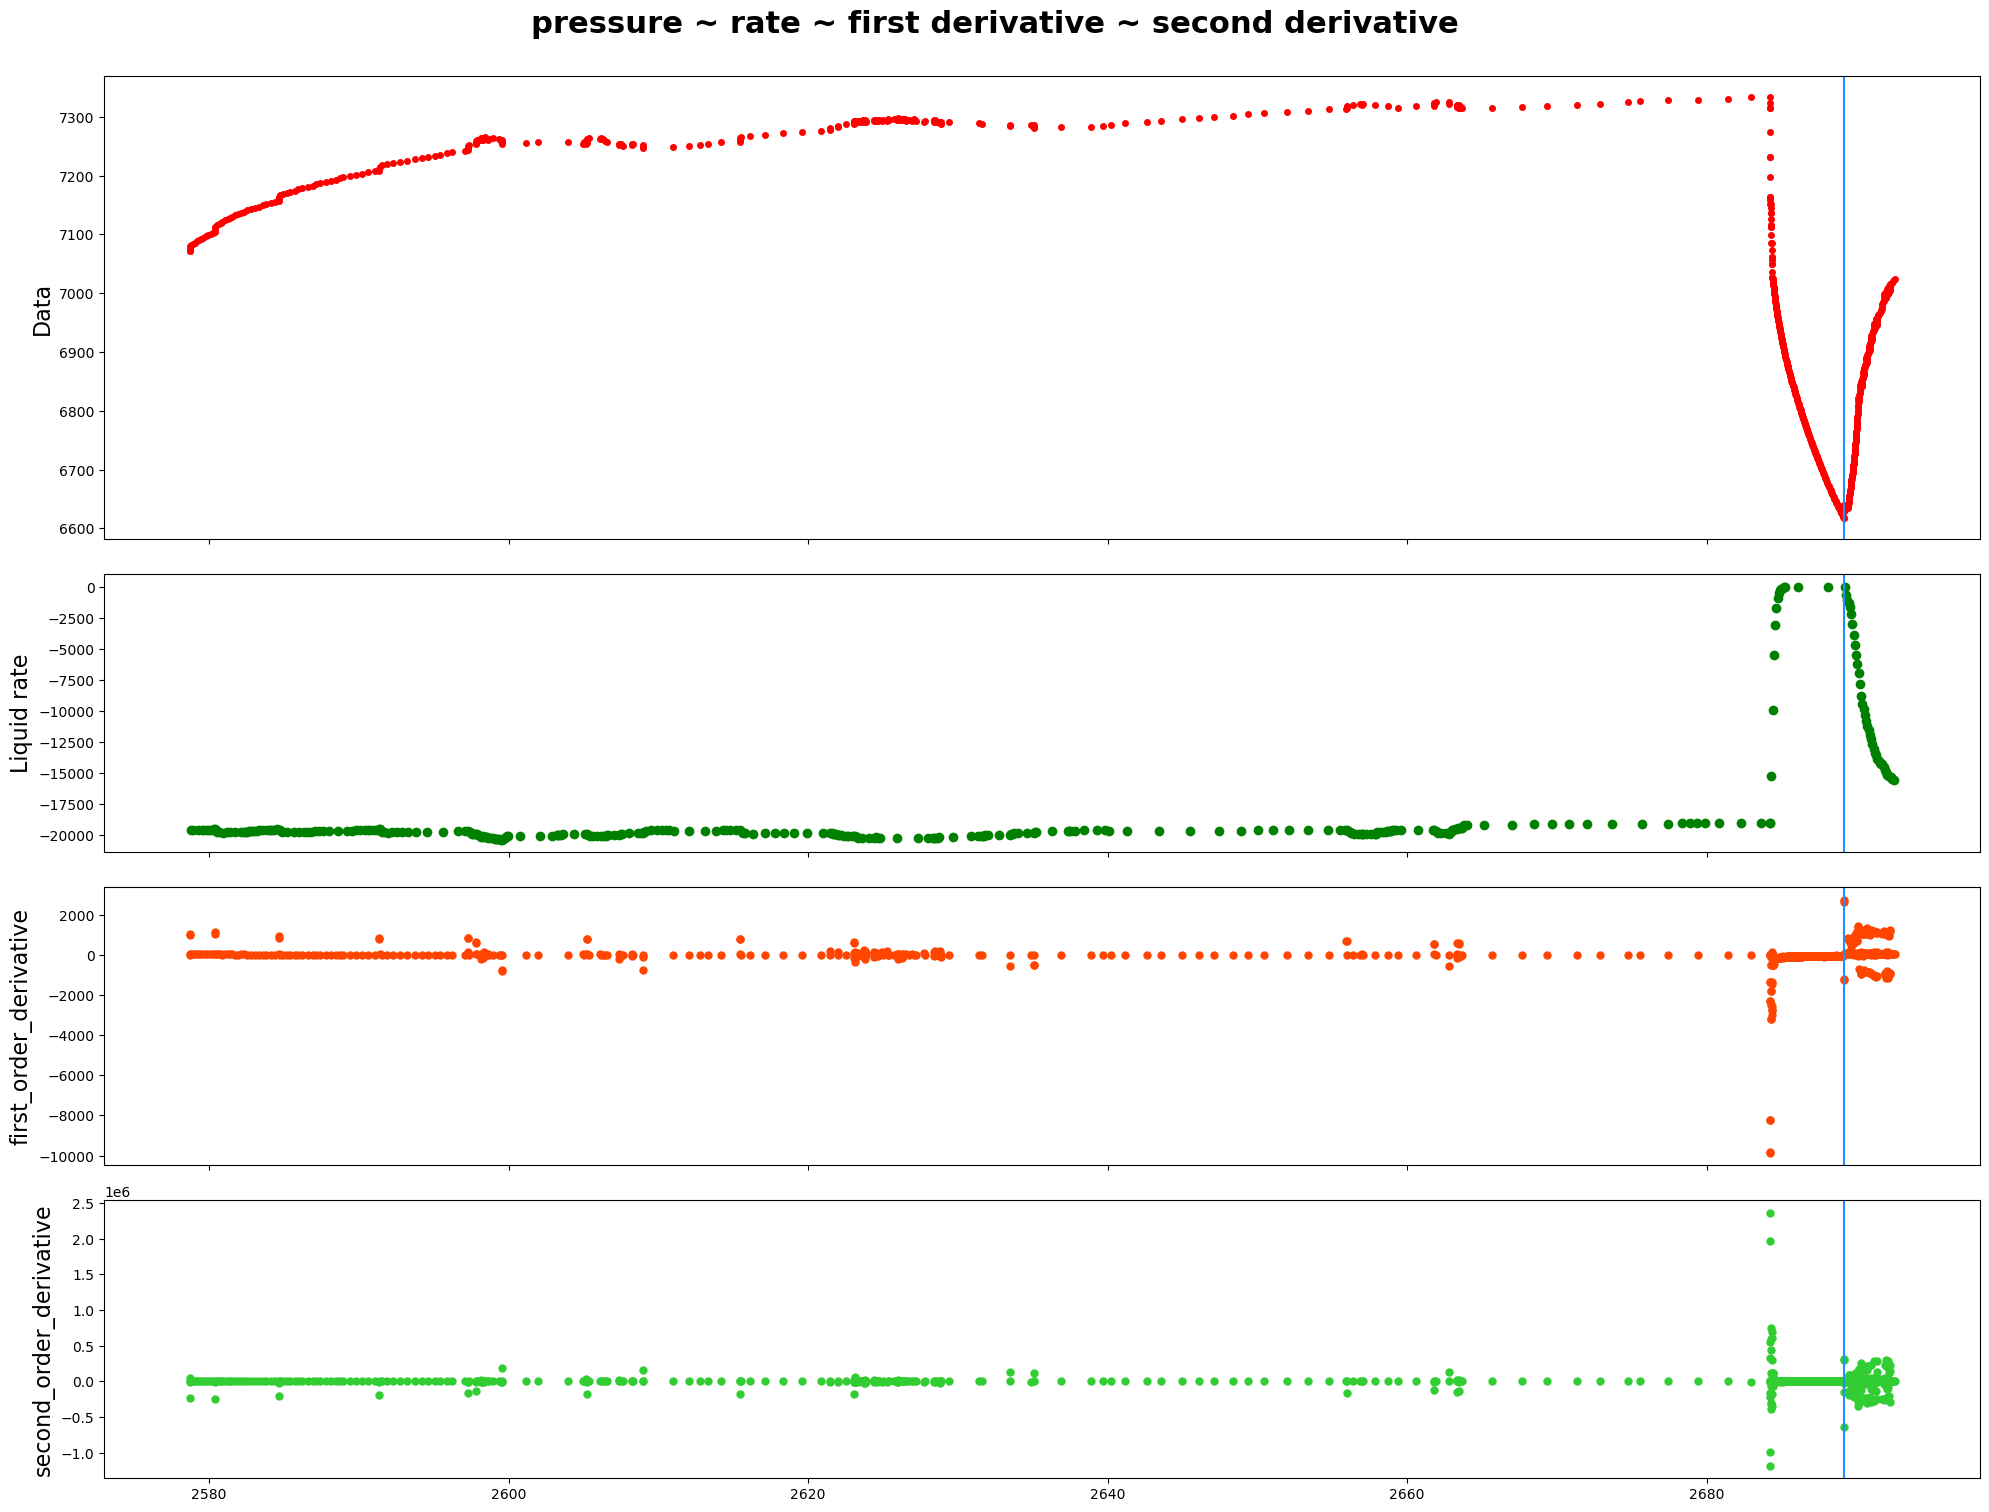

------row 33-----detected points:[22711]


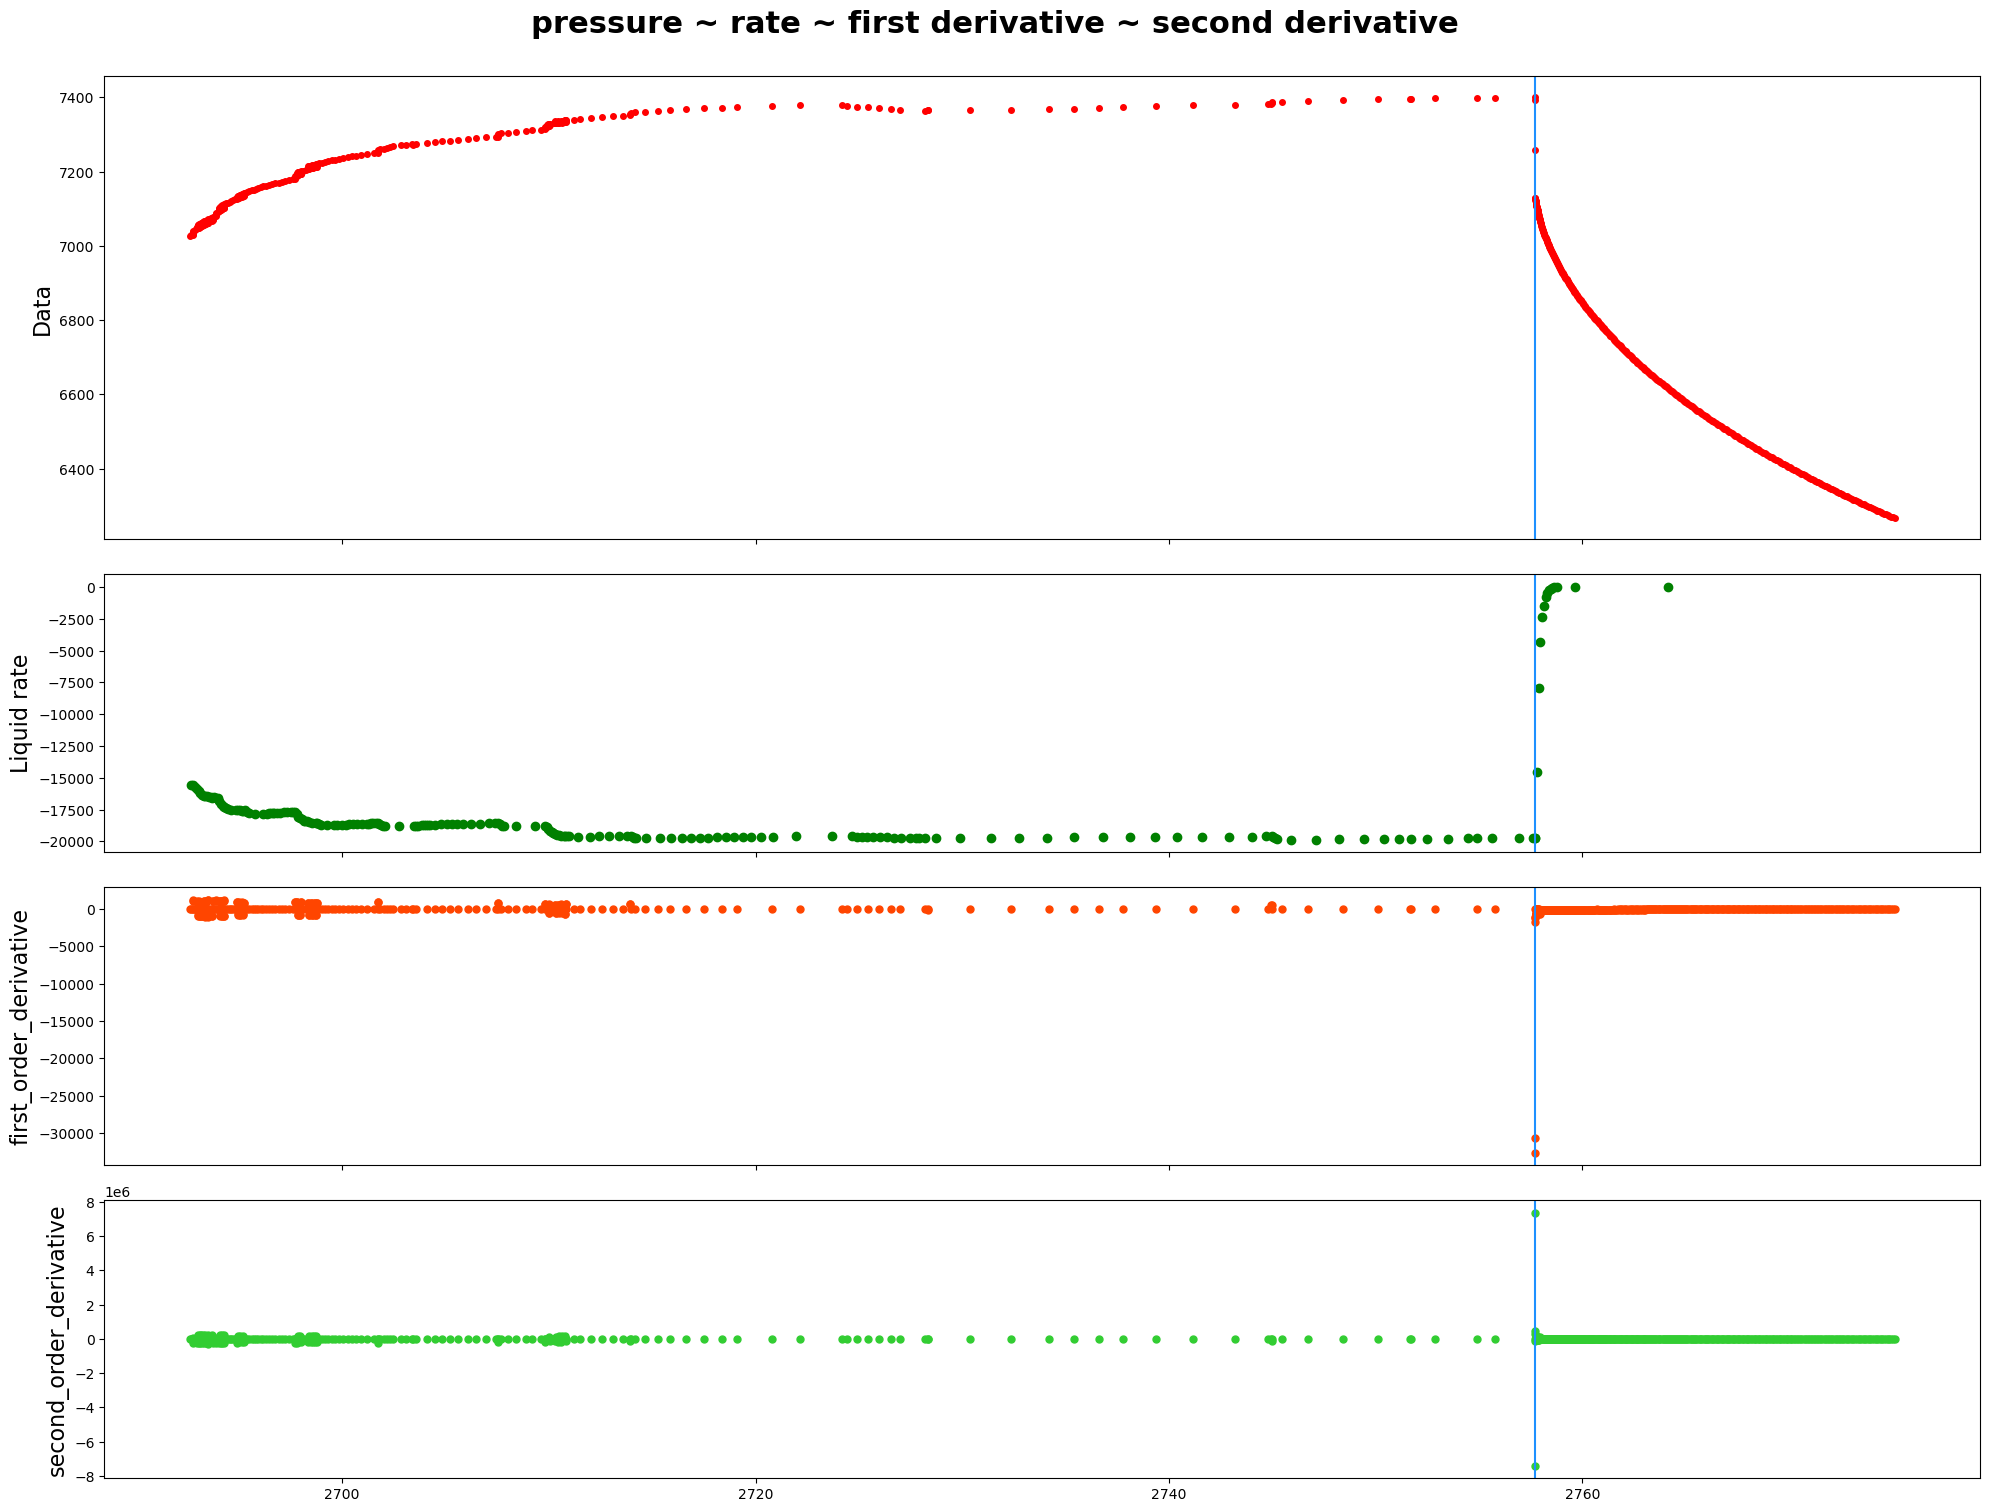

------row 34-----detected points:[]


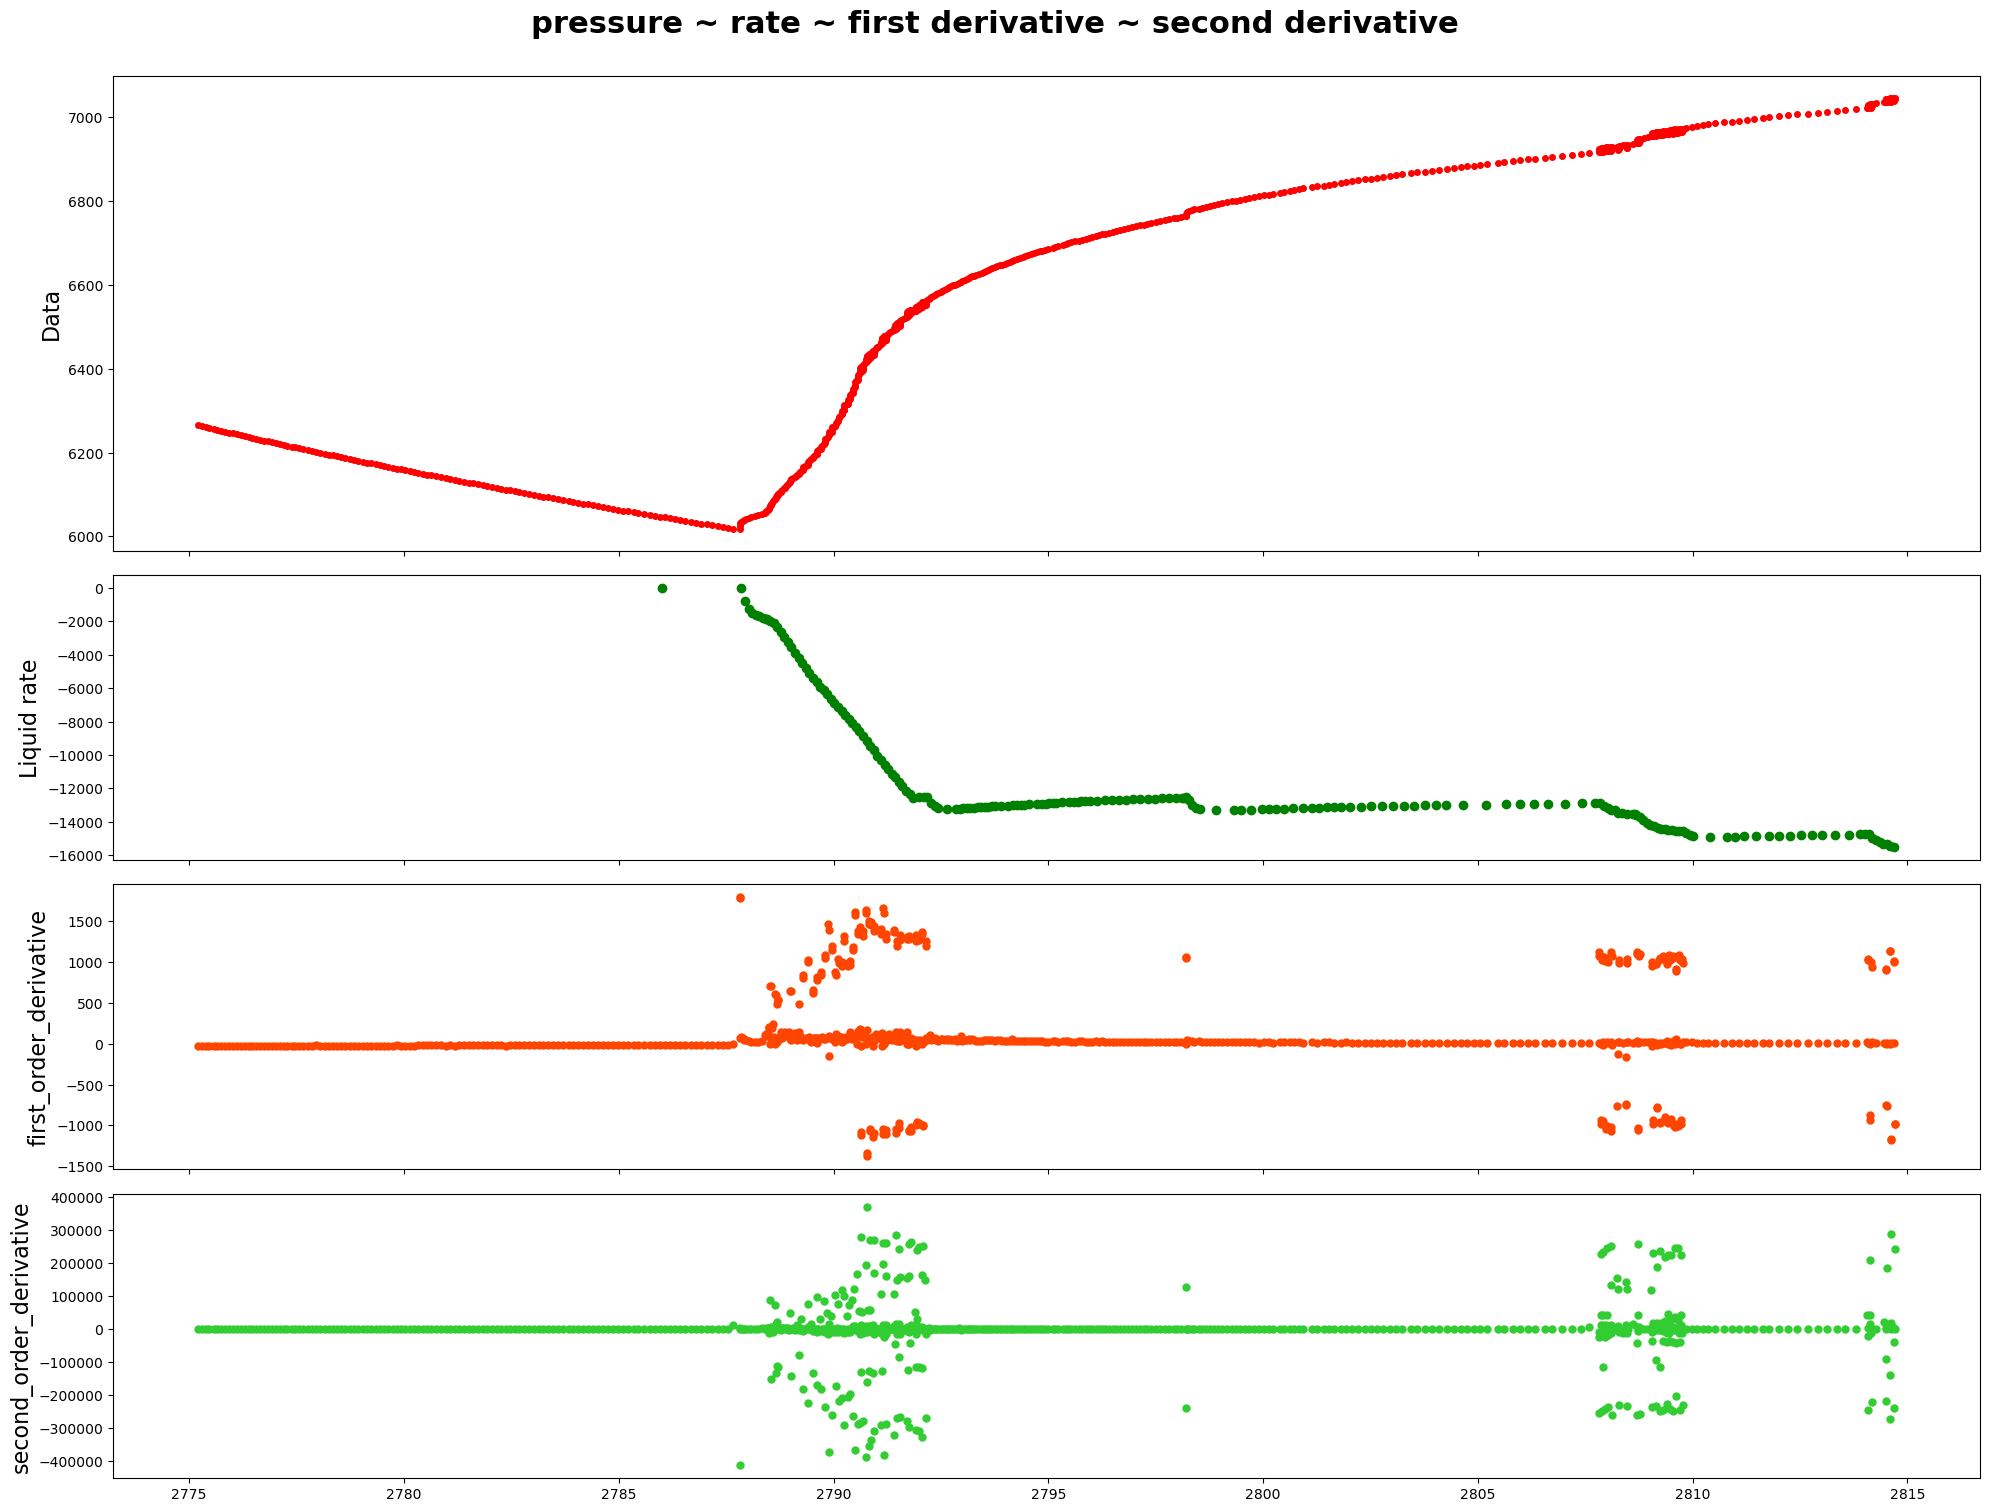

------row 35-----detected points:[24215, 24263, 24264]


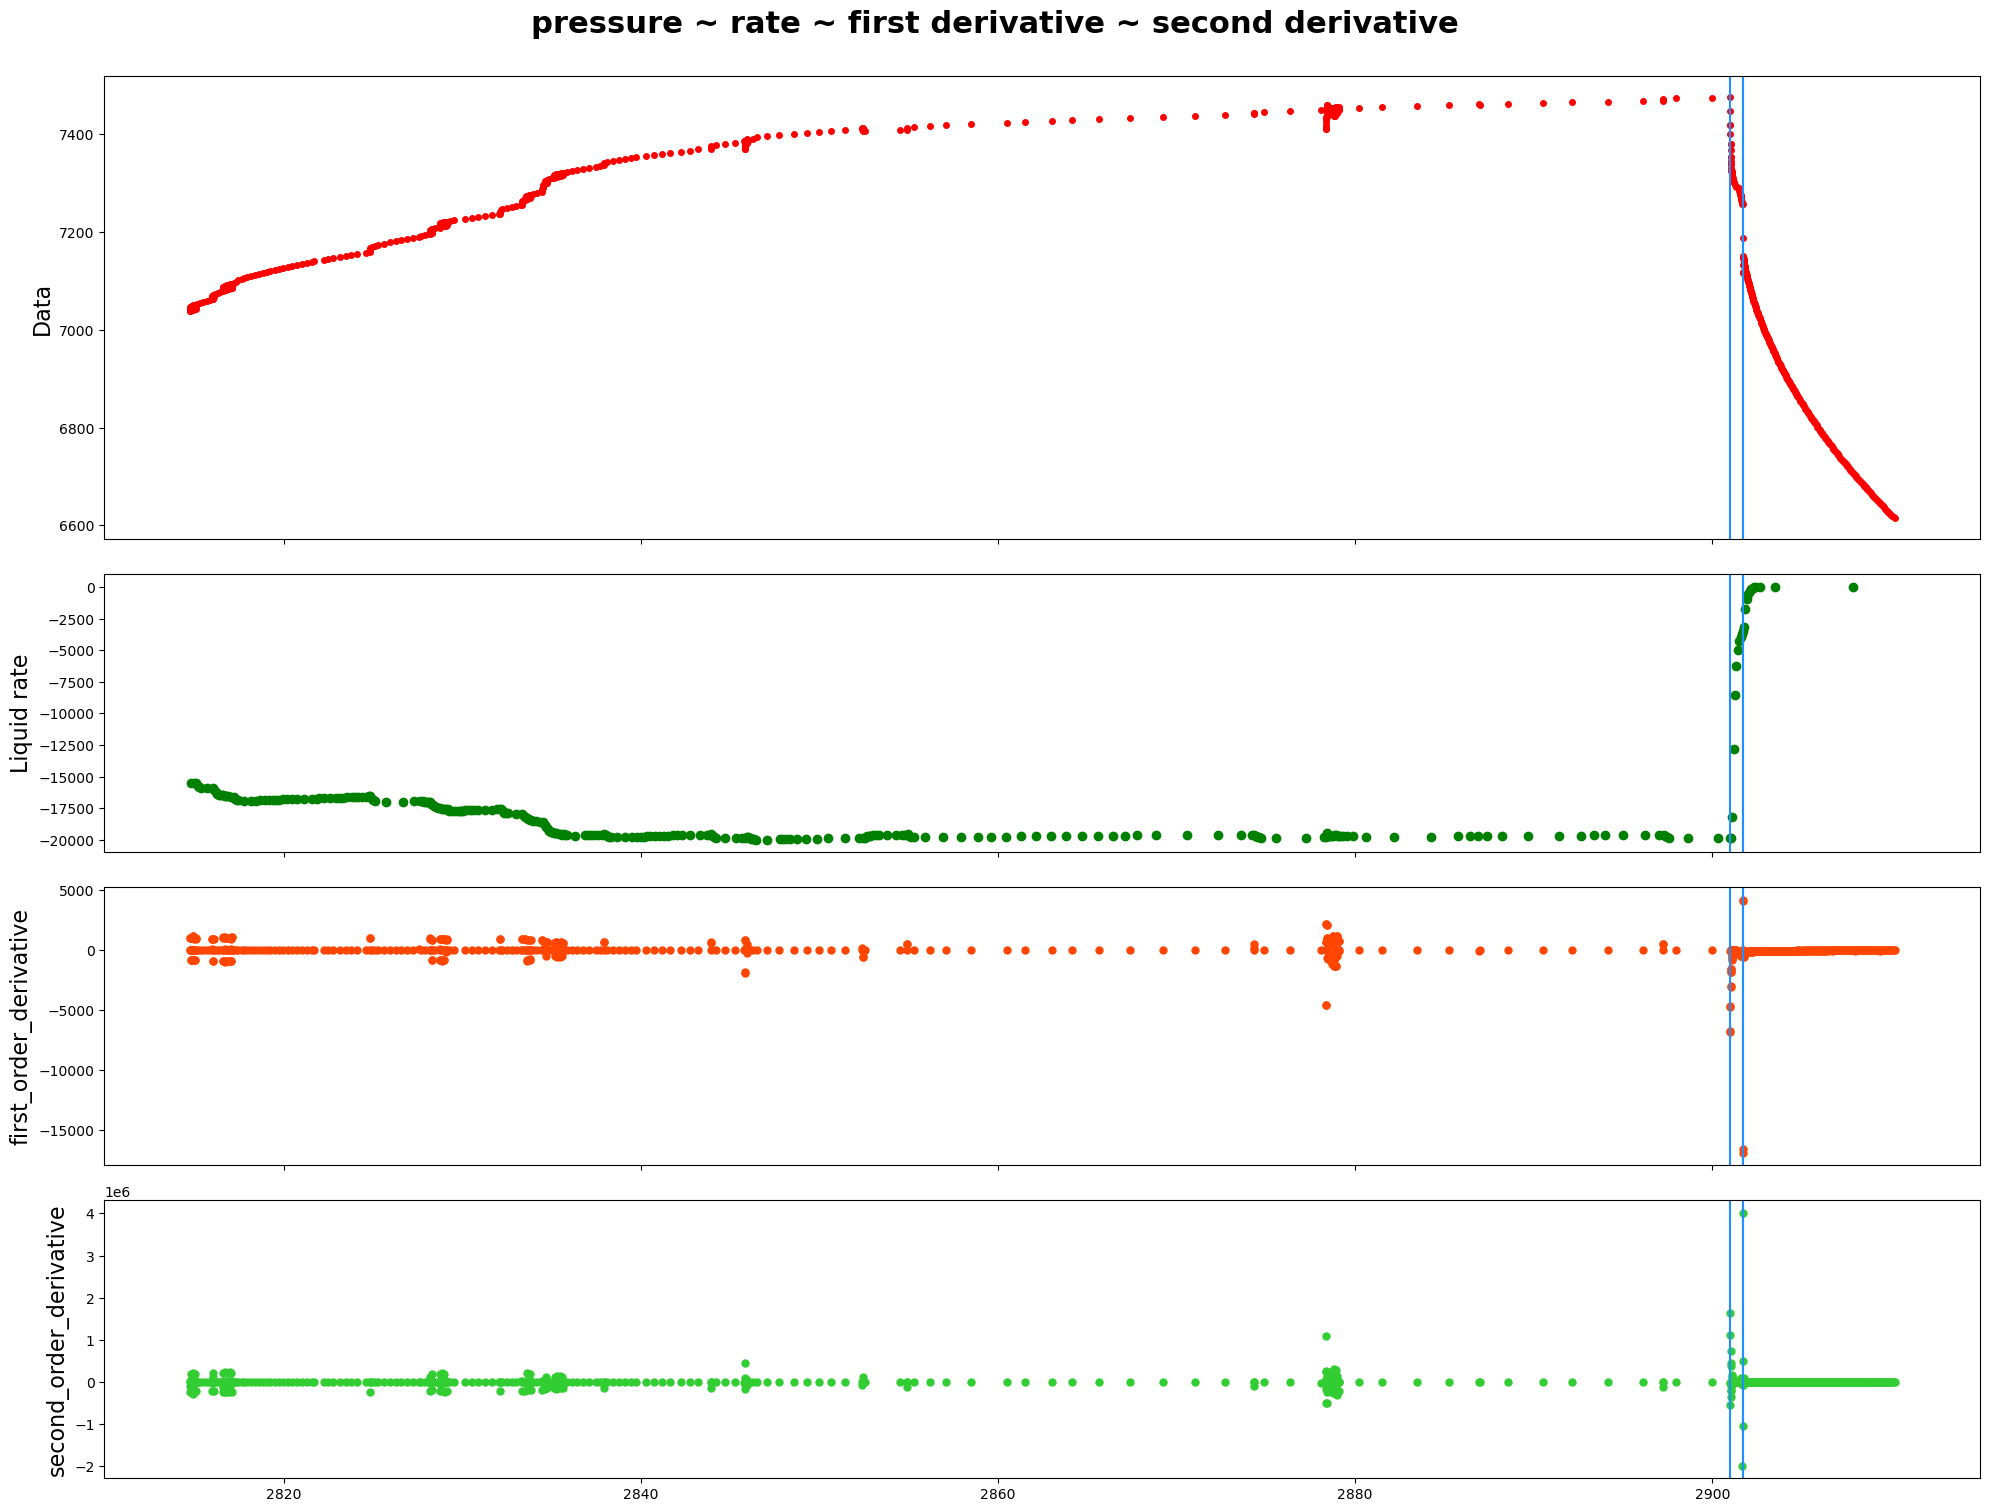

------row 36-----detected points:[24796]


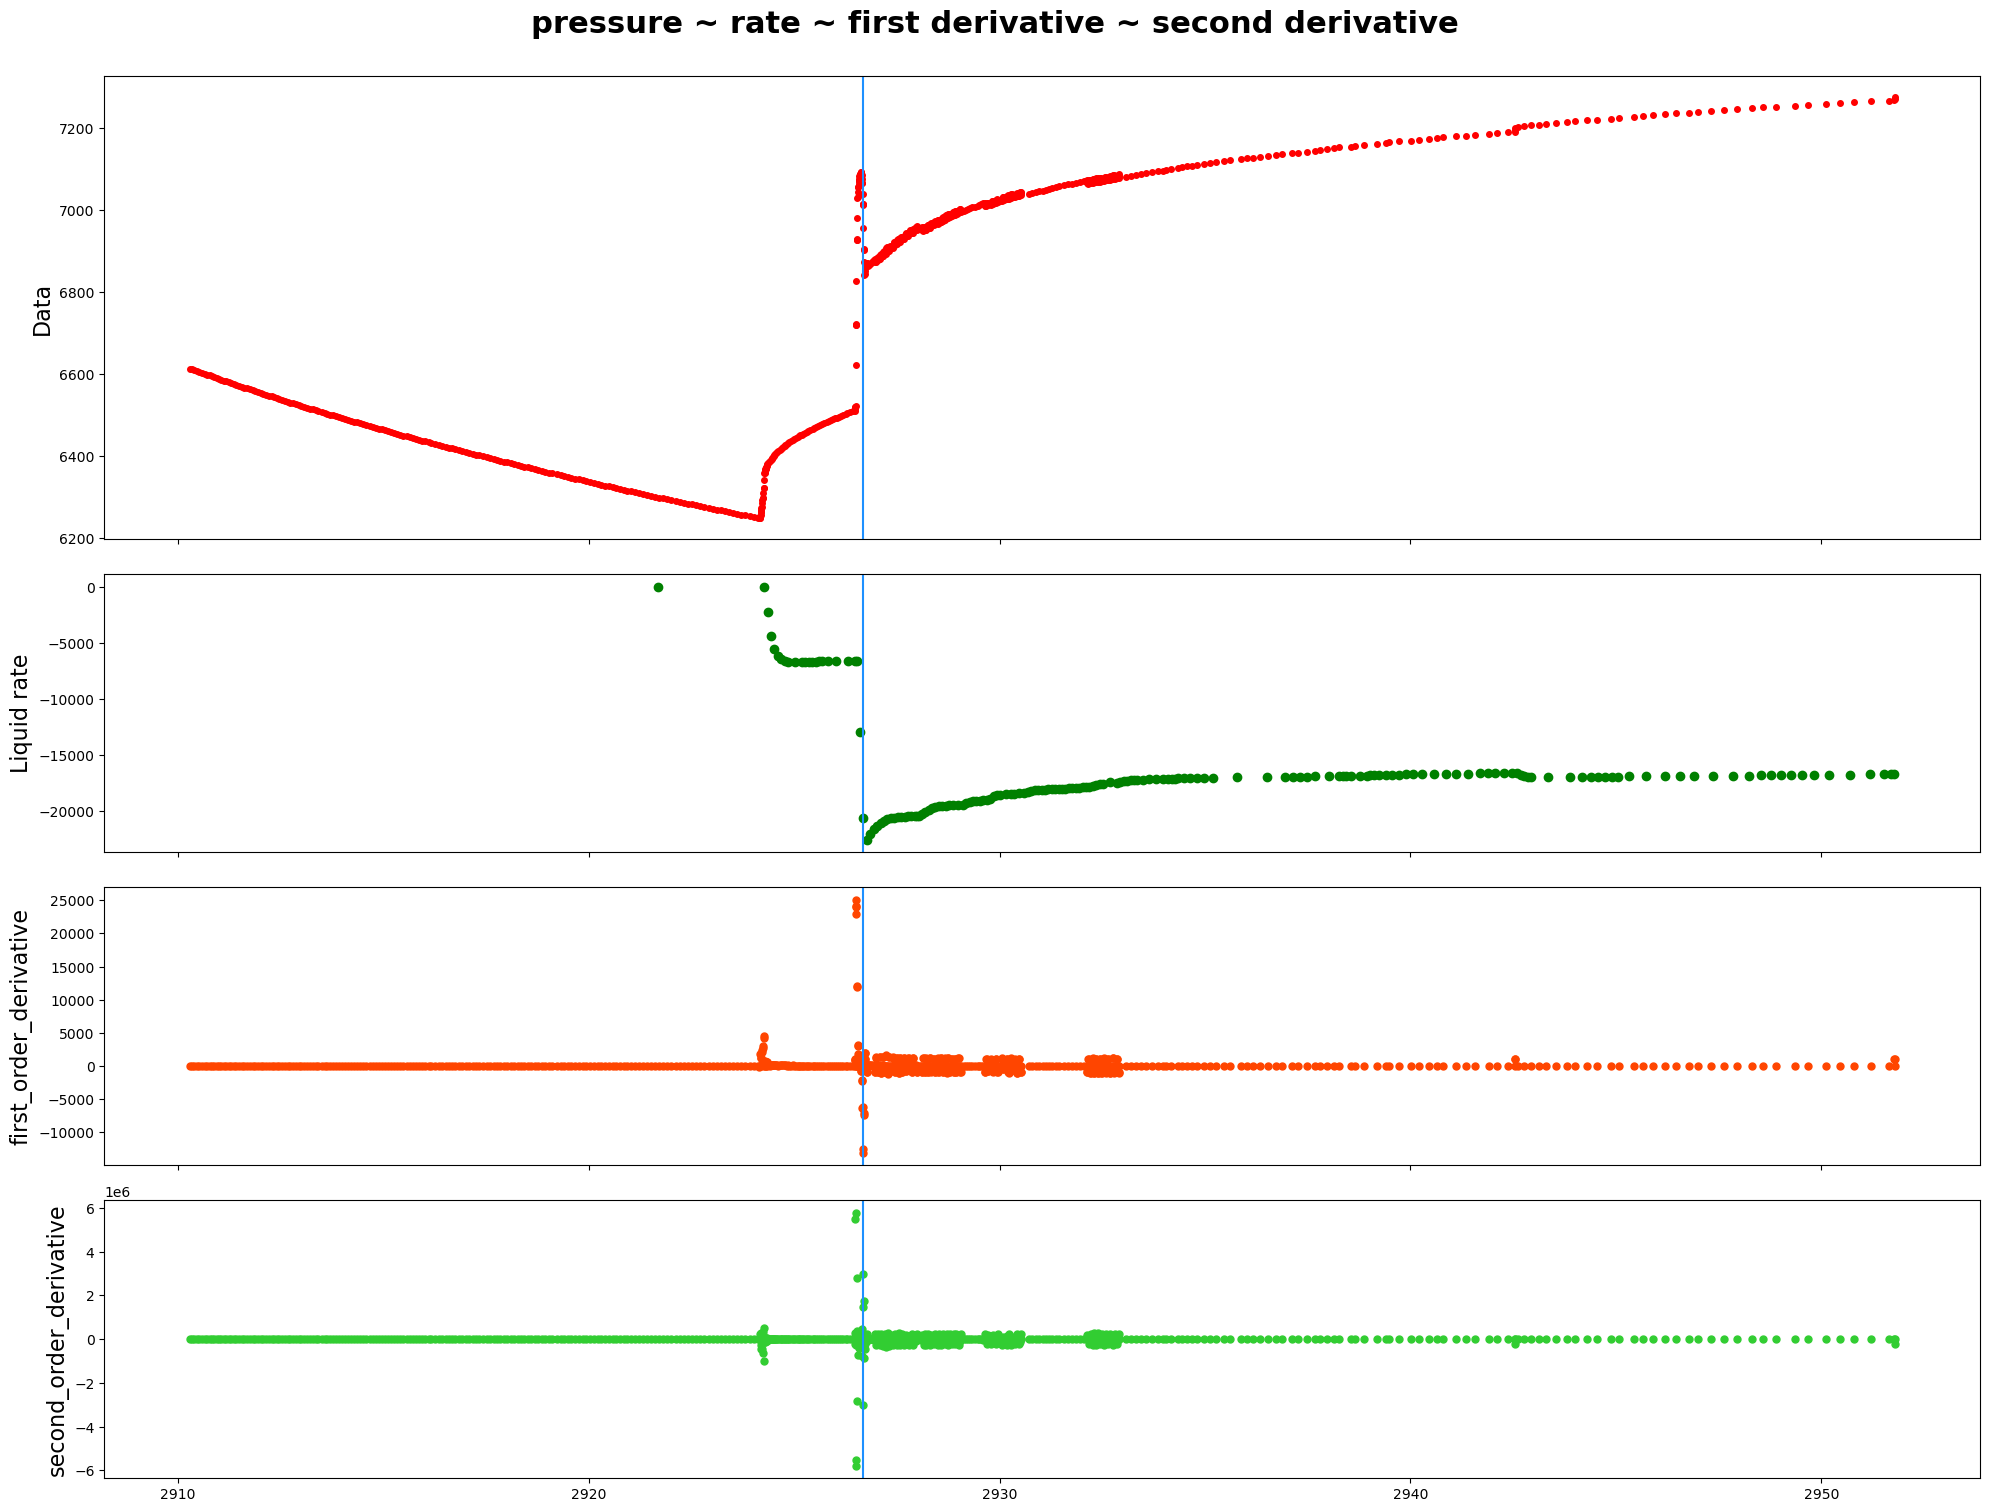

------row 37-----detected points:[]


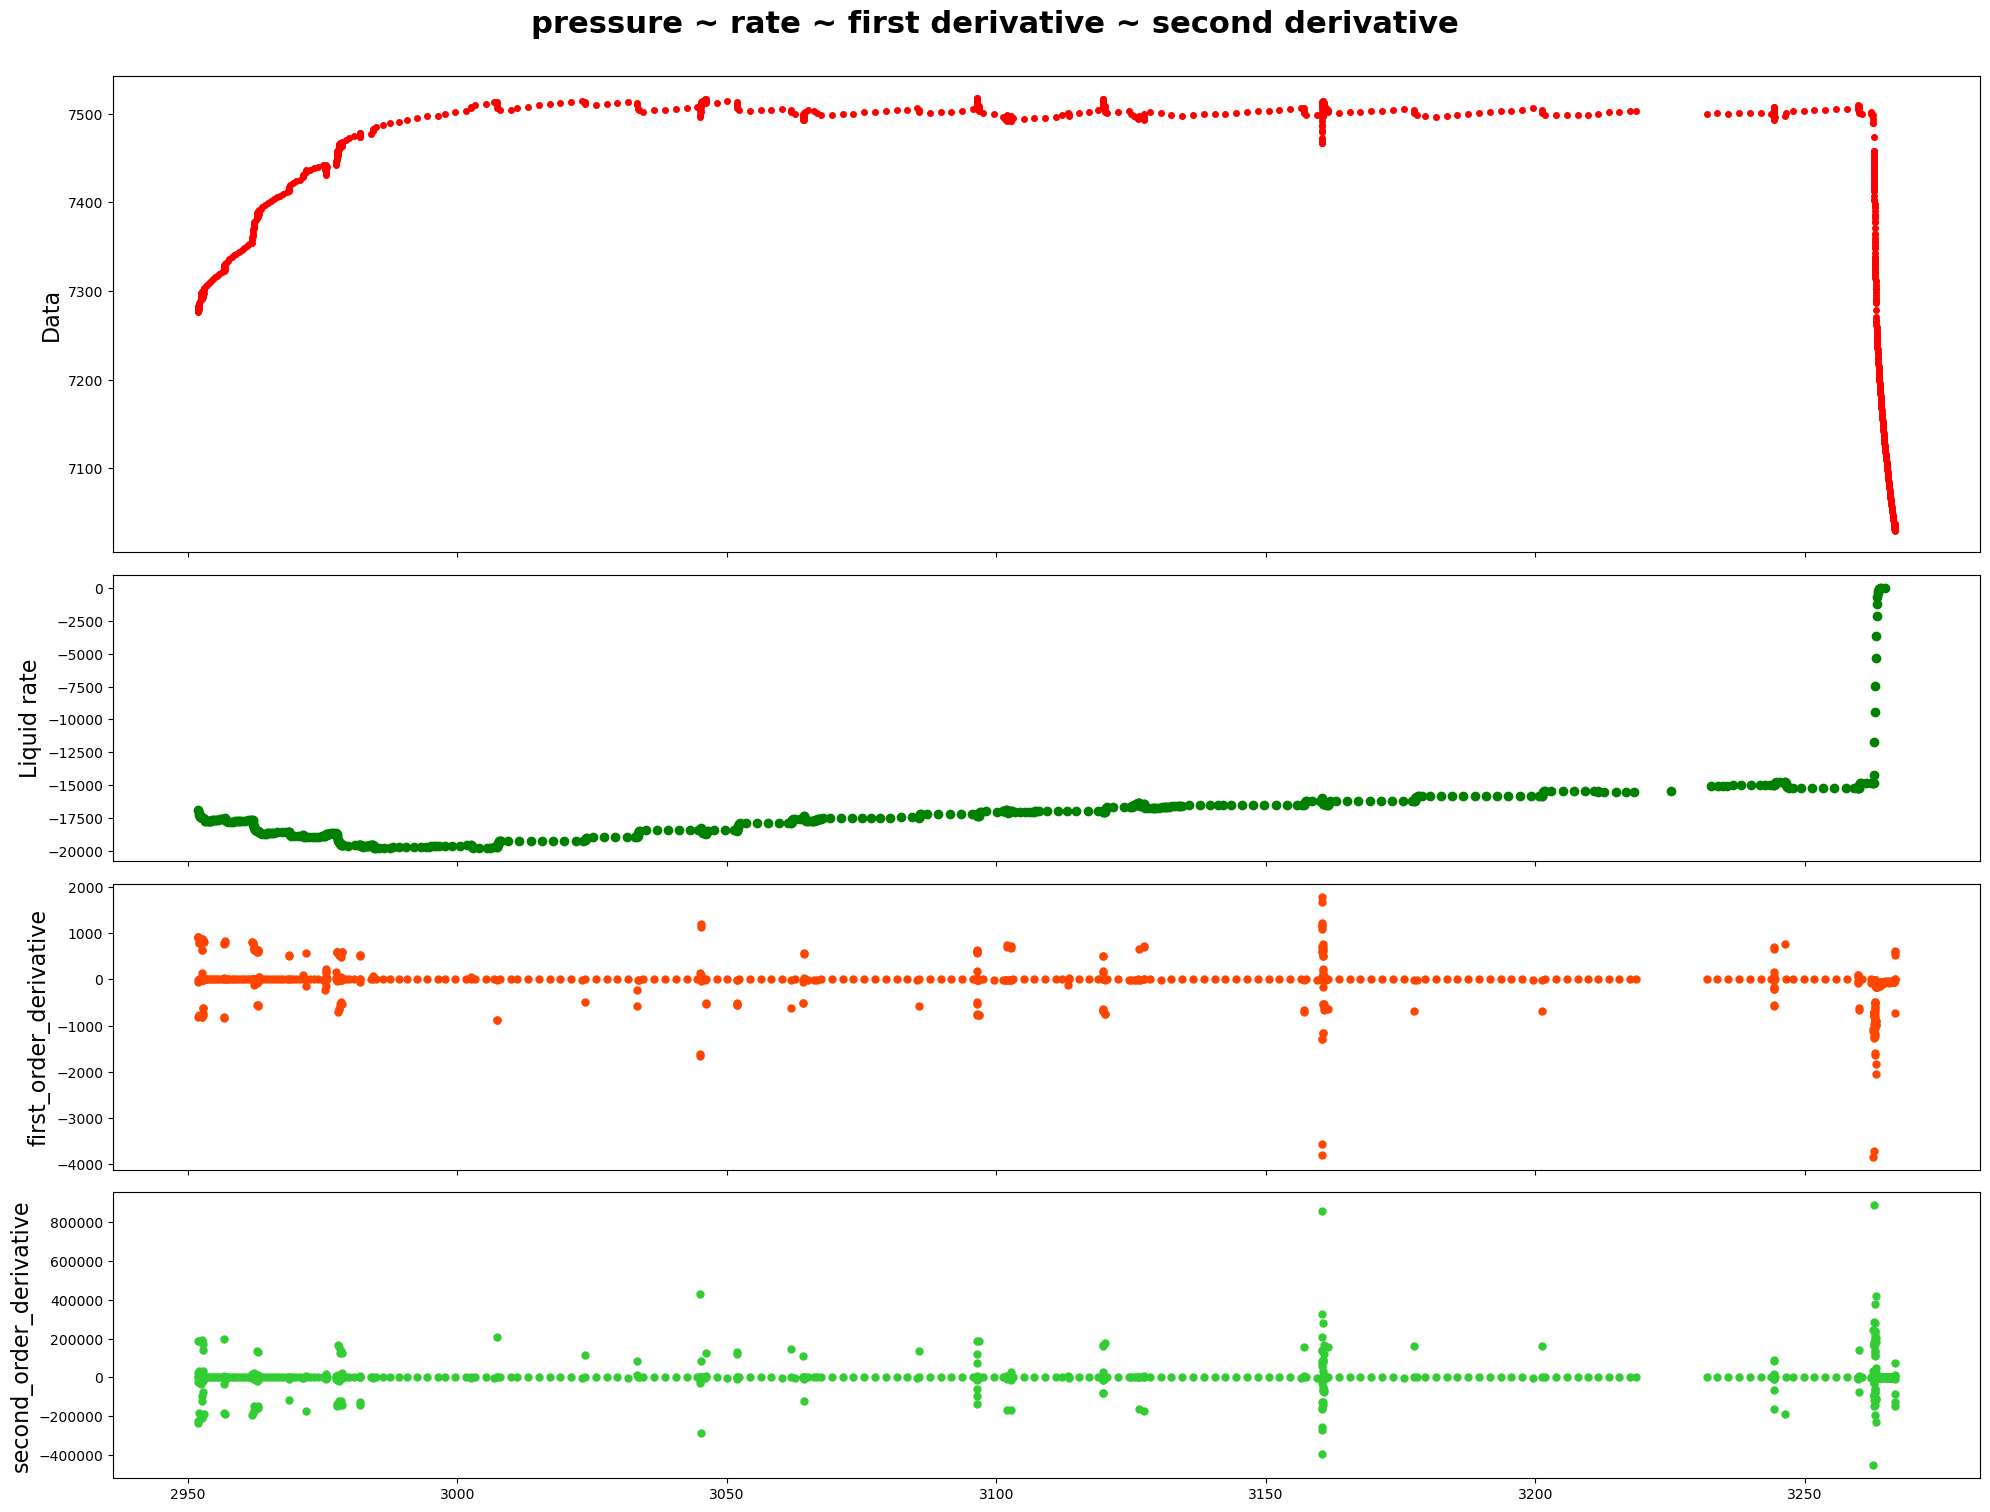

------row 38-----detected points:[26019]


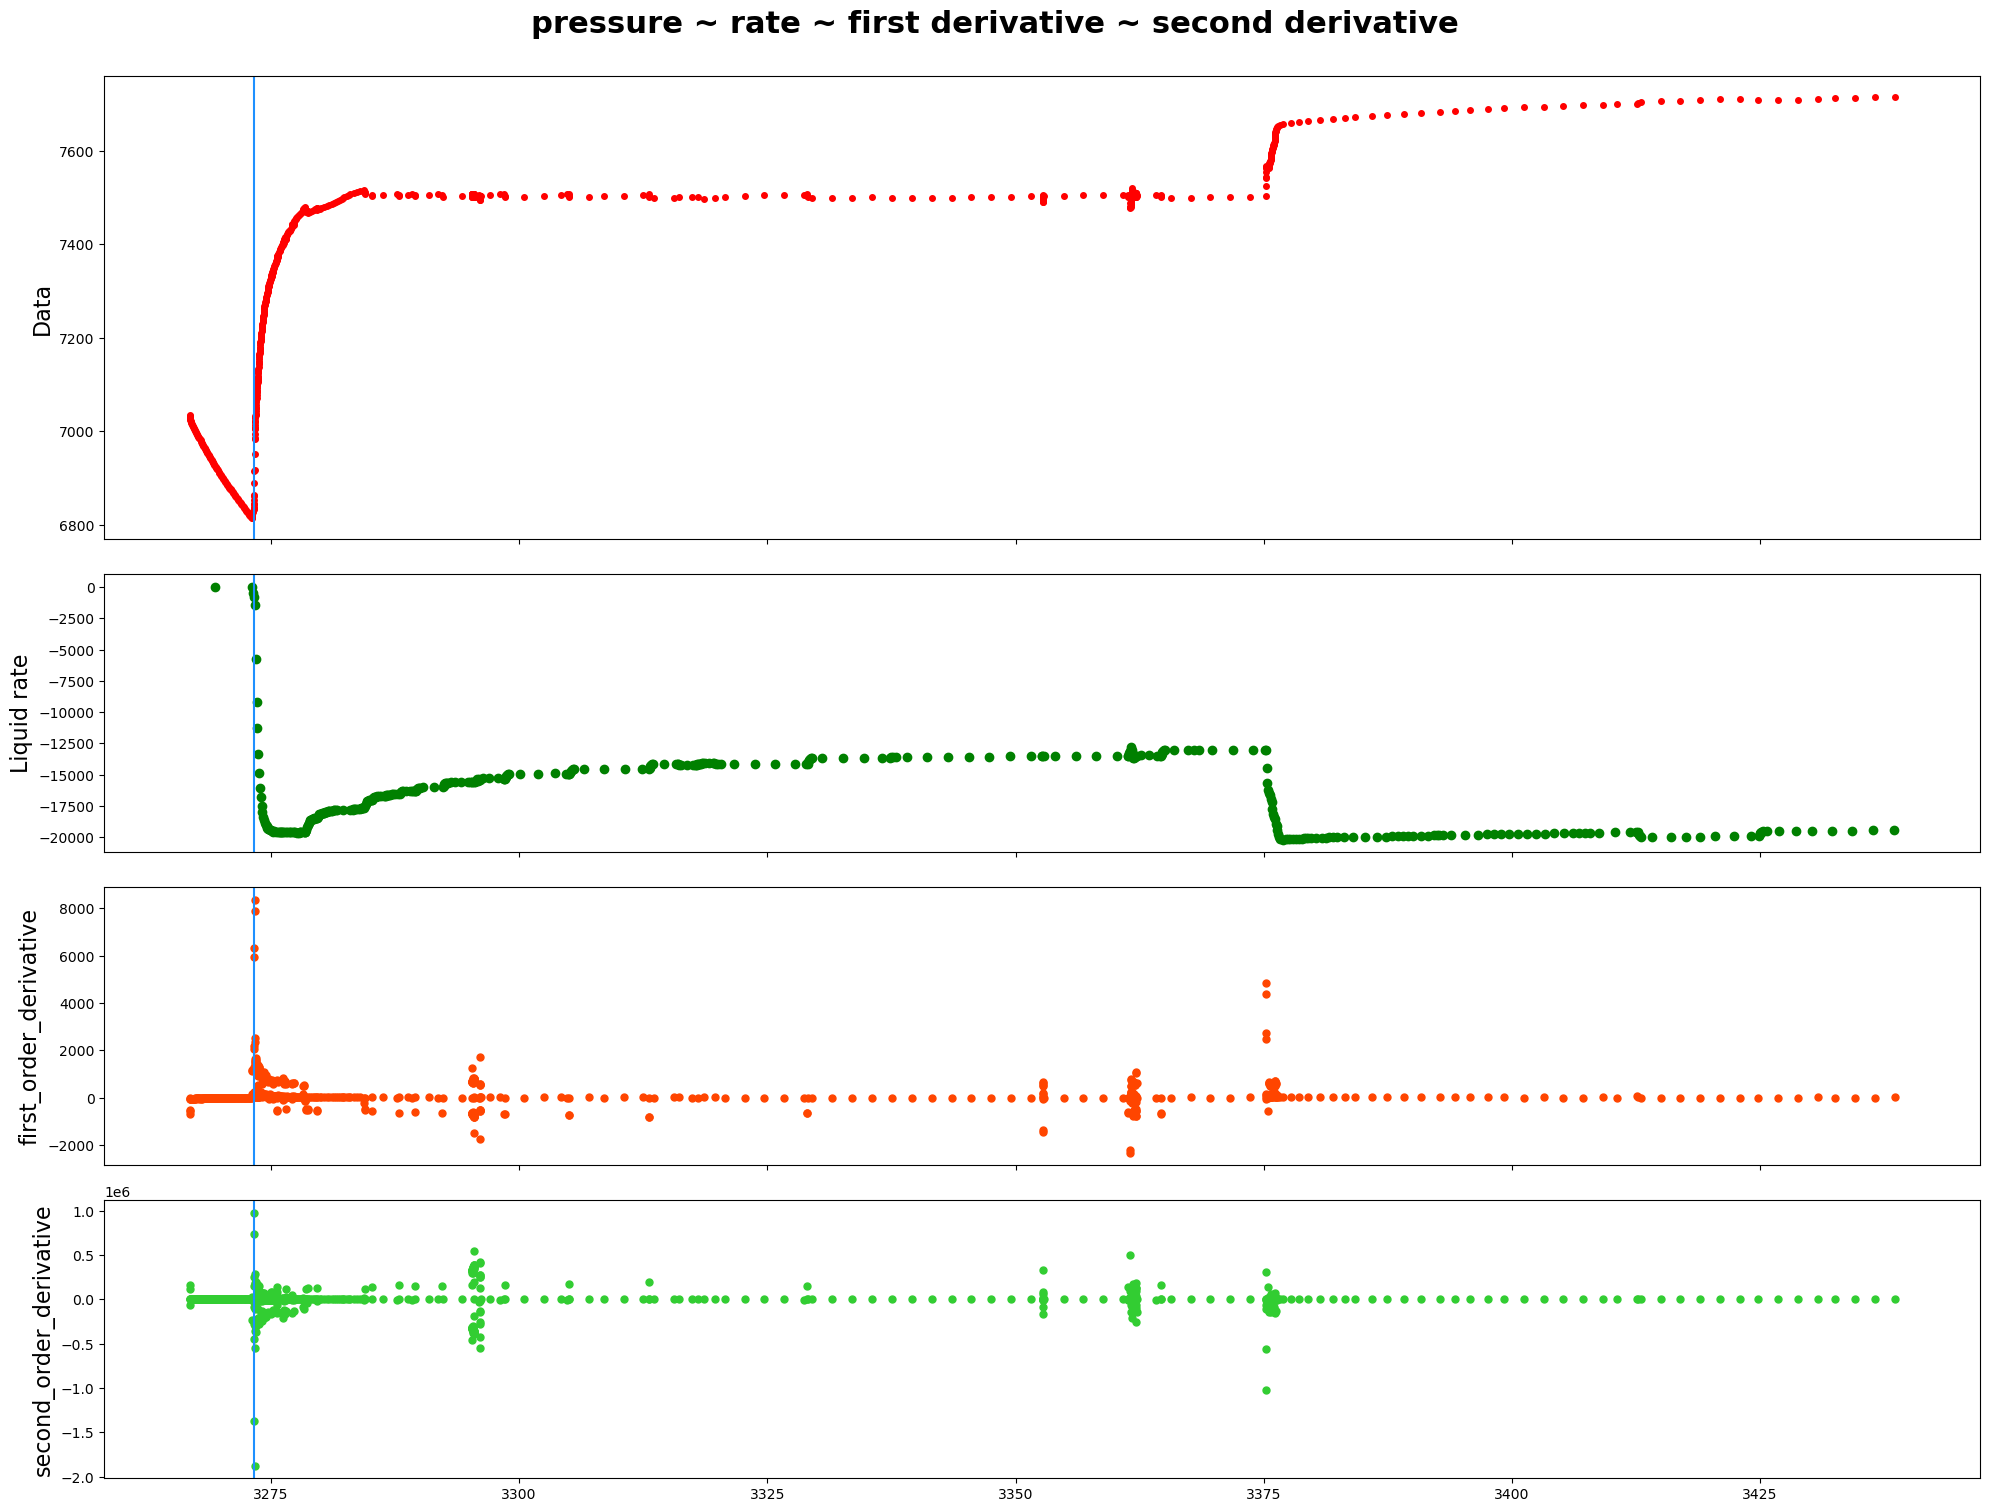

------row 39-----detected points:[26656, 26783, 27023]


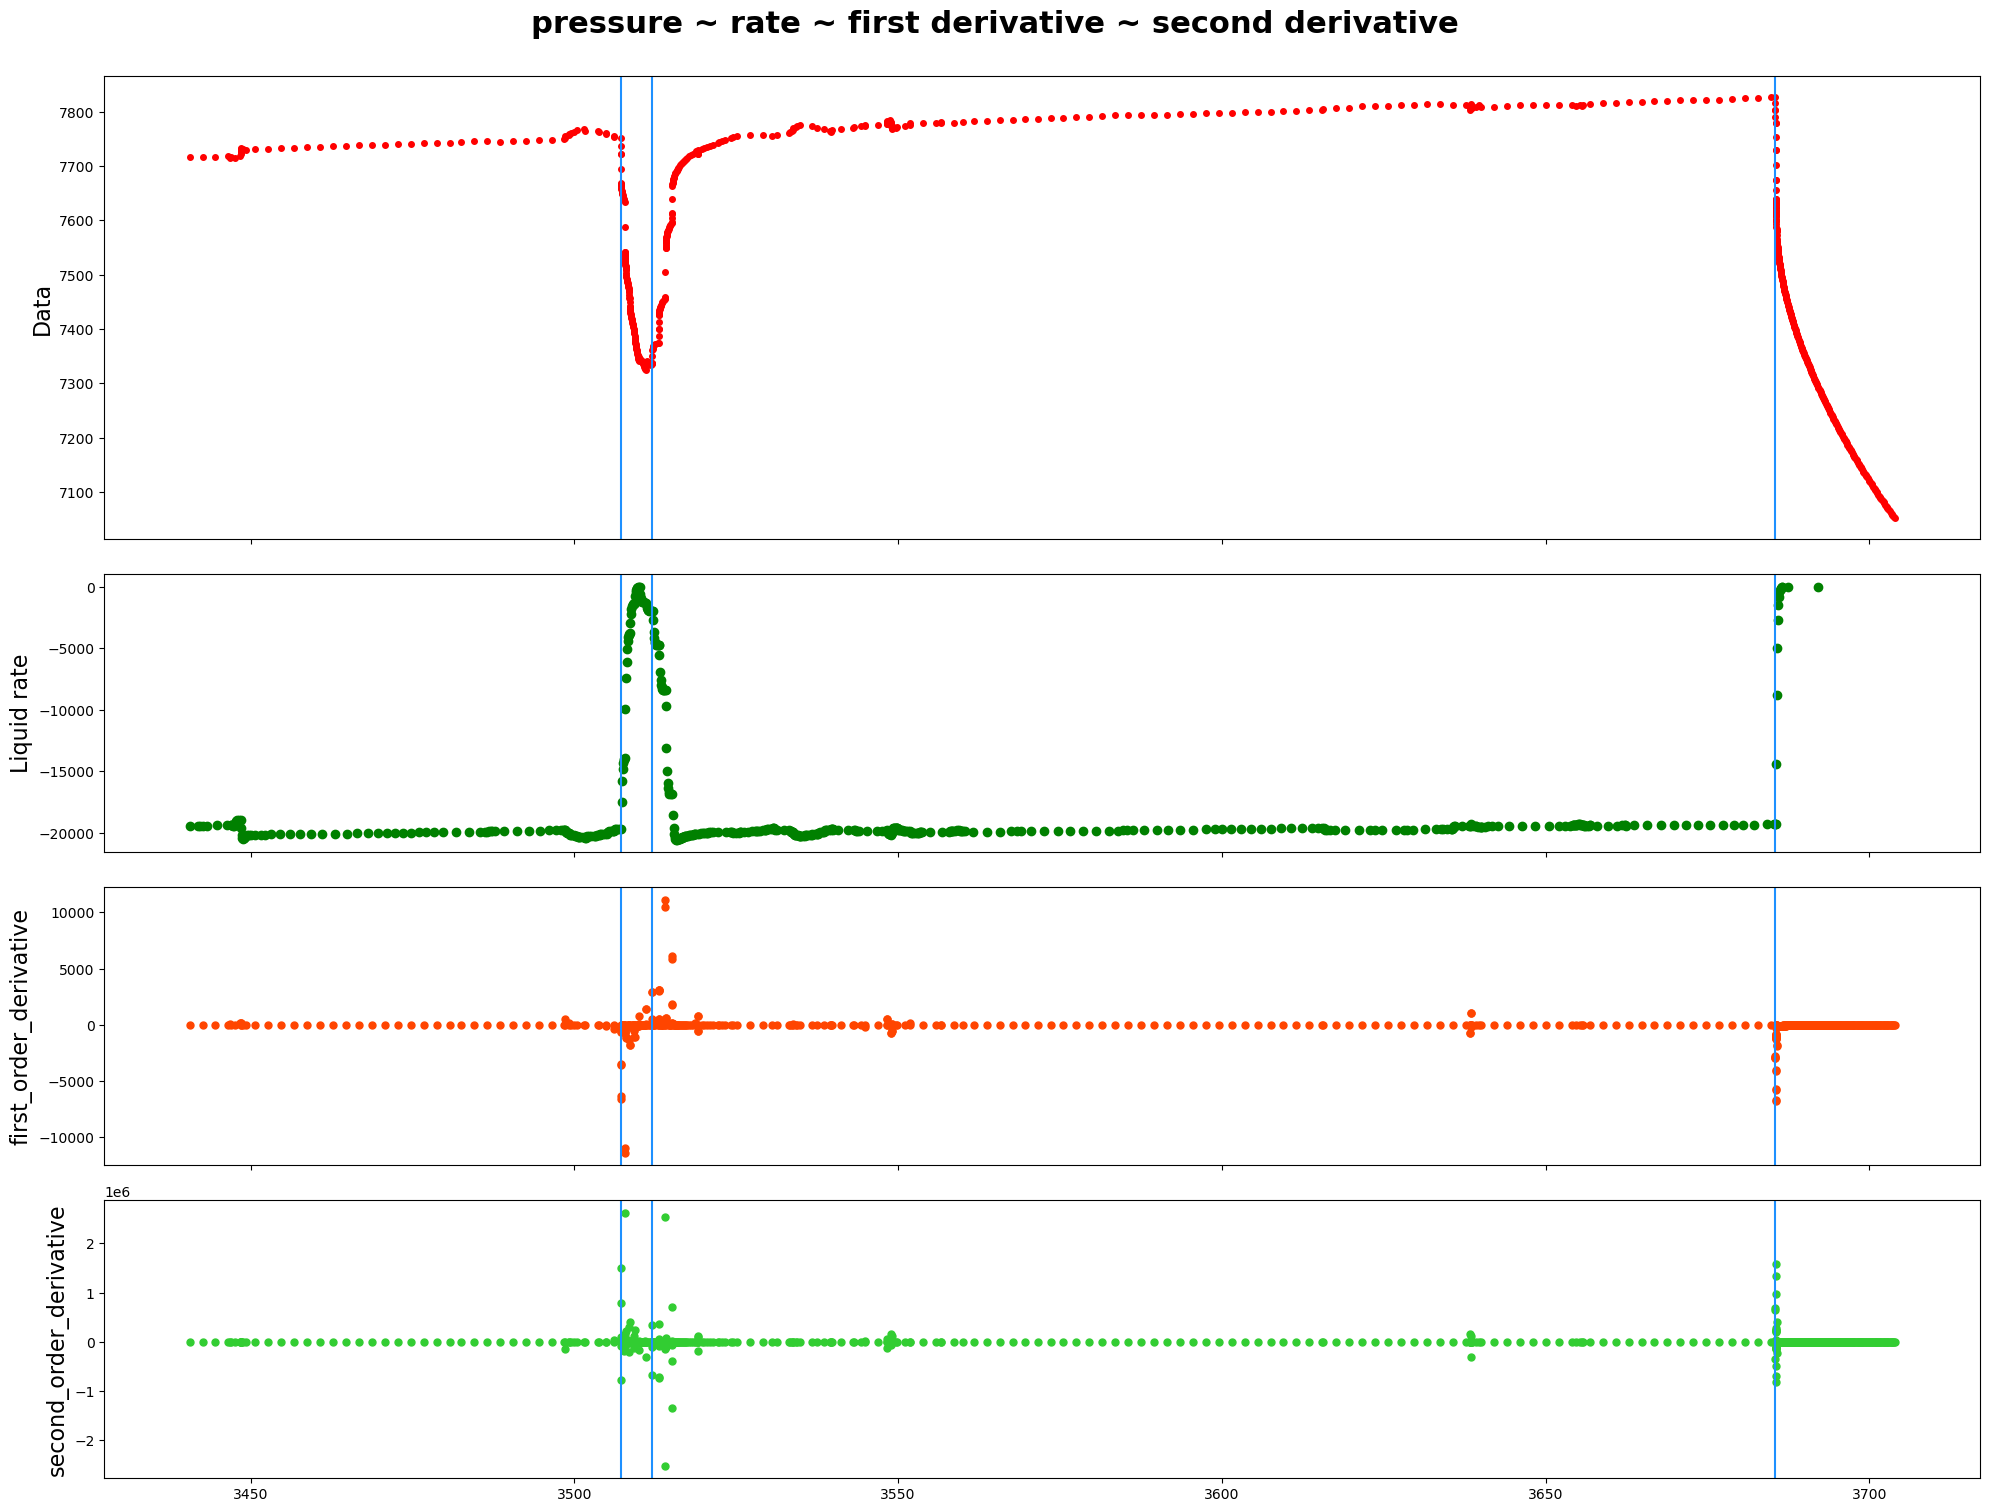

------row 40-----detected points:[27316, 27319, 27962, 27963, 27966]


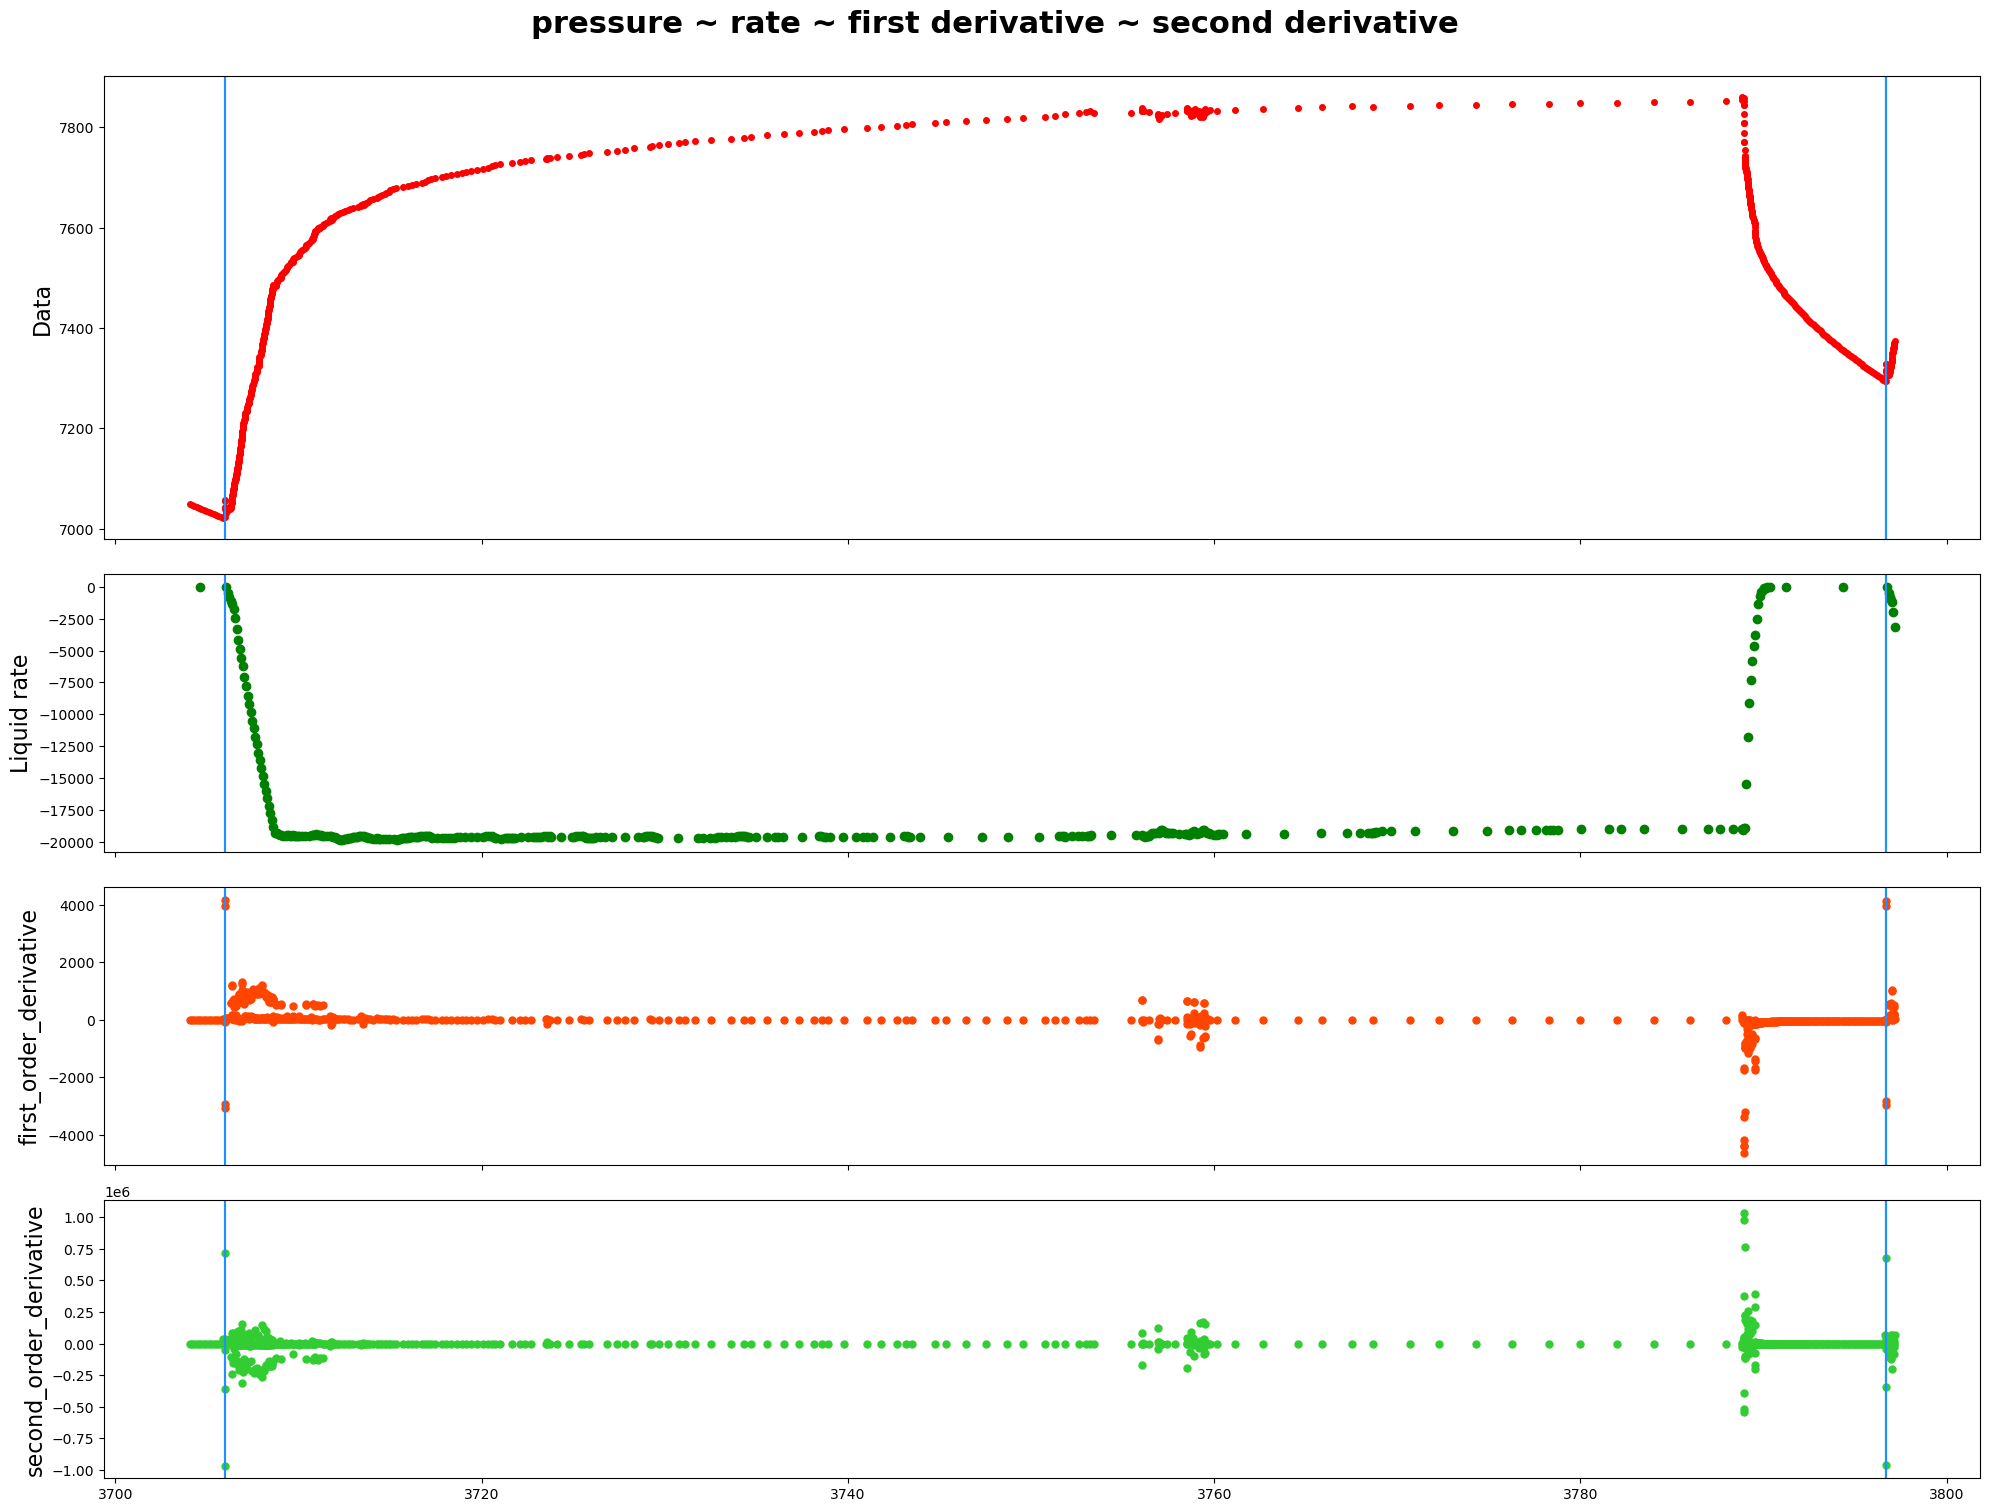

------row 41-----detected points:[28243, 28263, 28290]


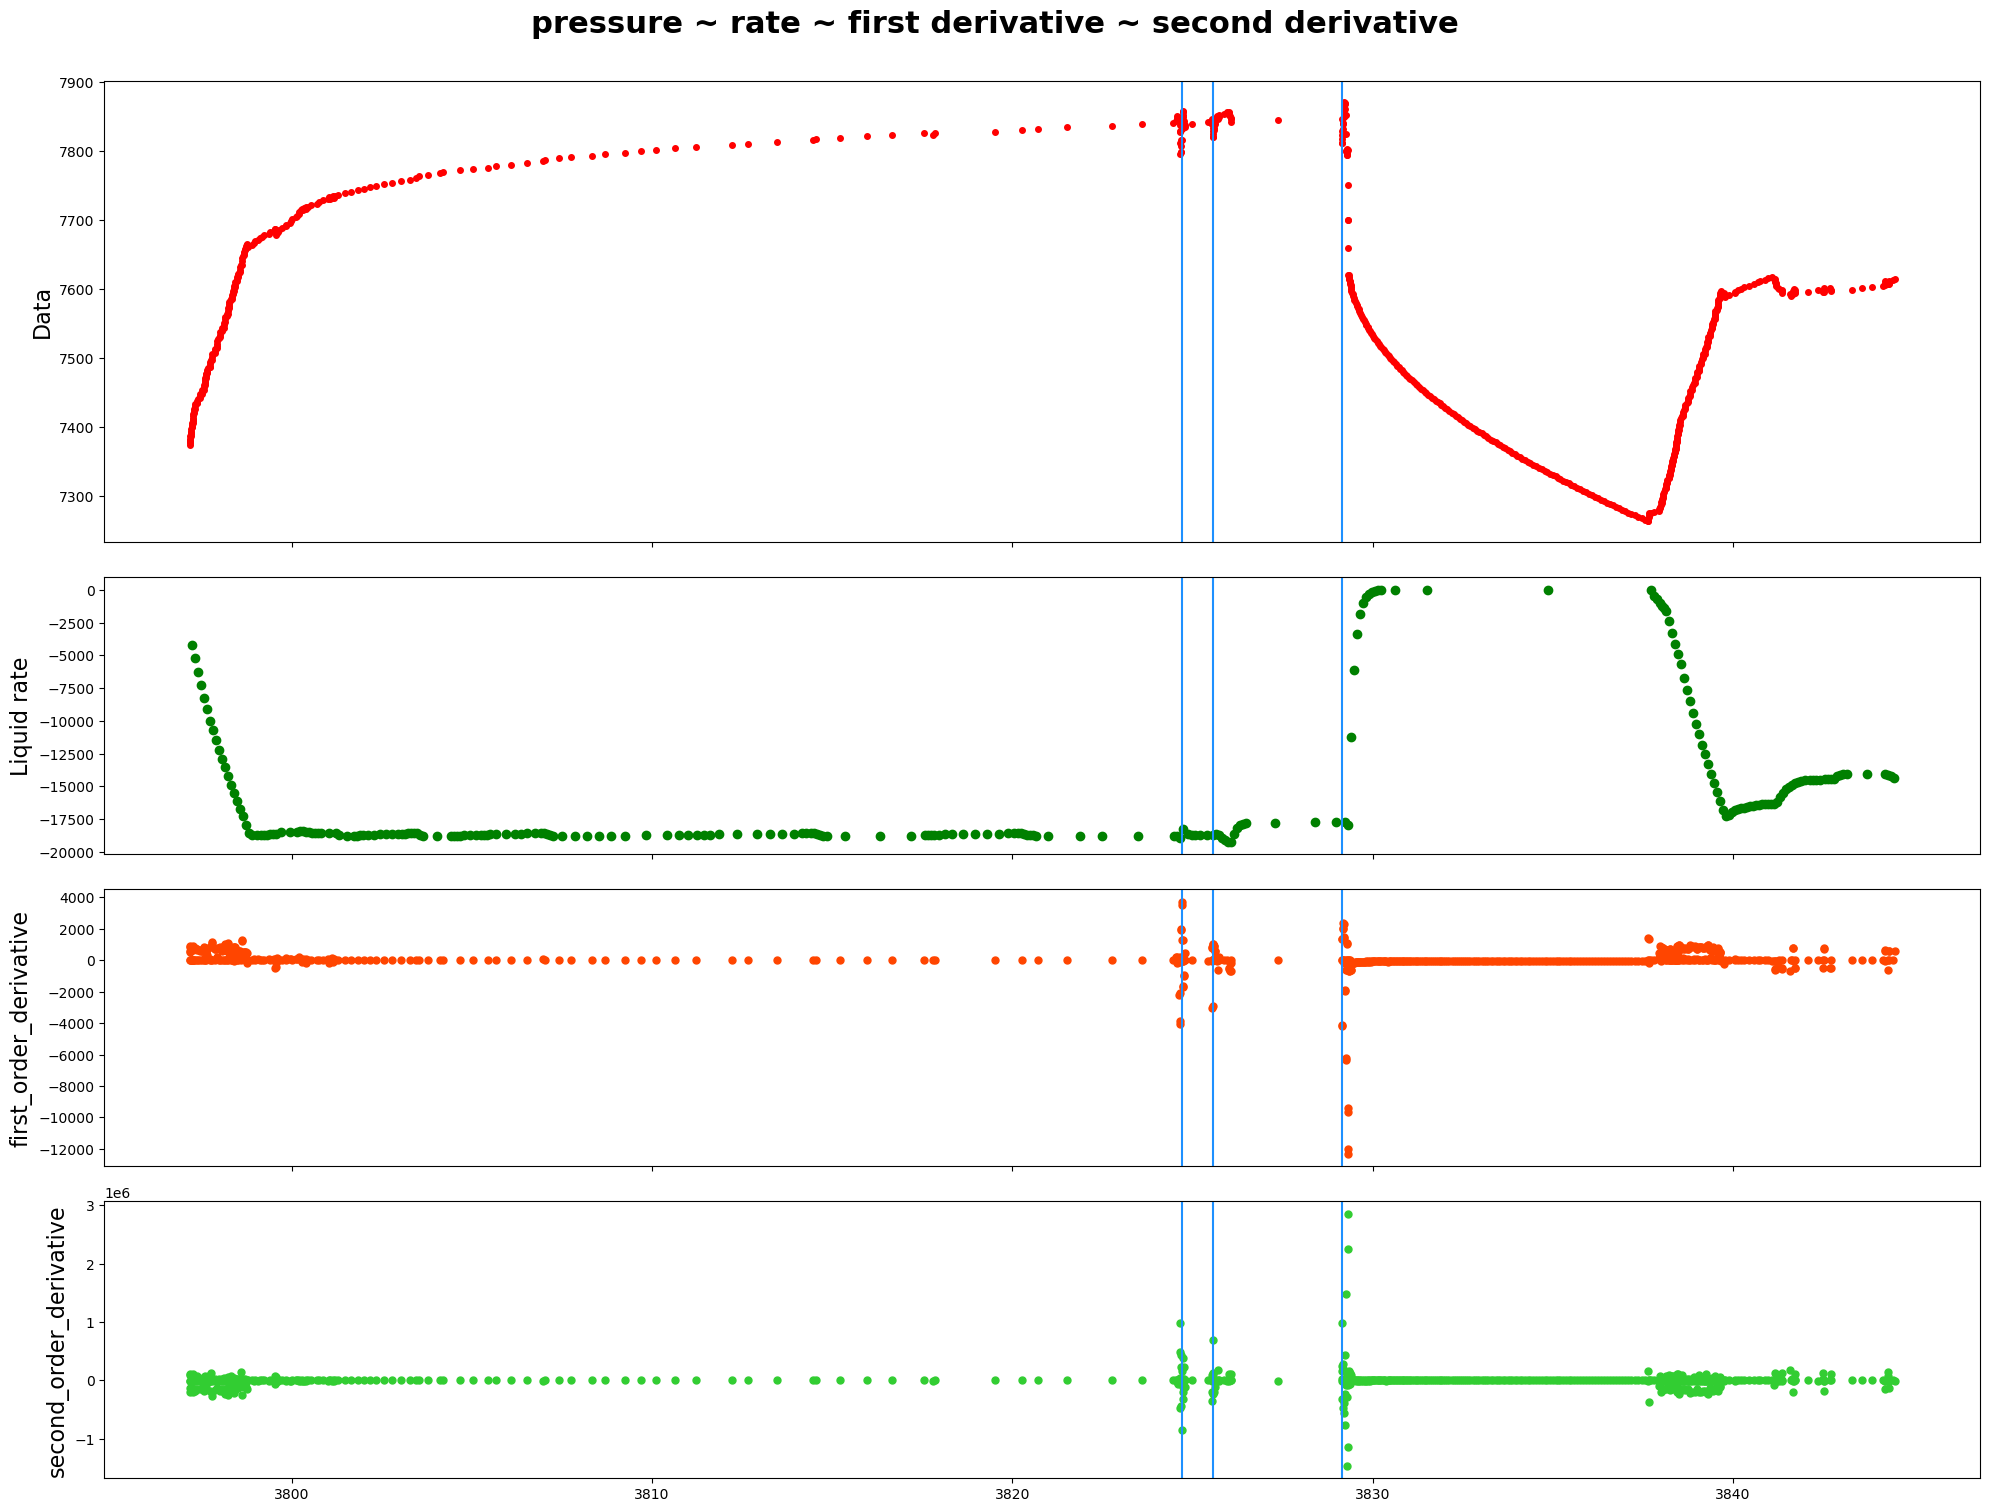

------row 42-----detected points:[29122]


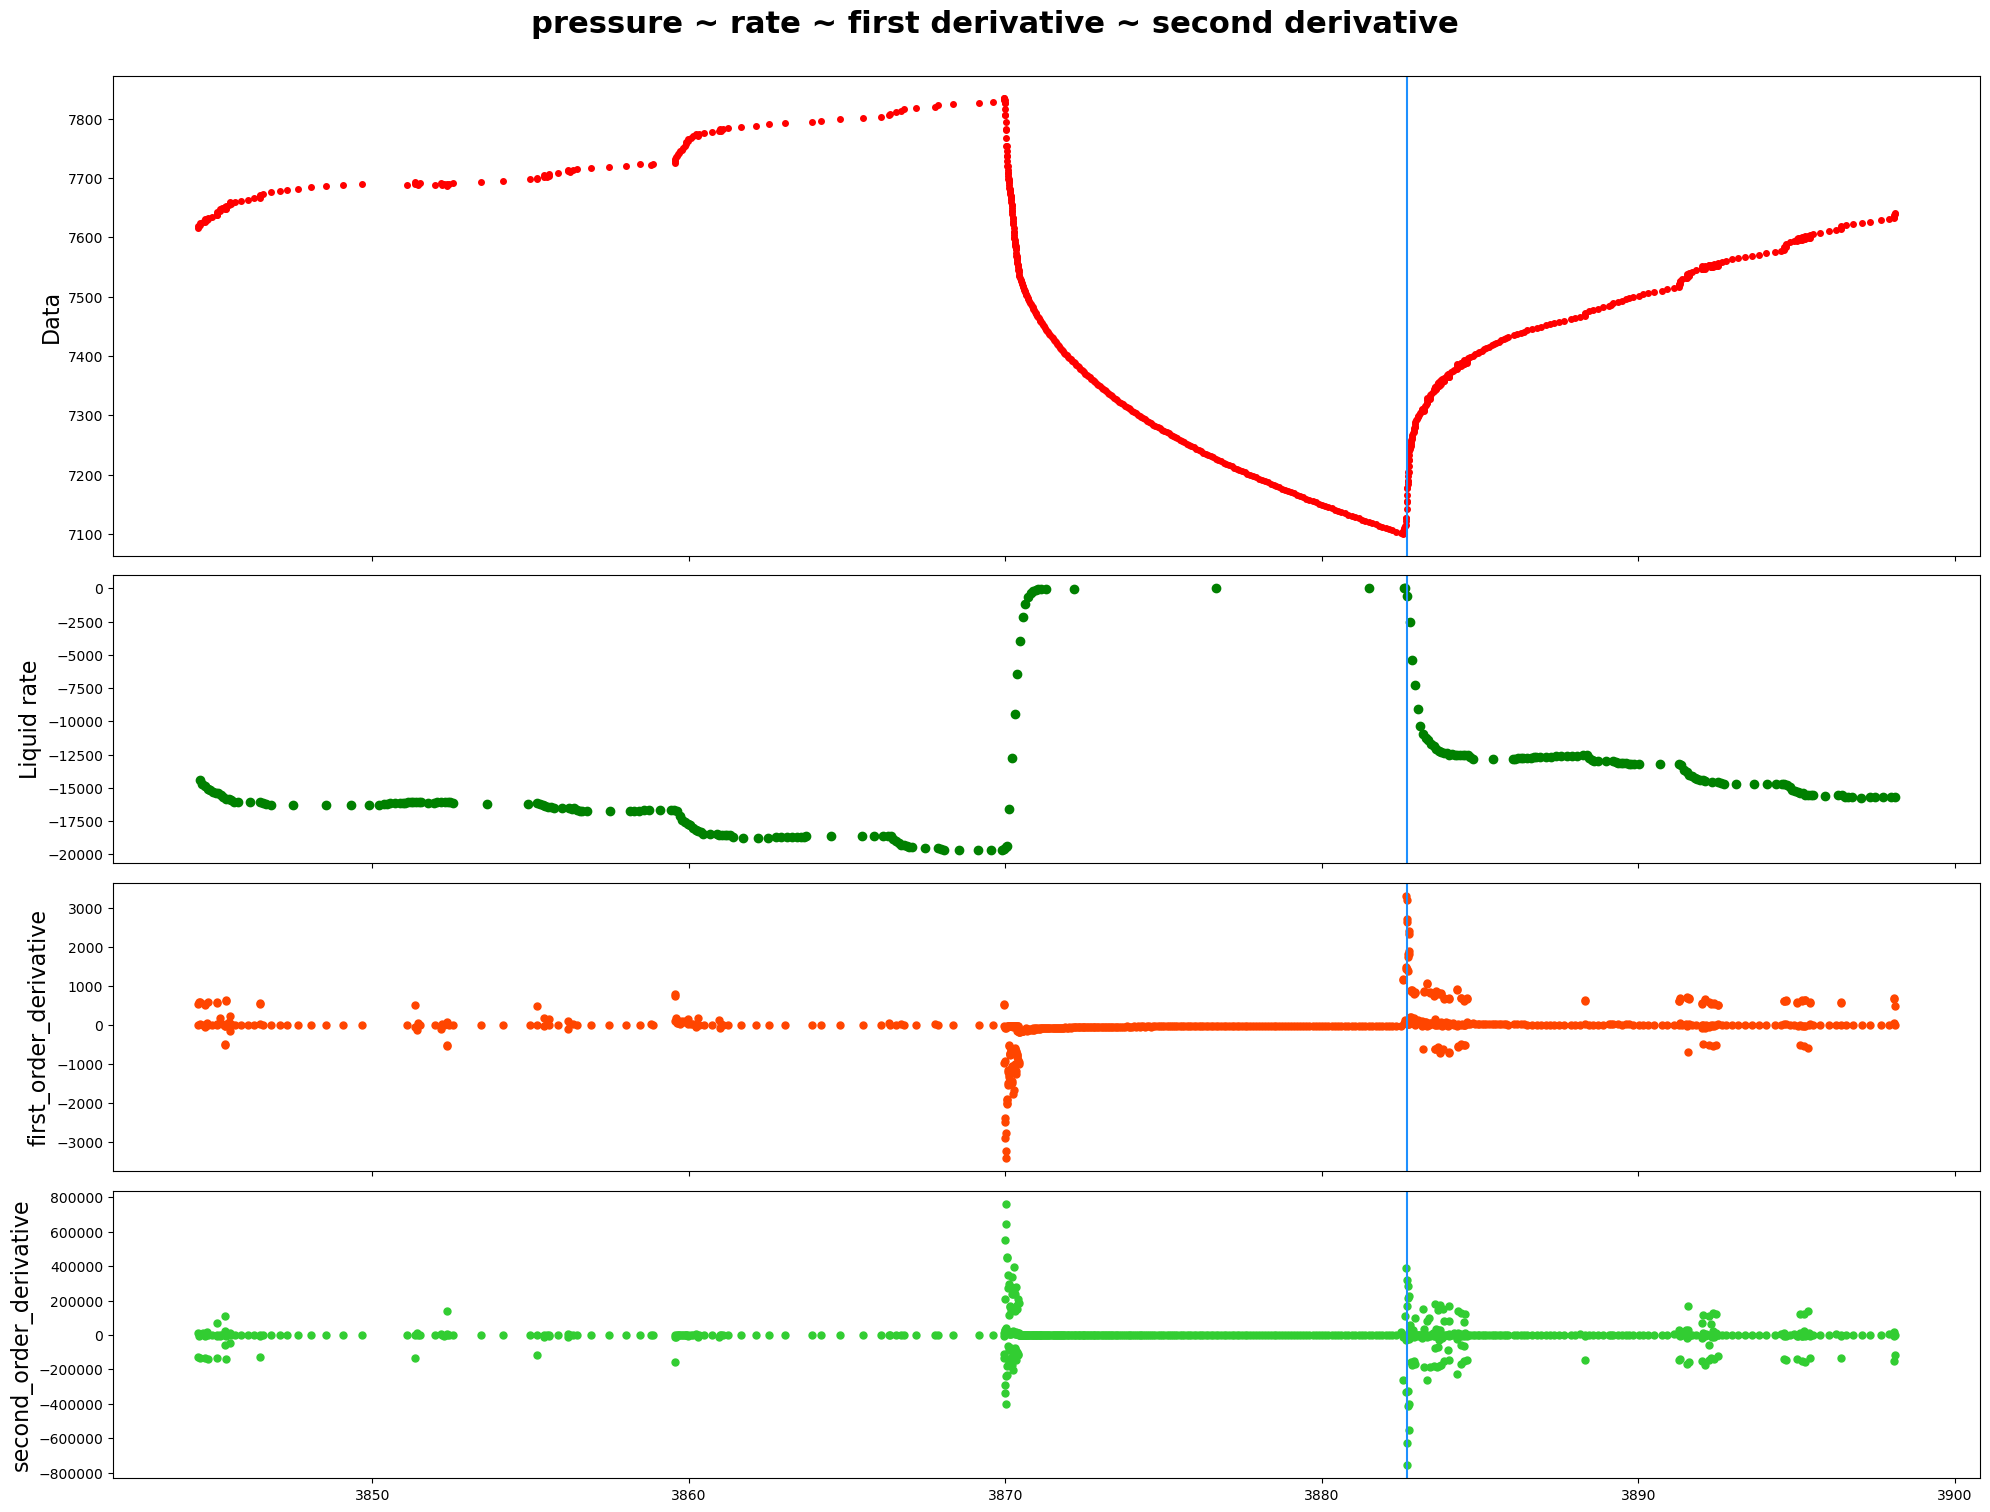

------row 43-----detected points:[29484, 29547, 29553]


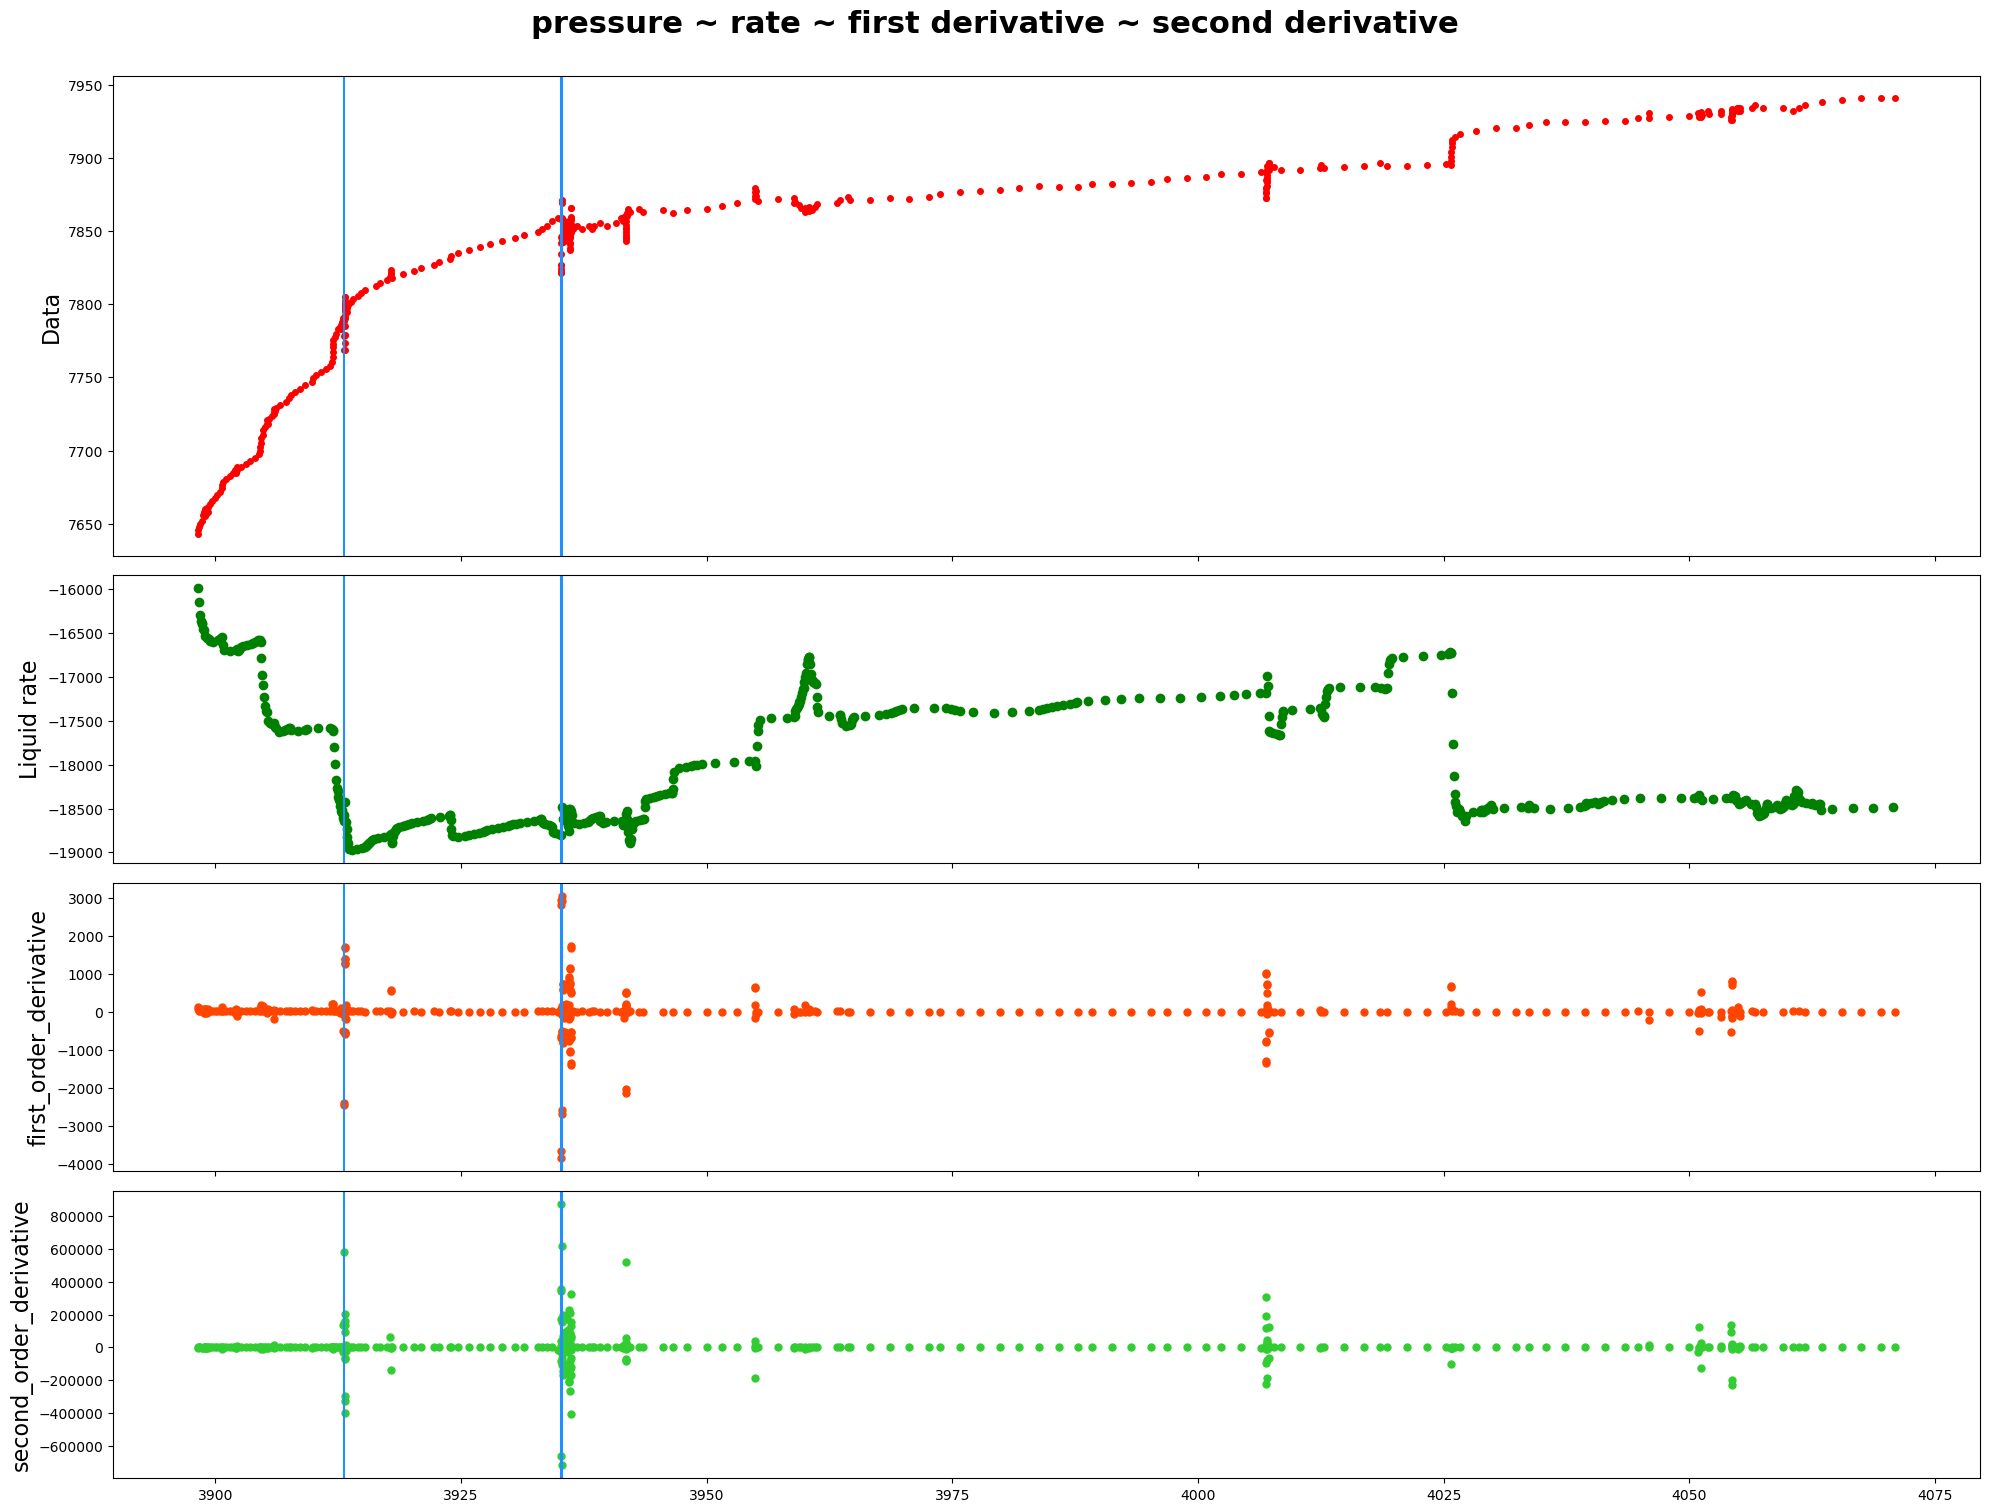

In [19]:
data_inOneRow=700
plot_4_metrics_details(data_inOneRow,
                       pressure_df,
                       rate_df,
                       breakpoints_detected,
                       ground_truth,
                       colum_names)